# Windy Gridworld

## ÁéØÂ¢ÉËÆæÁΩÆ
- ÁΩëÊ†ºÔºö7Ë°å √ó 10Âàó
- ÂùêÊ†áÁ≥ªÁªüÔºöÂ∑¶‰∏äËßí‰∏∫ÂéüÁÇπ(0,0)ÔºåË°åÂè∑0-6ÔºåÂàóÂè∑0-9
- Âä®‰ΩúÔºö8ÂêëÁßªÂä®ÔºàKing's movesÔºâ
- ÁõÆÊ†áÁä∂ÊÄÅÔºö(3,7) - episodeÁªìÊùü
- Ê≠ª‰∫°Áä∂ÊÄÅÔºö(0,9) - Â•ñÂä±-100ÔºåepisodeÁªìÊùü
- ÊØèÊ≠•Â•ñÂä±Ôºö-1
- È£éÂêëÔºöÁâπÂÆöÂàóÊúâÂêë‰∏äÁöÑÈ£é

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, FancyArrow
import time

# ÈÖçÁΩÆ‰∏≠ÊñáÂ≠ó‰ΩìÊîØÊåÅ
plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'SimHei', 'Microsoft YaHei', 'Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False  # Ëß£ÂÜ≥Ë¥üÂè∑ÊòæÁ§∫ÈóÆÈ¢ò

## ÁÆóÊ≥ïÂÆûÁé∞

In [2]:
class WindyGridworld:
    def __init__(self, king_moves=True, absorbing_state=None):
        """
        ÂàùÂßãÂåñWindy GridworldÁéØÂ¢É
        
        ÂèÇÊï∞:
            king_moves: bool - ÊòØÂê¶ÂÖÅËÆ∏8ÂêëÁßªÂä®ÔºåFalseÂàôÂè™ÂÖÅËÆ∏4Âêë(Rook moves)
            absorbing_state: tuple - Âê∏Êî∂Áä∂ÊÄÅ‰ΩçÁΩÆÔºåÂ¶Ç(0,3)ÔºåÂ•ñÂä±+5
        """
        self.rows = 7
        self.cols = 10
        self.goal_state = (3, 7)  # ÁõÆÊ†áÁä∂ÊÄÅÔºàÂ∑¶‰∏äËßí‰∏∫(0,0)Ôºâ
        self.death_state = (0, 9)  # Ê≠ª‰∫°Áä∂ÊÄÅ
        self.absorbing_state = absorbing_state  # Âê∏Êî∂Áä∂ÊÄÅÔºà‰ªªÂä°7Ôºâ
        
        # È£éÂêëÂÆö‰πâÔºöÂàóÁ¥¢Âºï -> Âêë‰∏äÊé®ÁöÑÊ†ºÊï∞Ôºà0-basedÁ¥¢ÂºïÔºâ
        self.wind = {
            3: 1, 4: 1, 5: 1,  # Âàó3,4,5: Âêë‰∏ä1Ê†º
            6: 2, 7: 2,        # Âàó6,7: Âêë‰∏ä2Ê†º  
            8: 1               # Âàó8: Âêë‰∏ä1Ê†º
        }
        
        # Âä®‰ΩúÂÆö‰πâ
        if king_moves:
            # 8ÂêëÁßªÂä®ÔºàKing's movesÔºâ
            self.actions = ['n', 'ne', 'e', 'se', 's', 'sw', 'w', 'nw']
            self.action_effects = {
                'n': (-1, 0), 'ne': (-1, 1), 'e': (0, 1), 'se': (1, 1),
                's': (1, 0), 'sw': (1, -1), 'w': (0, -1), 'nw': (-1, -1)
            }
        else:
            # 4ÂêëÁßªÂä®ÔºàRook movesÔºâ
            self.actions = ['n', 'e', 's', 'w']
            self.action_effects = {
                'n': (-1, 0), 'e': (0, 1), 's': (1, 0), 'w': (0, -1)
            }
        
        # ÊâÄÊúâÁä∂ÊÄÅÔºà0-basedÁ¥¢ÂºïÔºâ
        self.states = [(r, c) for r in range(self.rows) 
                       for c in range(self.cols)]
    
    def step(self, state, action):
        """
        ÊâßË°åÂä®‰ΩúÔºåËøîÂõû‰∏ã‰∏Ä‰∏™Áä∂ÊÄÅÂíåÂ•ñÂä±
        
        ËøîÂõû: (next_state, reward, done)
        """
        # Â¶ÇÊûúÂ∑≤ÁªèÂú®ÁªàÊ≠¢Áä∂ÊÄÅÔºå‰∏çËÉΩÂÜçÁßªÂä®
        if self.is_terminal(state):
            return state, 0, True
        
        row, col = state
        d_row, d_col = self.action_effects[action]
        
        # Â∫îÁî®Âä®‰Ωú
        new_row = row + d_row
        new_col = col + d_col
        
        # Â∫îÁî®È£éÔºàÂè™ÂΩ±ÂìçÂûÇÁõ¥ÊñπÂêëÔºâ
        if new_col in self.wind:
            new_row -= self.wind[new_col]  # È£éÂêë‰∏äÊé®
        
        # ËæπÁïåÊ£ÄÊü•Ôºà0-basedÁ¥¢ÂºïÔºâ
        new_row = max(0, min(self.rows - 1, new_row))
        new_col = max(0, min(self.cols - 1, new_col))
        
        next_state = (new_row, new_col)
        
        # ‚úÖ Â•ñÂä±ËÆæÁΩÆÔºàÂ∑≤‰øÆÂ§çÔºâ
        # ÊôÆÈÄöÊ≠•È™§Ôºö-1ÔºàÈºìÂä±ÊúÄÁü≠Ë∑ØÂæÑÔºâ
        # ÁªàÊ≠¢Áä∂ÊÄÅÁöÑÂç≥Êó∂Â•ñÂä±Ôºö
        if next_state == self.death_state:
            return next_state, -100, True  # Ê≠ª‰∫°ÔºöÁ¥ØÁßØÁ∫¶-114
        elif next_state == self.absorbing_state:
            return next_state, 5, True     # Âê∏Êî∂ÔºöÁ¥ØÁßØÁ∫¶-2
        elif next_state == self.goal_state:
            return next_state, 10, True    # ‚úÖ ÁõÆÊ†áÔºöÁ¥ØÁßØÁ∫¶+1ÔºàÊúÄ‰ºòÔºÅÔºâ
        else:
            return next_state, -1, False   # ÊôÆÈÄöÊ≠•È™§Ôºö-1
    
    def is_terminal(self, state):
        """Âà§Êñ≠ÊòØÂê¶‰∏∫ÁªàÊ≠¢Áä∂ÊÄÅ"""
        terminals = [self.goal_state, self.death_state]
        if self.absorbing_state:
            terminals.append(self.absorbing_state)
        return state in terminals
    
    def random_action(self):
        """ÈöèÊú∫ÈÄâÊã©‰∏Ä‰∏™Âä®‰Ωú"""
        return np.random.choice(self.actions)

In [3]:
def sarsa(env, start_state, episodes=10000, alpha=0.1, gamma=1.0, epsilon=0.1, epsilon_decay=False, optimistic_init=0.0):
    """
    SARSAÁÆóÊ≥ï (on-policy)
    
    ÂèÇÊï∞:
        env: WindyGridworldÁéØÂ¢É
        start_state: Ëµ∑ÂßãÁä∂ÊÄÅ
        episodes: ËÆ≠ÁªÉÂõûÂêàÊï∞
        alpha: Â≠¶‰π†Áéá
        gamma: ÊäòÊâ£Âõ†Â≠ê
        epsilon: epsilon-greedyÁ≠ñÁï•ÁöÑÊé¢Á¥¢ÁéáÔºàÊàñÂàùÂßãÊé¢Á¥¢ÁéáÔºâ
        epsilon_decay: ÊòØÂê¶‰ΩøÁî®epsilonË°∞Âáè
        optimistic_init: QÂÄºÁöÑ‰πêËßÇÂàùÂßãÂåñÂÄºÔºà>0ÈºìÂä±Êé¢Á¥¢Ôºâ
    
    ËøîÂõû:
        Q: QÂÄºË°®
        steps_per_episode: ÊØè‰∏™episodeÁöÑÊ≠•Êï∞ÂàóË°®
    """
    # ÂàùÂßãÂåñQË°®Ôºà‰πêËßÇÂàùÂßãÂåñÈºìÂä±Êé¢Á¥¢Ôºâ
    Q = {(s, a): optimistic_init for s in env.states for a in env.actions}
    
    steps_per_episode = []
    
    # EpsilonË°∞ÂáèÂèÇÊï∞
    epsilon_start = epsilon
    epsilon_end = 0.01
    epsilon_decay_rate = (epsilon_start - epsilon_end) / (episodes * 0.7)  # Ââç70%ÁöÑËΩÆÊ¨°Ë°∞Âáè
    
    for episode in range(episodes):
        # ËÆ°ÁÆóÂΩìÂâçepsilon
        if epsilon_decay:
            current_epsilon = max(epsilon_end, epsilon_start - episode * epsilon_decay_rate)
        else:
            current_epsilon = epsilon
        
        state = start_state
        
        # epsilon-greedyÈÄâÊã©Âä®‰Ωú
        if np.random.random() < current_epsilon:
            action = env.random_action()
        else:
            action = max(env.actions, key=lambda a: Q[(state, a)])
        
        steps = 0
        
        while not env.is_terminal(state):
            # ÊâßË°åÂä®‰Ωú
            next_state, reward, done = env.step(state, action)
            
            # ÈÄâÊã©‰∏ã‰∏Ä‰∏™Âä®‰Ωú (on-policy)
            if not done:
                if np.random.random() < current_epsilon:
                    next_action = env.random_action()
                else:
                    next_action = max(env.actions, key=lambda a: Q[(next_state, a)])
            else:
                next_action = None
            
            # SARSAÊõ¥Êñ∞
            if next_action is not None:
                Q[(state, action)] += alpha * (reward + gamma * Q[(next_state, next_action)] - Q[(state, action)])
            else:
                Q[(state, action)] += alpha * (reward - Q[(state, action)])
            
            state = next_state
            action = next_action
            steps += 1
            
            # Èò≤Ê≠¢Êó†ÈôêÂæ™ÁéØ
            if steps > 1000:
                break
        
        steps_per_episode.append(steps)
    
    return Q, steps_per_episode

In [4]:
def q_learning(env, start_state, episodes=10000, alpha=0.1, gamma=1.0, epsilon=0.1, epsilon_decay=False, optimistic_init=0.0):
    """
    Q-LearningÁÆóÊ≥ï (off-policy)
    
    ÂèÇÊï∞:
        env: WindyGridworldÁéØÂ¢É
        start_state: Ëµ∑ÂßãÁä∂ÊÄÅ
        episodes: ËÆ≠ÁªÉÂõûÂêàÊï∞
        alpha: Â≠¶‰π†Áéá
        gamma: ÊäòÊâ£Âõ†Â≠ê
        epsilon: epsilon-greedyÁ≠ñÁï•ÁöÑÊé¢Á¥¢ÁéáÔºàÊàñÂàùÂßãÊé¢Á¥¢ÁéáÔºâ
        epsilon_decay: ÊòØÂê¶‰ΩøÁî®epsilonË°∞Âáè
        optimistic_init: QÂÄºÁöÑ‰πêËßÇÂàùÂßãÂåñÂÄºÔºà>0ÈºìÂä±Êé¢Á¥¢Ôºâ
    
    ËøîÂõû:
        Q: QÂÄºË°®
        steps_per_episode: ÊØè‰∏™episodeÁöÑÊ≠•Êï∞ÂàóË°®
    """
    # ÂàùÂßãÂåñQË°®Ôºà‰πêËßÇÂàùÂßãÂåñÈºìÂä±Êé¢Á¥¢Ôºâ
    Q = {(s, a): optimistic_init for s in env.states for a in env.actions}
    
    steps_per_episode = []
    
    # EpsilonË°∞ÂáèÂèÇÊï∞
    epsilon_start = epsilon
    epsilon_end = 0.01
    epsilon_decay_rate = (epsilon_start - epsilon_end) / (episodes * 0.7)  # Ââç70%ÁöÑËΩÆÊ¨°Ë°∞Âáè
    
    for episode in range(episodes):
        # ËÆ°ÁÆóÂΩìÂâçepsilon
        if epsilon_decay:
            current_epsilon = max(epsilon_end, epsilon_start - episode * epsilon_decay_rate)
        else:
            current_epsilon = epsilon
        
        state = start_state
        steps = 0
        
        while not env.is_terminal(state):
            # epsilon-greedyÈÄâÊã©Âä®‰Ωú
            if np.random.random() < current_epsilon:
                action = env.random_action()
            else:
                action = max(env.actions, key=lambda a: Q[(state, a)])
            
            # ÊâßË°åÂä®‰Ωú
            next_state, reward, done = env.step(state, action)
            
            # Q-LearningÊõ¥Êñ∞ (‰ΩøÁî®max)
            if not done:
                max_next_q = max(Q[(next_state, a)] for a in env.actions)
                Q[(state, action)] += alpha * (reward + gamma * max_next_q - Q[(state, action)])
            else:
                Q[(state, action)] += alpha * (reward - Q[(state, action)])
            
            state = next_state
            steps += 1
            
            # Èò≤Ê≠¢Êó†ÈôêÂæ™ÁéØ
            if steps > 1000:
                break
        
        steps_per_episode.append(steps)
    
    return Q, steps_per_episode

In [5]:
def get_optimal_policy(Q, env):
    """‰ªéQË°®ÊèêÂèñÊúÄ‰ºòÁ≠ñÁï•"""
    policy = {}
    for state in env.states:
        if not env.is_terminal(state):
            policy[state] = max(env.actions, key=lambda a: Q[(state, a)])
    return policy

def get_optimal_path(policy, env, start_state, max_steps=100):
    """Ê†πÊçÆÁ≠ñÁï•ÁîüÊàê‰ªéËµ∑ÁÇπÂà∞ÁªàÁÇπÁöÑË∑ØÂæÑ"""
    path = [start_state]
    state = start_state
    steps = 0
    
    while not env.is_terminal(state) and steps < max_steps:
        if state in policy:
            action = policy[state]
            next_state, _, _ = env.step(state, action)
            path.append(next_state)
            state = next_state
            steps += 1
        else:
            break
    
    return path

def plot_learning_curve(steps_list, title, labels):
    """ÁªòÂà∂Â≠¶‰π†Êõ≤Á∫ø"""
    plt.figure(figsize=(12, 6))
    
    for steps, label in zip(steps_list, labels):
        # ËÆ°ÁÆóÁßªÂä®Âπ≥Âùá
        window = 100
        if len(steps) >= window:
            smoothed = np.convolve(steps, np.ones(window)/window, mode='valid')
            plt.plot(smoothed, label=label, alpha=0.8)
    
    plt.xlabel('Episode')
    plt.ylabel('Steps per Episode (smoothed)')
    plt.title(title)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

def visualize_gridworld(env, path=None, policy=None, show_all_policy=False):
    """
    Visualize gridworld with origin at top-left (0,0)
    
    ÂèÇÊï∞:
        show_all_policy: Â¶ÇÊûú‰∏∫TrueÔºåÊòæÁ§∫ÊâÄÊúâÊ†ºÂ≠êÁöÑÁ≠ñÁï•ÁÆ≠Â§¥ÔºõÂ¶ÇÊûú‰∏∫FalseÔºåÂè™ÊòæÁ§∫Ë∑ØÂæÑ‰∏äÁöÑÁÆ≠Â§¥
    """
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Draw grid with wind zones
    for r in range(env.rows):
        for c in range(env.cols):
            # Determine base color based on wind strength
            if c in env.wind:
                wind_strength = env.wind[c]
                if wind_strength == 1:
                    base_color = 'lightyellow'  # Weak wind
                else:  # wind_strength == 2
                    base_color = 'wheat'  # Strong wind
            else:
                base_color = 'white'  # No wind
            
            # Override color for special states
            if (r, c) == env.goal_state:
                facecolor = 'lightgreen'
            elif (r, c) == env.death_state:
                facecolor = 'black'
            elif (r, c) == env.absorbing_state:
                facecolor = 'lightblue'
            else:
                facecolor = base_color
            
            ax.add_patch(Rectangle((c, r), 1, 1, 
                                  facecolor=facecolor, edgecolor='black', linewidth=0.5))
    
    # Draw wind strength numbers at the top of each column
    for col in range(env.cols):
        wind_strength = env.wind.get(col, 0)
        if wind_strength > 0:
            ax.text(col + 0.5, -0.3, str(wind_strength), 
                   ha='center', va='center', fontsize=14, fontweight='bold',
                   color='darkred')
    
    # Draw path
    if path:
        path_x = [c + 0.5 for r, c in path]
        path_y = [r + 0.5 for r, c in path]
        ax.plot(path_x, path_y, 'r-', linewidth=2, marker='o', 
               markersize=6, label='Optimal Path')
        # Mark start
        ax.plot(path_x[0], path_y[0], 'go', markersize=12, label='Start')
    
    # Draw policy arrows
    if policy:
        arrow_map = {
            'n': (0, -0.3), 'ne': (0.2, -0.2), 'e': (0.3, 0),
            'se': (0.2, 0.2), 's': (0, 0.3), 'sw': (-0.2, 0.2),
            'w': (-0.3, 0), 'nw': (-0.2, -0.2)
        }
        
        # Á°ÆÂÆöË¶ÅÊòæÁ§∫ÁÆ≠Â§¥ÁöÑÁä∂ÊÄÅÈõÜÂêà
        if show_all_policy:
            # ÊòæÁ§∫ÊâÄÊúâÁä∂ÊÄÅÁöÑÁ≠ñÁï•
            states_to_show = policy.keys()
        else:
            # Âè™ÊòæÁ§∫Ë∑ØÂæÑ‰∏äÁöÑÁä∂ÊÄÅÔºàÂéªÈô§ÁªàÊ≠¢Áä∂ÊÄÅÔºâ
            if path:
                states_to_show = [s for s in path if not env.is_terminal(s)]
            else:
                states_to_show = []
        
        for state in states_to_show:
            if state in policy and state not in [env.goal_state, env.death_state, env.absorbing_state]:
                r, c = state
                action = policy[state]
                dx, dy = arrow_map[action]
                x = c + 0.5
                y = r + 0.5
                ax.arrow(x, y, dx, dy, head_width=0.1, head_length=0.05,
                        fc='blue', ec='blue', alpha=0.5, linewidth=1.5)
    
    # Set limits and invert Y axis to make (0,0) at top-left
    ax.set_xlim(0, env.cols)
    ax.set_ylim(-0.5, env.rows)
    ax.invert_yaxis()  # ‚≠ê KEY: Invert Y axis so row 0 is at top
    ax.set_aspect('equal')
    
    # Remove tick labels
    ax.set_xticks([])
    ax.set_yticks([])
    
    ax.set_xlabel('Column', fontsize=12)
    ax.set_ylabel('Row', fontsize=12)
    title = 'Windy Gridworld'
    ax.set_title(title, fontsize=14)
    
    # Add legend with wind info
    from matplotlib.patches import Patch
    legend_elements = []
    if path:
        legend_elements.append(plt.Line2D([0], [0], color='r', marker='o', label='Optimal Path'))
    legend_elements.extend([
        Patch(facecolor='lightyellow', edgecolor='black', label='Weak Wind (1)'),
        Patch(facecolor='wheat', edgecolor='black', label='Strong Wind (2)'),
        Patch(facecolor='lightgreen', edgecolor='black', label='Goal'),
        Patch(facecolor='black', edgecolor='black', label='Death'),
    ])
    if env.absorbing_state:
        legend_elements.append(Patch(facecolor='lightblue', edgecolor='black', label='Absorbing'))
    
    ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1))
    
    plt.tight_layout()
    plt.show()

## ‰ªªÂä°1: SARSA vs Q-Learning (8ÂêëÁßªÂä®)

**ÁéØÂ¢ÉËÆæÁΩÆ**: 8ÂêëÁßªÂä® (King's Moves)  
**Ëµ∑Âßã‰ΩçÁΩÆ**: (6,0), (3,0), (0,6)  
**ÁõÆÊ†á**: ÊâæÂà∞Âà∞Ëææ(3,7)ÁöÑÊúÄ‰ºòÁ≠ñÁï•

‰ªªÂä°1: 8ÂêëÁßªÂä® (King's Moves)

Ëµ∑Âßã‰ΩçÁΩÆ: (6, 0)

ËøêË°å SARSA...
SARSA ÊúÄ‰ºòË∑ØÂæÑÈïøÂ∫¶: 7 Ê≠•
SARSA Ë∑ØÂæÑ: [(6, 0), (6, 1), (6, 2), (6, 3), (6, 4), (5, 5), (4, 6), (3, 7)]

ËøêË°å Q-Learning...
Q-Learning ÊúÄ‰ºòË∑ØÂæÑÈïøÂ∫¶: 7 Ê≠•
Q-Learning Ë∑ØÂæÑ: [(6, 0), (5, 1), (6, 2), (6, 3), (6, 4), (6, 5), (4, 6), (3, 7)]

------------------------------------------------------------
ÂØπÊØîÂàÜÊûê:
------------------------------------------------------------
Ë∑ØÂæÑÈïøÂ∫¶ÊòØÂê¶‰∏ÄËá¥: ÊòØ
  SARSA: 7 Ê≠•
  Q-Learning: 7 Ê≠•

Ëµ∑ÂßãÁä∂ÊÄÅ (6, 0) ÁöÑQÂÄºÂØπÊØî:
  Âä®‰Ωú n : SARSA=  0.365, Q-learning=  3.000, Â∑ÆÂºÇ=  2.635
  Âä®‰Ωú ne: SARSA=  1.032, Q-learning=  4.000, Â∑ÆÂºÇ=  2.968
  Âä®‰Ωú e : SARSA=  1.174, Q-learning=  4.000, Â∑ÆÂºÇ=  2.826
  Âä®‰Ωú se: SARSA=  1.797, Q-learning=  4.000, Â∑ÆÂºÇ=  2.203
  Âä®‰Ωú s : SARSA=  0.681, Q-learning=  2.998, Â∑ÆÂºÇ=  2.317
  Âä®‰Ωú sw: SARSA=  0.564, Q-learning=  3.000, Â∑ÆÂºÇ=  2.436
  Âä®‰Ωú w : SARSA=  0.742, Q-learning=  3.000, Â∑ÆÂºÇ= 

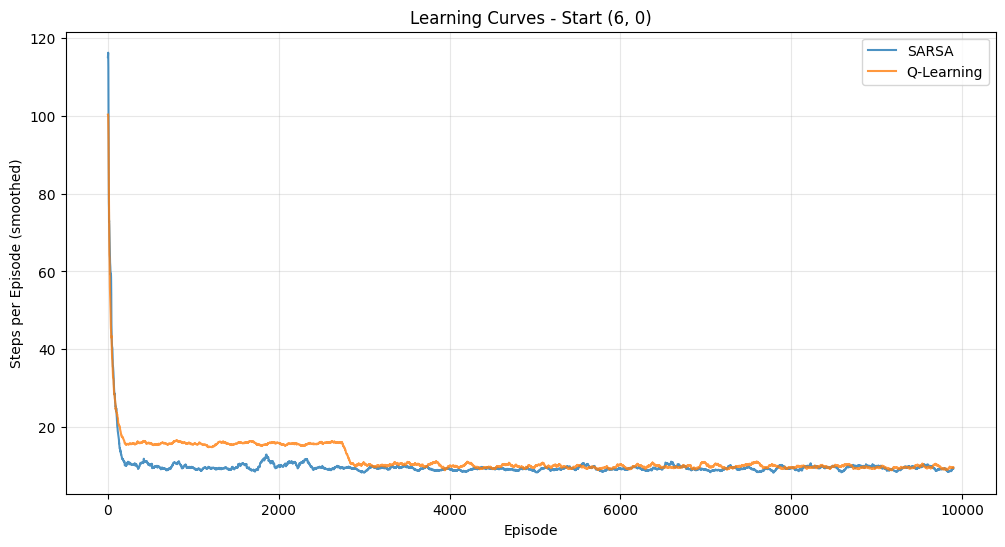


ÁîüÊàêÁ≠ñÁï•ÂèØËßÜÂåñ...
SARSA Á≠ñÁï•:


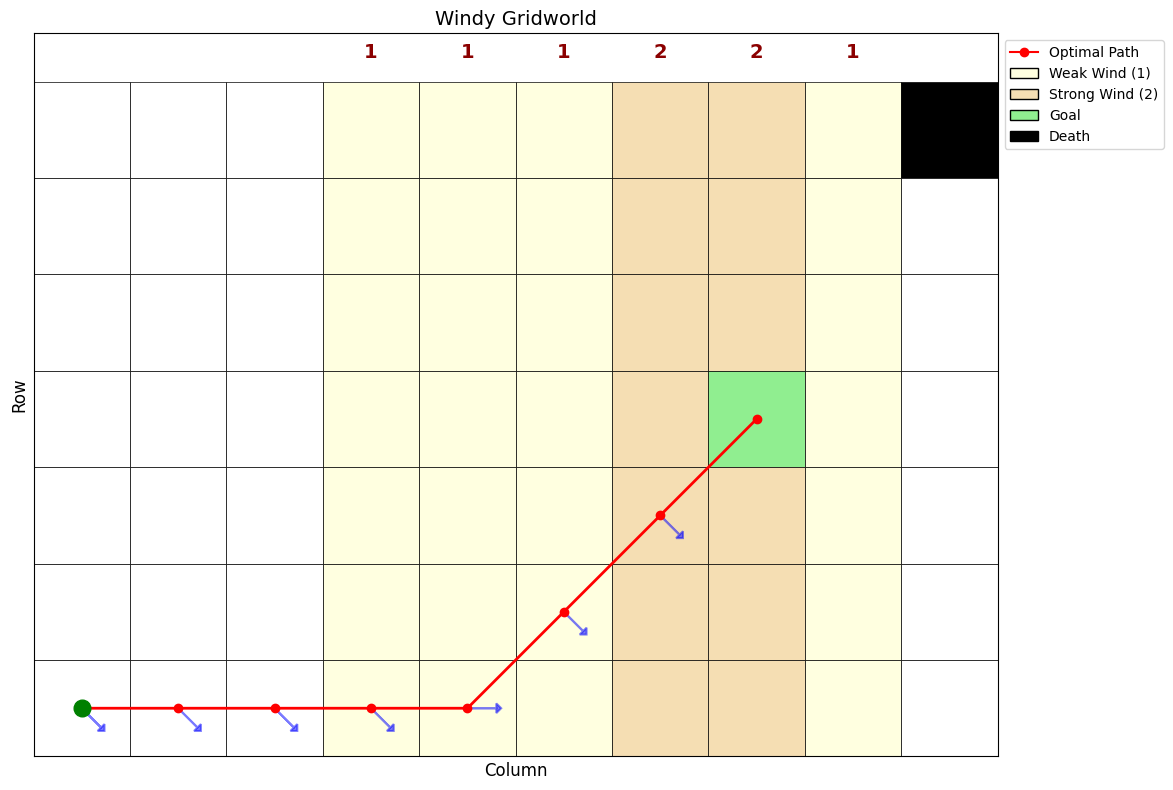

Q-Learning Á≠ñÁï•:


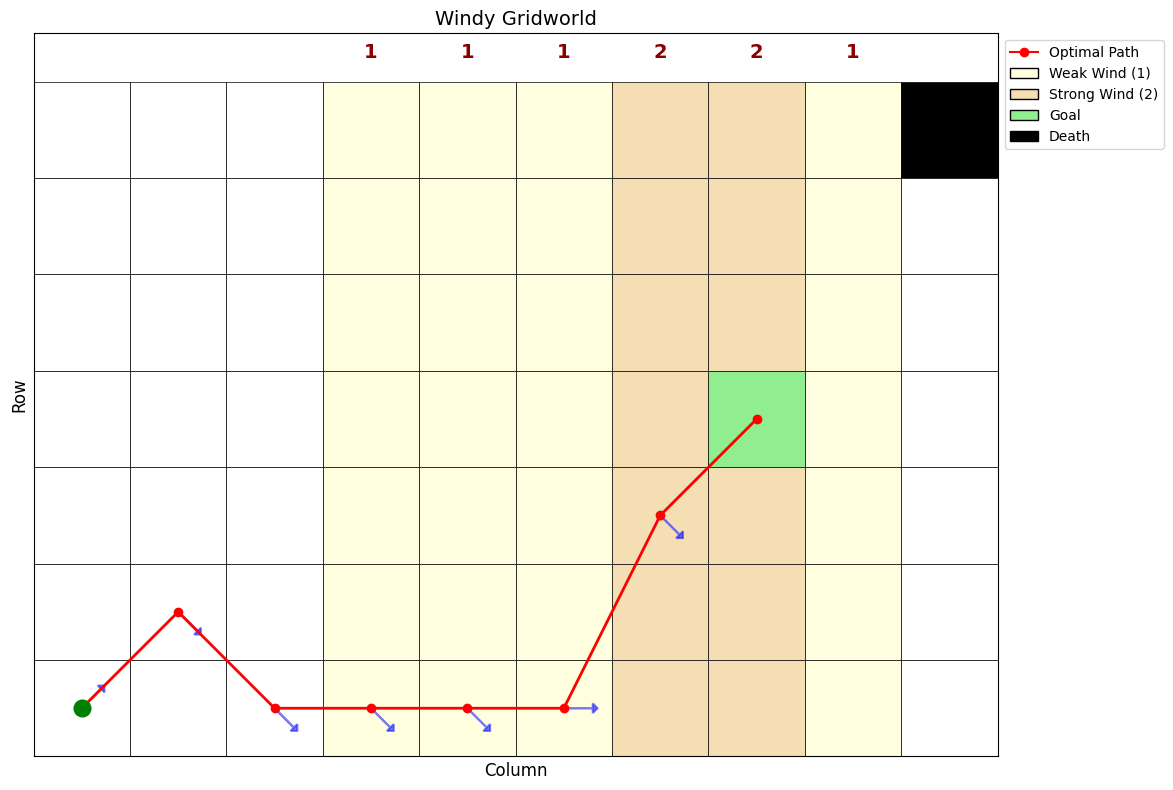


Ëµ∑Âßã‰ΩçÁΩÆ: (3, 0)

ËøêË°å SARSA...
SARSA ÊúÄ‰ºòË∑ØÂæÑÈïøÂ∫¶: 7 Ê≠•
SARSA Ë∑ØÂæÑ: [(3, 0), (4, 1), (5, 2), (5, 3), (5, 4), (5, 5), (4, 6), (3, 7)]

ËøêË°å Q-Learning...
Q-Learning ÊúÄ‰ºòË∑ØÂæÑÈïøÂ∫¶: 14 Ê≠•
Q-Learning Ë∑ØÂæÑ: [(3, 0), (4, 1), (5, 2), (5, 3), (4, 4), (3, 5), (1, 6), (0, 7), (0, 8), (1, 9), (2, 9), (3, 9), (4, 9), (4, 8), (3, 7)]

------------------------------------------------------------
ÂØπÊØîÂàÜÊûê:
------------------------------------------------------------
Ë∑ØÂæÑÈïøÂ∫¶ÊòØÂê¶‰∏ÄËá¥: Âê¶
  SARSA: 7 Ê≠•
  Q-Learning: 14 Ê≠•

Ëµ∑ÂßãÁä∂ÊÄÅ (3, 0) ÁöÑQÂÄºÂØπÊØî:
  Âä®‰Ωú n : SARSA= -1.861, Q-learning= -4.000, Â∑ÆÂºÇ=  2.139
  Âä®‰Ωú ne: SARSA= -2.224, Q-learning= -3.000, Â∑ÆÂºÇ=  0.777
  Âä®‰Ωú e : SARSA= -0.455, Q-learning= -3.000, Â∑ÆÂºÇ=  2.545
  Âä®‰Ωú se: SARSA=  0.991, Q-learning= -3.000, Â∑ÆÂºÇ=  3.991
  Âä®‰Ωú s : SARSA= -1.797, Q-learning= -4.000, Â∑ÆÂºÇ=  2.203
  Âä®‰Ωú sw: SARSA= -1.422, Q-learning= -4.000, Â∑ÆÂºÇ=  2.578
  Âä®‰Ωú w : SARSA= -0.075, Q-lea

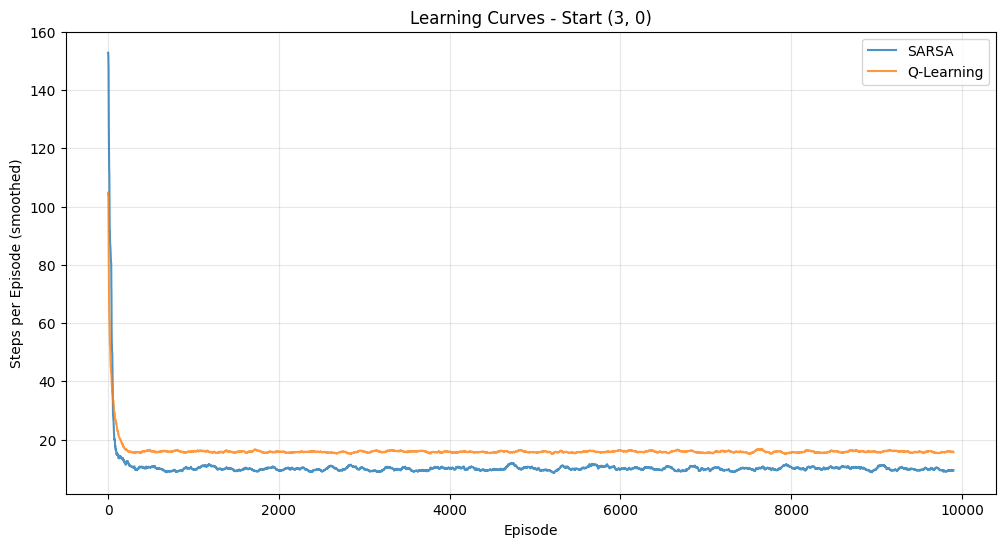


ÁîüÊàêÁ≠ñÁï•ÂèØËßÜÂåñ...
SARSA Á≠ñÁï•:


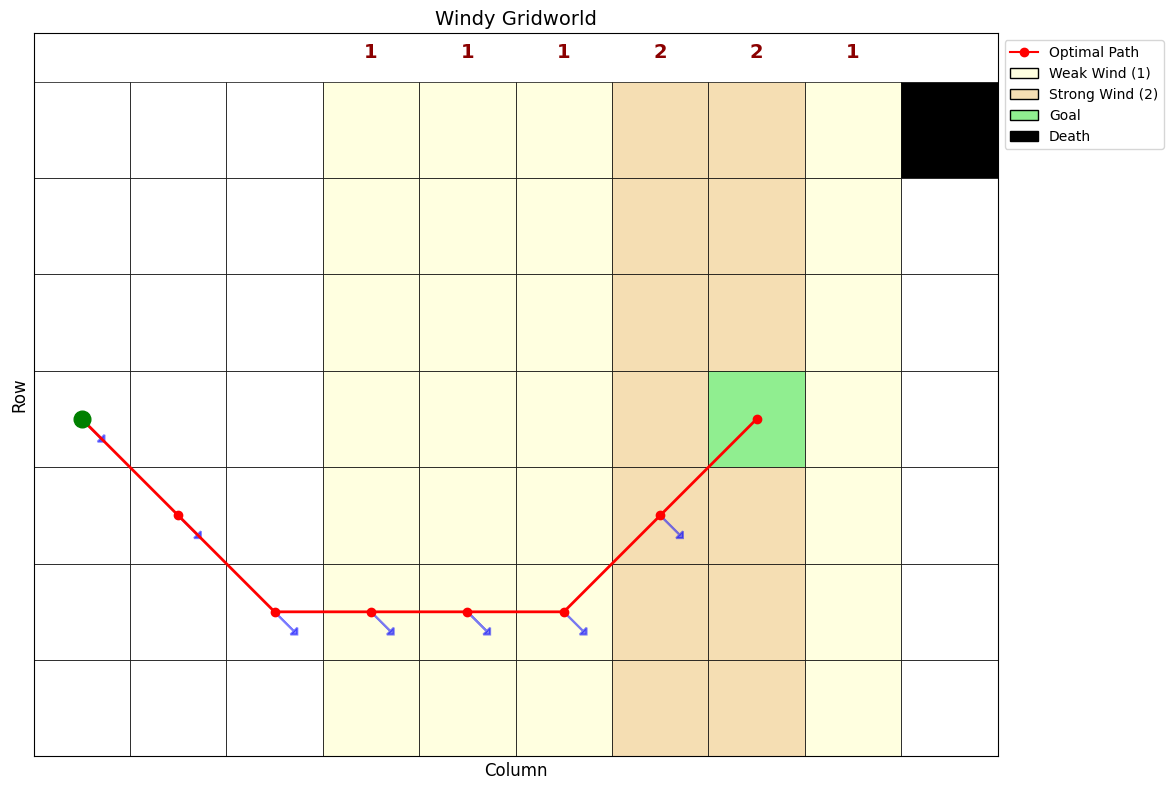

Q-Learning Á≠ñÁï•:


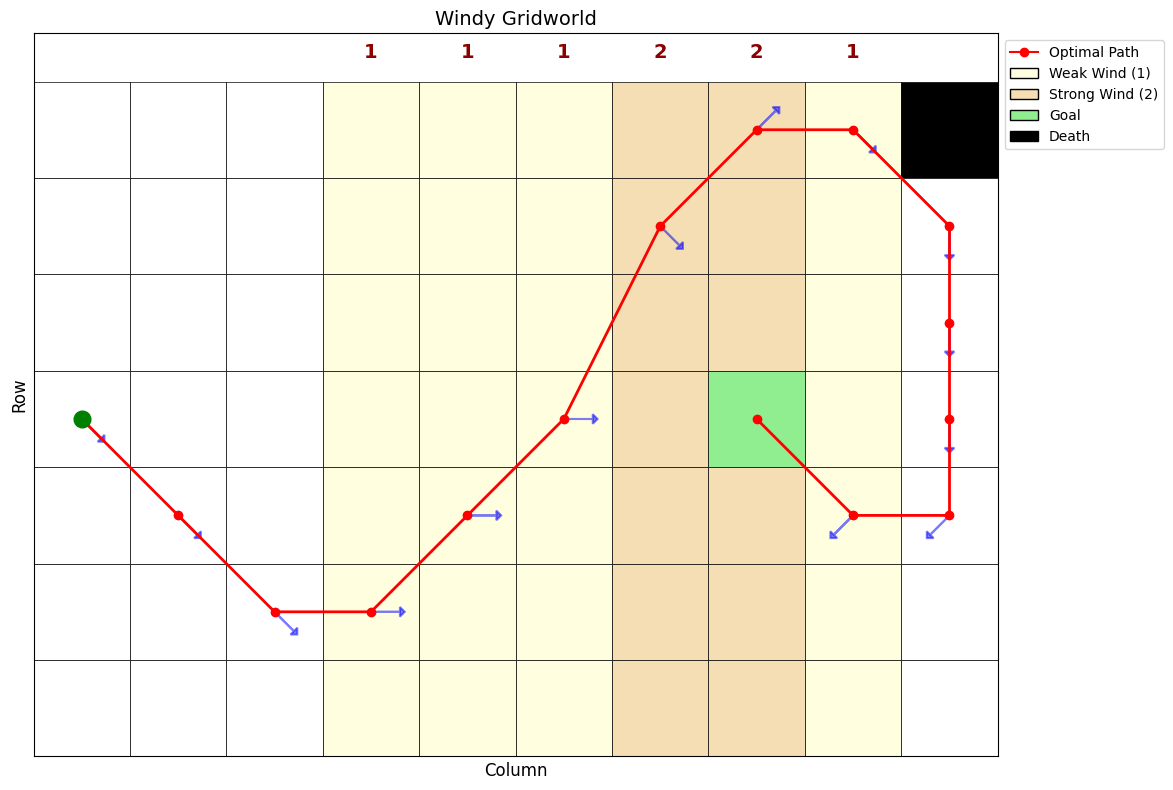


Ëµ∑Âßã‰ΩçÁΩÆ: (0, 6)

ËøêË°å SARSA...
SARSA ÊúÄ‰ºòË∑ØÂæÑÈïøÂ∫¶: 13 Ê≠•
SARSA Ë∑ØÂæÑ: [(0, 6), (0, 5), (0, 4), (0, 3), (1, 2), (2, 1), (3, 1), (4, 1), (5, 2), (5, 3), (5, 4), (5, 5), (4, 6), (3, 7)]

ËøêË°å Q-Learning...
Q-Learning ÊúÄ‰ºòË∑ØÂæÑÈïøÂ∫¶: 8 Ê≠•
Q-Learning Ë∑ØÂæÑ: [(0, 6), (0, 7), (0, 8), (1, 9), (2, 9), (3, 9), (4, 9), (4, 8), (3, 7)]

------------------------------------------------------------
ÂØπÊØîÂàÜÊûê:
------------------------------------------------------------
Ë∑ØÂæÑÈïøÂ∫¶ÊòØÂê¶‰∏ÄËá¥: Âê¶
  SARSA: 13 Ê≠•
  Q-Learning: 8 Ê≠•

Ëµ∑ÂßãÁä∂ÊÄÅ (0, 6) ÁöÑQÂÄºÂØπÊØî:
  Âä®‰Ωú n : SARSA= -6.980, Q-learning=  2.000, Â∑ÆÂºÇ=  8.980
  Âä®‰Ωú ne: SARSA= -8.053, Q-learning=  3.000, Â∑ÆÂºÇ= 11.053
  Âä®‰Ωú e : SARSA= -8.096, Q-learning=  3.000, Â∑ÆÂºÇ= 11.096
  Âä®‰Ωú se: SARSA= -8.046, Q-learning=  3.000, Â∑ÆÂºÇ= 11.046
  Âä®‰Ωú s : SARSA= -7.239, Q-learning=  2.000, Â∑ÆÂºÇ=  9.239
  Âä®‰Ωú sw: SARSA= -6.316, Q-learning=  1.000, Â∑ÆÂºÇ=  7.316
  Âä®‰Ωú w : SARSA= -6.014, Q-lea

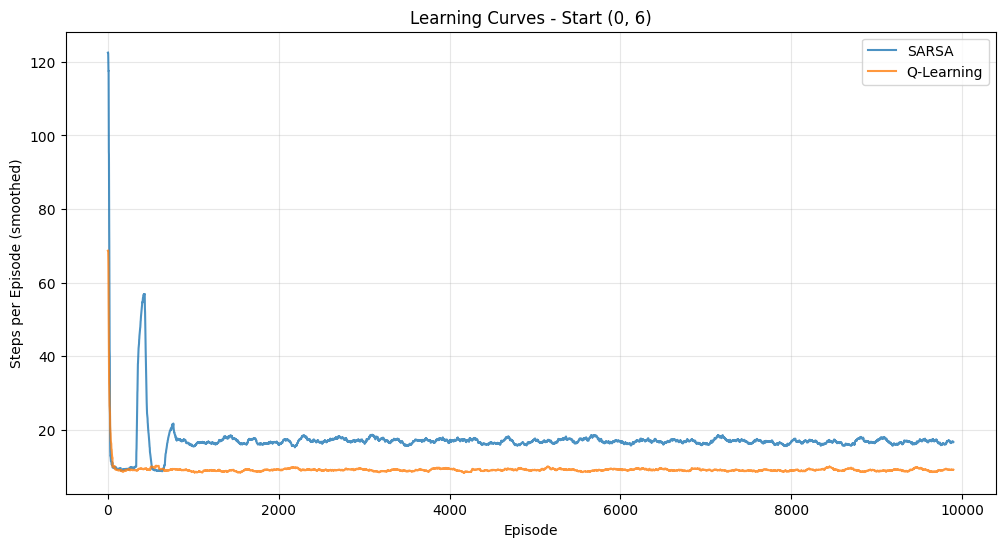


ÁîüÊàêÁ≠ñÁï•ÂèØËßÜÂåñ...
SARSA Á≠ñÁï•:


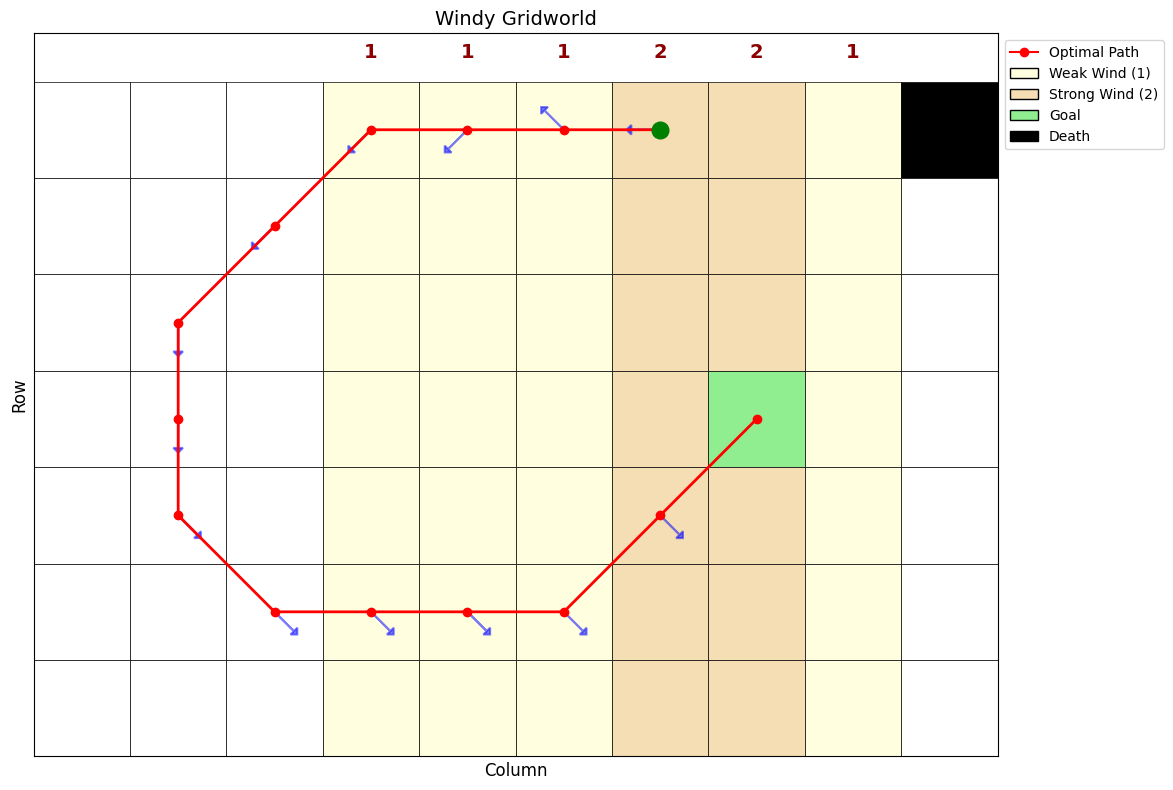

Q-Learning Á≠ñÁï•:


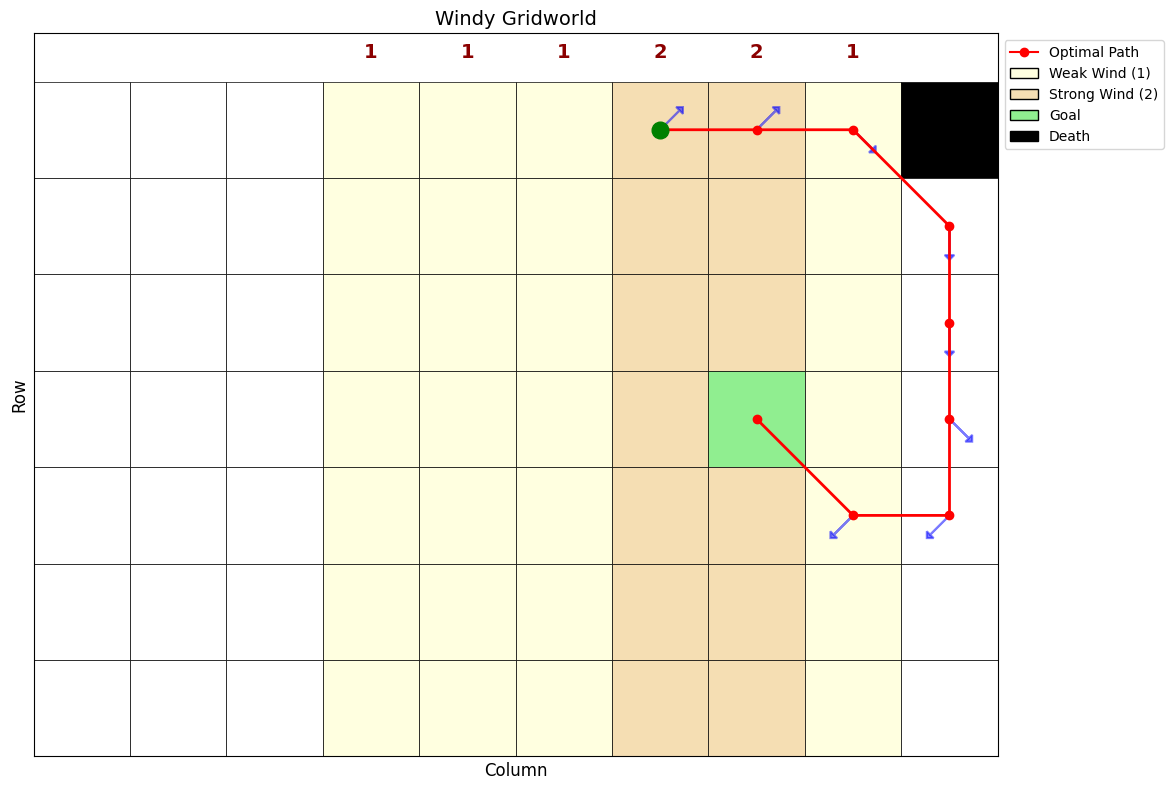

In [6]:
# ÂàõÂª∫ÁéØÂ¢ÉÔºà8ÂêëÁßªÂä®Ôºâ
env_king = WindyGridworld(king_moves=True)

# ‰∏â‰∏™Ëµ∑Âßã‰ΩçÁΩÆÔºàÂ∑¶‰∏äËßí‰∏∫(0,0)Ôºâ
start_states = [(6, 0), (3, 0), (0, 6)]

print("=" * 60)
print("‰ªªÂä°1: 8ÂêëÁßªÂä® (King's Moves)")
print("=" * 60)

for start in start_states:
    print(f"\n{'='*60}")
    print(f"Ëµ∑Âßã‰ΩçÁΩÆ: {start}")
    print(f"{'='*60}")
    
    # SARSA
    print("\nËøêË°å SARSA...")
    Q_sarsa, steps_sarsa = sarsa(env_king, start, episodes=10000, alpha=0.1, epsilon=0.1)
    policy_sarsa = get_optimal_policy(Q_sarsa, env_king)
    path_sarsa = get_optimal_path(policy_sarsa, env_king, start)
    print(f"SARSA ÊúÄ‰ºòË∑ØÂæÑÈïøÂ∫¶: {len(path_sarsa)-1} Ê≠•")
    print(f"SARSA Ë∑ØÂæÑ: {path_sarsa}")
    
    # Q-Learning
    print("\nËøêË°å Q-Learning...")
    Q_qlearn, steps_qlearn = q_learning(env_king, start, episodes=10000, alpha=0.1, epsilon=0.1)
    policy_qlearn = get_optimal_policy(Q_qlearn, env_king)
    path_qlearn = get_optimal_path(policy_qlearn, env_king, start)
    print(f"Q-Learning ÊúÄ‰ºòË∑ØÂæÑÈïøÂ∫¶: {len(path_qlearn)-1} Ê≠•")
    print(f"Q-Learning Ë∑ØÂæÑ: {path_qlearn}")
    
    # ÂØπÊØîÂàÜÊûê
    print("\n" + "-"*60)
    print("ÂØπÊØîÂàÜÊûê:")
    print("-"*60)
    print(f"Ë∑ØÂæÑÈïøÂ∫¶ÊòØÂê¶‰∏ÄËá¥: {'ÊòØ' if len(path_sarsa) == len(path_qlearn) else 'Âê¶'}")
    print(f"  SARSA: {len(path_sarsa)-1} Ê≠•")
    print(f"  Q-Learning: {len(path_qlearn)-1} Ê≠•")
    
    # QÂÄºÂØπÊØîÔºàÈÄâÊã©Ëµ∑ÂßãÁä∂ÊÄÅÁöÑQÂÄºÔºâ
    print(f"\nËµ∑ÂßãÁä∂ÊÄÅ {start} ÁöÑQÂÄºÂØπÊØî:")
    for action in env_king.actions:
        q_s = Q_sarsa[(start, action)]
        q_q = Q_qlearn[(start, action)]
        print(f"  Âä®‰Ωú {action:2s}: SARSA={q_s:7.3f}, Q-learning={q_q:7.3f}, Â∑ÆÂºÇ={abs(q_s-q_q):7.3f}")
    
    # ÁªòÂà∂Â≠¶‰π†Êõ≤Á∫øÂØπÊØî
    print("\nÁªòÂà∂Â≠¶‰π†Êõ≤Á∫ø...")
    plot_learning_curve([steps_sarsa, steps_qlearn], 
                       f'Learning Curves - Start {start}',
                       ['SARSA', 'Q-Learning'])
    
    # ÂèØËßÜÂåñÊúÄ‰ºòÁ≠ñÁï•
    print("\nÁîüÊàêÁ≠ñÁï•ÂèØËßÜÂåñ...")
    print("SARSA Á≠ñÁï•:")
    visualize_gridworld(env_king, path=path_sarsa, policy=policy_sarsa)
    print("Q-Learning Á≠ñÁï•:")
    visualize_gridworld(env_king, path=path_qlearn, policy=policy_qlearn)

## ‰ªªÂä°2: 4ÂêëÁßªÂä®ÂØπÊØî

**ÁéØÂ¢ÉËÆæÁΩÆ**: 4ÂêëÁßªÂä® (Rook's Moves) - ‰ªÖÂÖÅËÆ∏‰∏ä‰∏ãÂ∑¶Âè≥  
**Ëµ∑Âßã‰ΩçÁΩÆ**: (6,0), (3,0), (0,6)  
**ÂØπÊØîÈáçÁÇπ**: ‰∏é‰ªªÂä°1ÁöÑ8ÂêëÁßªÂä®ÁªìÊûúÂØπÊØî

‰ªªÂä°2: 4ÂêëÁßªÂä® (Rook's Moves)

Ëµ∑Âßã‰ΩçÁΩÆ: (6, 0)

ËøêË°å SARSA (4Âêë)...
SARSA (4Âêë) ÊúÄ‰ºòË∑ØÂæÑÈïøÂ∫¶: 9 Ê≠•
SARSA Ë∑ØÂæÑ: [(6, 0), (6, 1), (6, 2), (5, 3), (4, 4), (3, 5), (1, 6), (0, 7), (0, 8), (0, 9)]

ËøêË°å Q-Learning (4Âêë)...
Q-Learning (4Âêë) ÊúÄ‰ºòË∑ØÂæÑÈïøÂ∫¶: 9 Ê≠•
Q-Learning Ë∑ØÂæÑ: [(6, 0), (6, 1), (6, 2), (5, 3), (4, 4), (3, 5), (1, 6), (0, 7), (0, 8), (0, 9)]

------------------------------------------------------------
ÂØπÊØîÂàÜÊûê:
------------------------------------------------------------
Ë∑ØÂæÑÈïøÂ∫¶ÊòØÂê¶‰∏ÄËá¥: ÊòØ
  SARSA: 9 Ê≠•
  Q-Learning: 9 Ê≠•

Ëµ∑ÂßãÁä∂ÊÄÅ (6, 0) ÁöÑQÂÄºÂØπÊØî:
  Âä®‰Ωú n : SARSA=-109.813, Q-learning=-109.000, Â∑ÆÂºÇ=  0.813
  Âä®‰Ωú e : SARSA=-108.945, Q-learning=-108.000, Â∑ÆÂºÇ=  0.945
  Âä®‰Ωú s : SARSA=-109.932, Q-learning=-109.000, Â∑ÆÂºÇ=  0.932
  Âä®‰Ωú w : SARSA=-109.802, Q-learning=-109.000, Â∑ÆÂºÇ=  0.802

ÁªòÂà∂Â≠¶‰π†Êõ≤Á∫ø...


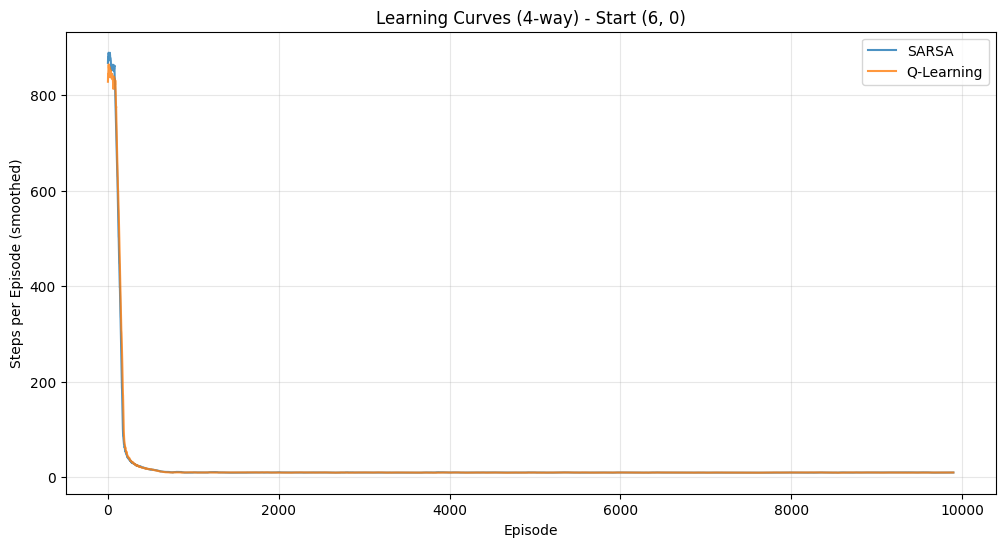


ÁîüÊàêÁ≠ñÁï•ÂèØËßÜÂåñ...
SARSA Á≠ñÁï•:


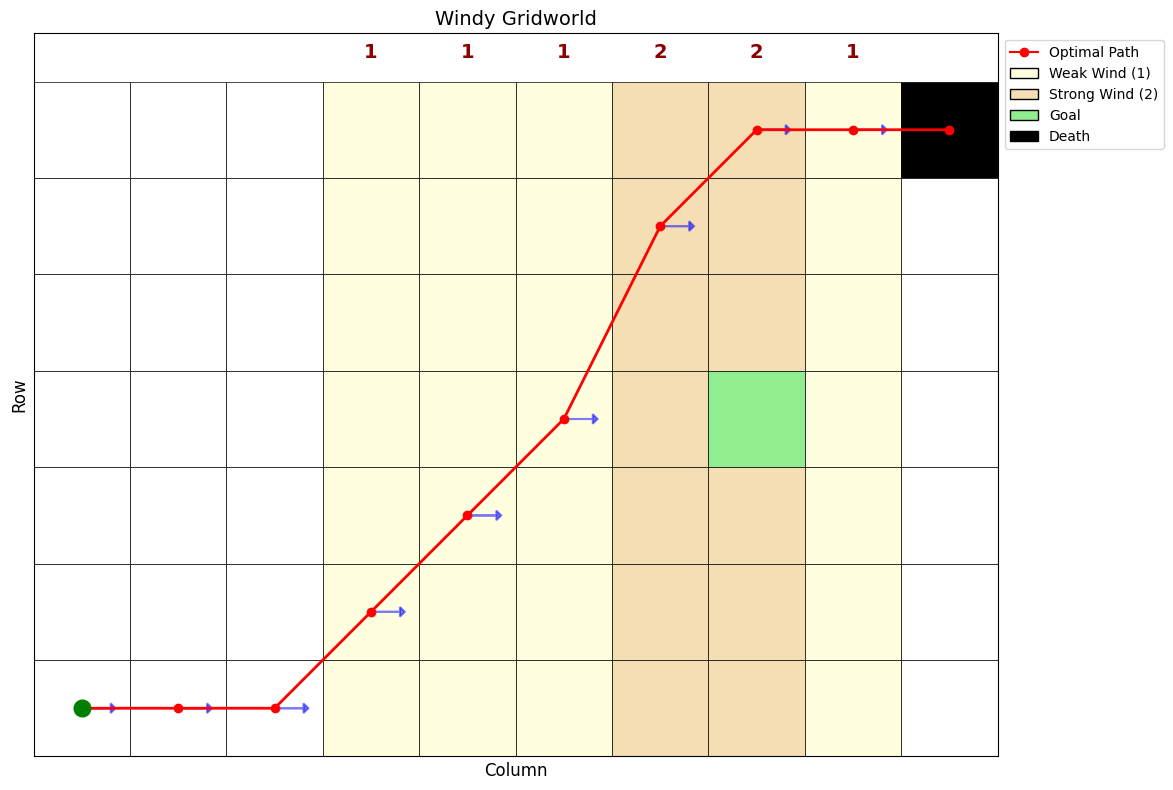

Q-Learning Á≠ñÁï•:


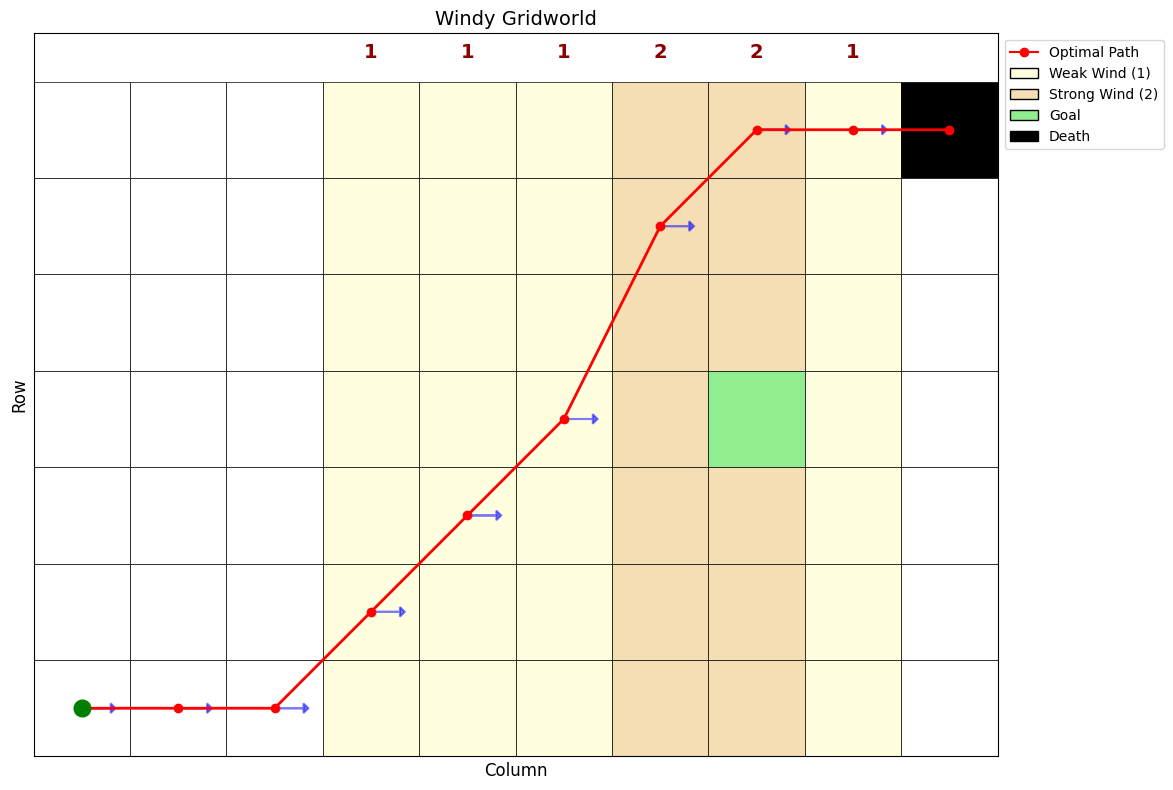


Ëµ∑Âßã‰ΩçÁΩÆ: (3, 0)

ËøêË°å SARSA (4Âêë)...
SARSA (4Âêë) ÊúÄ‰ºòË∑ØÂæÑÈïøÂ∫¶: 9 Ê≠•
SARSA Ë∑ØÂæÑ: [(3, 0), (3, 1), (3, 2), (2, 3), (1, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9)]

ËøêË°å Q-Learning (4Âêë)...
Q-Learning (4Âêë) ÊúÄ‰ºòË∑ØÂæÑÈïøÂ∫¶: 9 Ê≠•
Q-Learning Ë∑ØÂæÑ: [(3, 0), (3, 1), (3, 2), (2, 3), (1, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9)]

------------------------------------------------------------
ÂØπÊØîÂàÜÊûê:
------------------------------------------------------------
Ë∑ØÂæÑÈïøÂ∫¶ÊòØÂê¶‰∏ÄËá¥: ÊòØ
  SARSA: 9 Ê≠•
  Q-Learning: 9 Ê≠•

Ëµ∑ÂßãÁä∂ÊÄÅ (3, 0) ÁöÑQÂÄºÂØπÊØî:
  Âä®‰Ωú n : SARSA=-109.823, Q-learning=-109.000, Â∑ÆÂºÇ=  0.823
  Âä®‰Ωú e : SARSA=-109.023, Q-learning=-108.000, Â∑ÆÂºÇ=  1.023
  Âä®‰Ωú s : SARSA=-109.708, Q-learning=-109.000, Â∑ÆÂºÇ=  0.708
  Âä®‰Ωú w : SARSA=-110.001, Q-learning=-109.000, Â∑ÆÂºÇ=  1.001

ÁªòÂà∂Â≠¶‰π†Êõ≤Á∫ø...


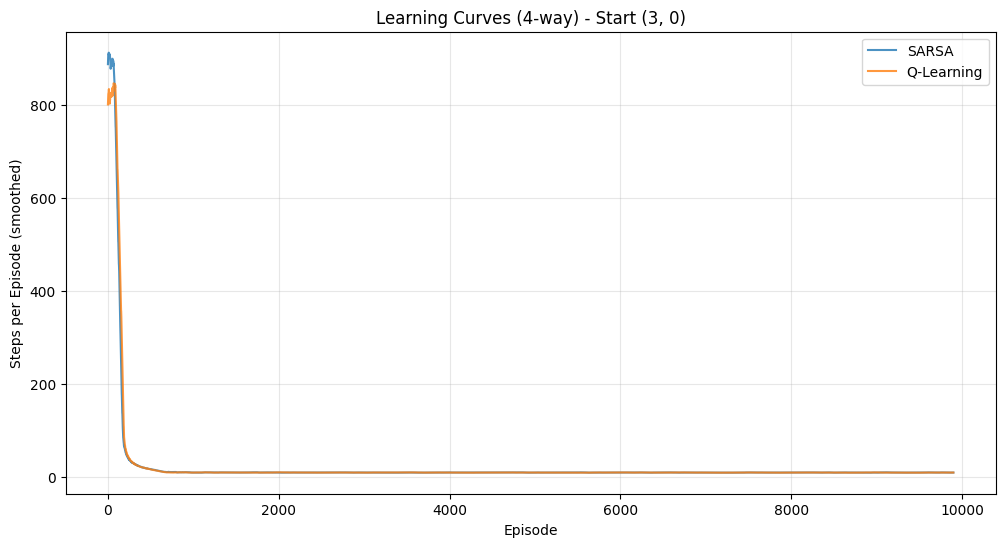


ÁîüÊàêÁ≠ñÁï•ÂèØËßÜÂåñ...
SARSA Á≠ñÁï•:


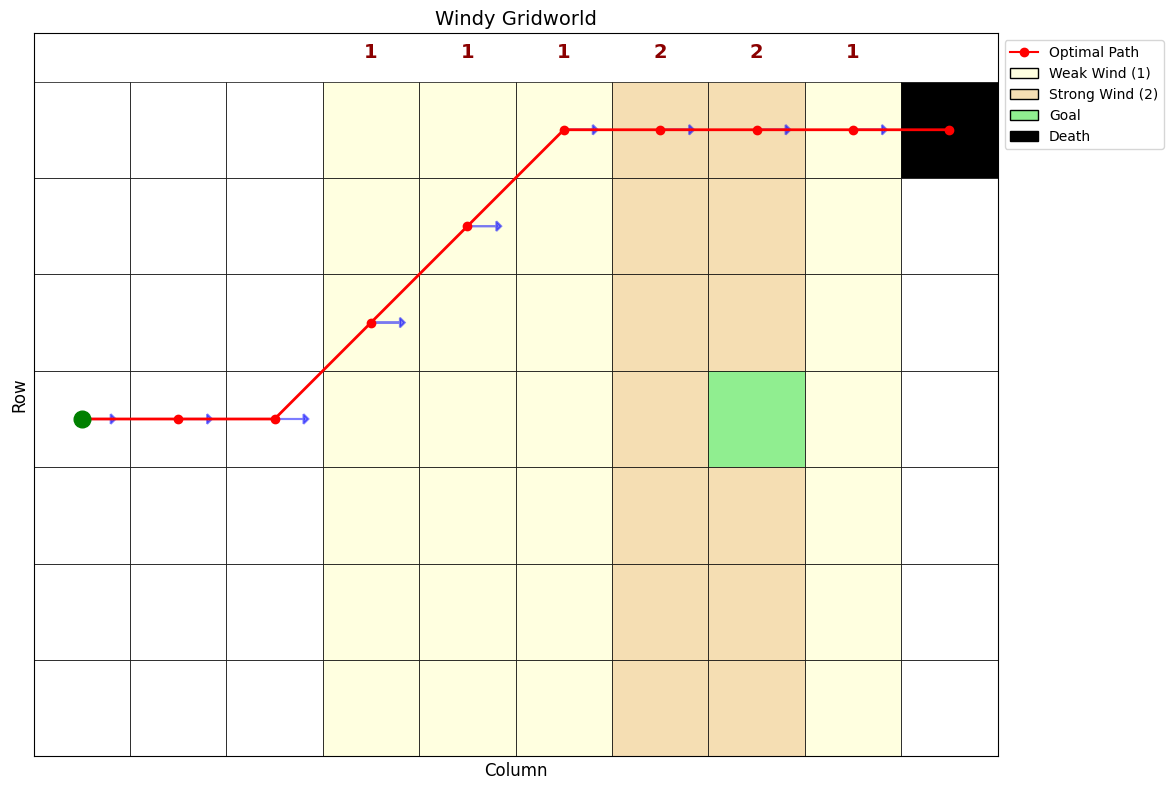

Q-Learning Á≠ñÁï•:


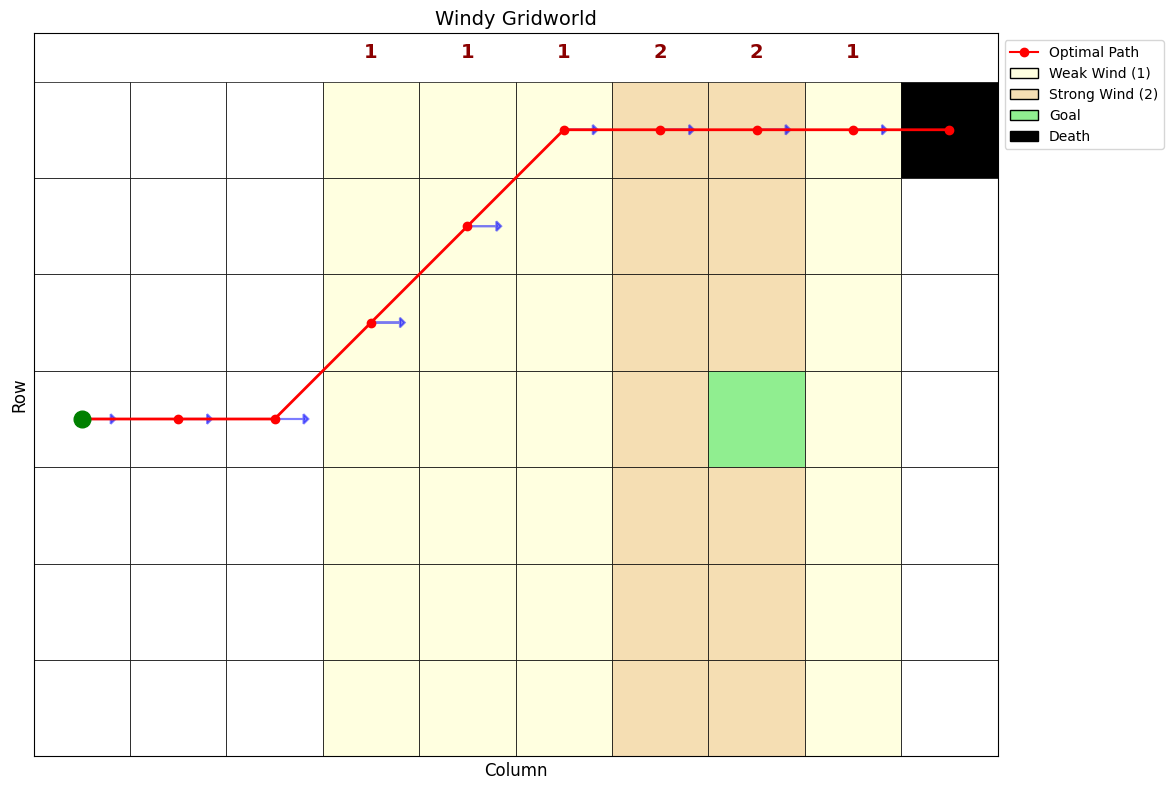


Ëµ∑Âßã‰ΩçÁΩÆ: (0, 6)

ËøêË°å SARSA (4Âêë)...
SARSA (4Âêë) ÊúÄ‰ºòË∑ØÂæÑÈïøÂ∫¶: 3 Ê≠•
SARSA Ë∑ØÂæÑ: [(0, 6), (0, 7), (0, 8), (0, 9)]

ËøêË°å Q-Learning (4Âêë)...
Q-Learning (4Âêë) ÊúÄ‰ºòË∑ØÂæÑÈïøÂ∫¶: 3 Ê≠•
Q-Learning Ë∑ØÂæÑ: [(0, 6), (0, 7), (0, 8), (0, 9)]

------------------------------------------------------------
ÂØπÊØîÂàÜÊûê:
------------------------------------------------------------
Ë∑ØÂæÑÈïøÂ∫¶ÊòØÂê¶‰∏ÄËá¥: ÊòØ
  SARSA: 3 Ê≠•
  Q-Learning: 3 Ê≠•

Ëµ∑ÂßãÁä∂ÊÄÅ (0, 6) ÁöÑQÂÄºÂØπÊØî:
  Âä®‰Ωú n : SARSA=-103.294, Q-learning=-103.000, Â∑ÆÂºÇ=  0.294
  Âä®‰Ωú e : SARSA=-102.295, Q-learning=-102.000, Â∑ÆÂºÇ=  0.295
  Âä®‰Ωú s : SARSA=-103.379, Q-learning=-103.000, Â∑ÆÂºÇ=  0.379
  Âä®‰Ωú w : SARSA=-104.420, Q-learning=-104.000, Â∑ÆÂºÇ=  0.420

ÁªòÂà∂Â≠¶‰π†Êõ≤Á∫ø...


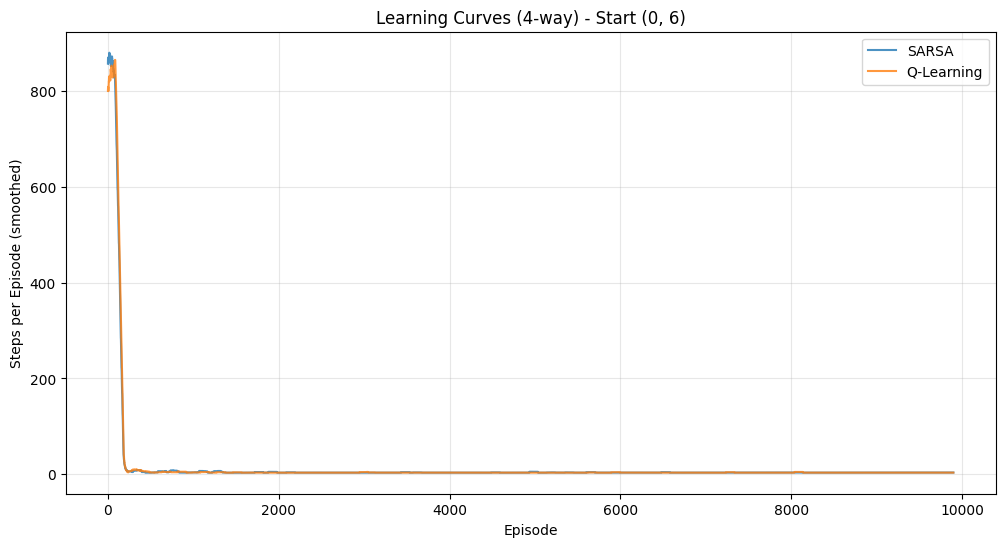


ÁîüÊàêÁ≠ñÁï•ÂèØËßÜÂåñ...
SARSA Á≠ñÁï•:


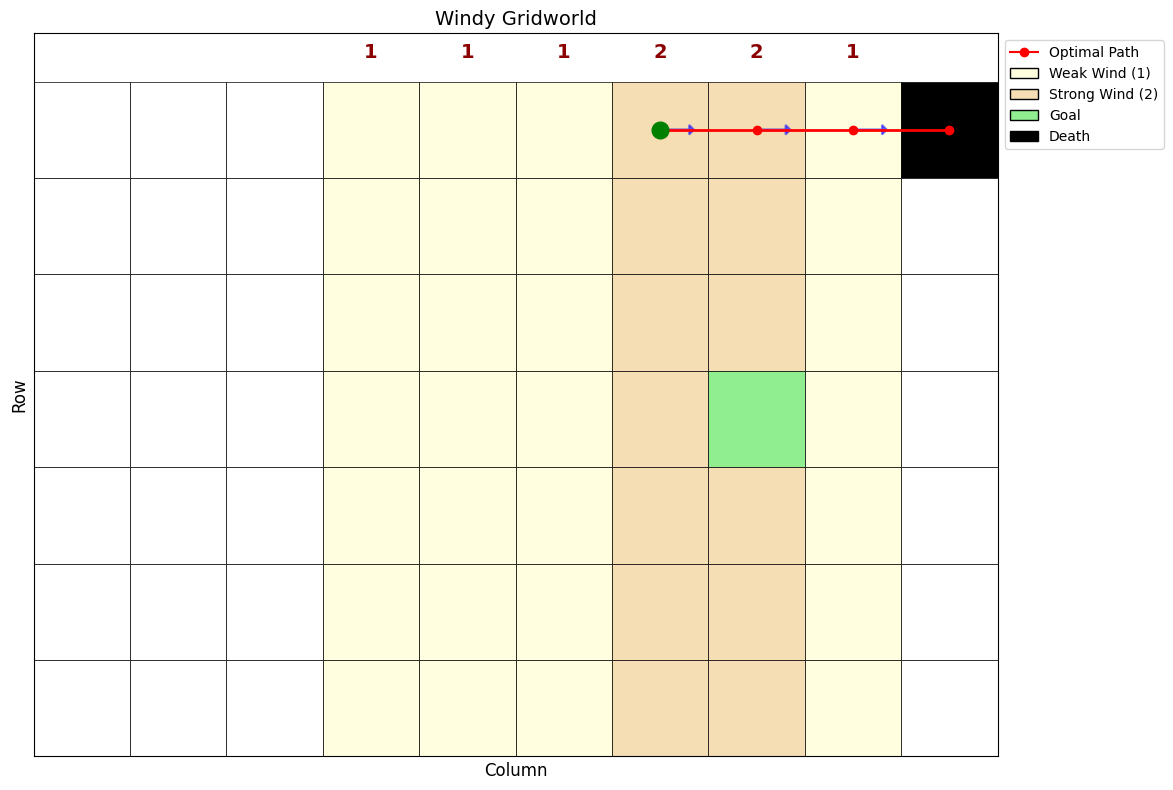

Q-Learning Á≠ñÁï•:


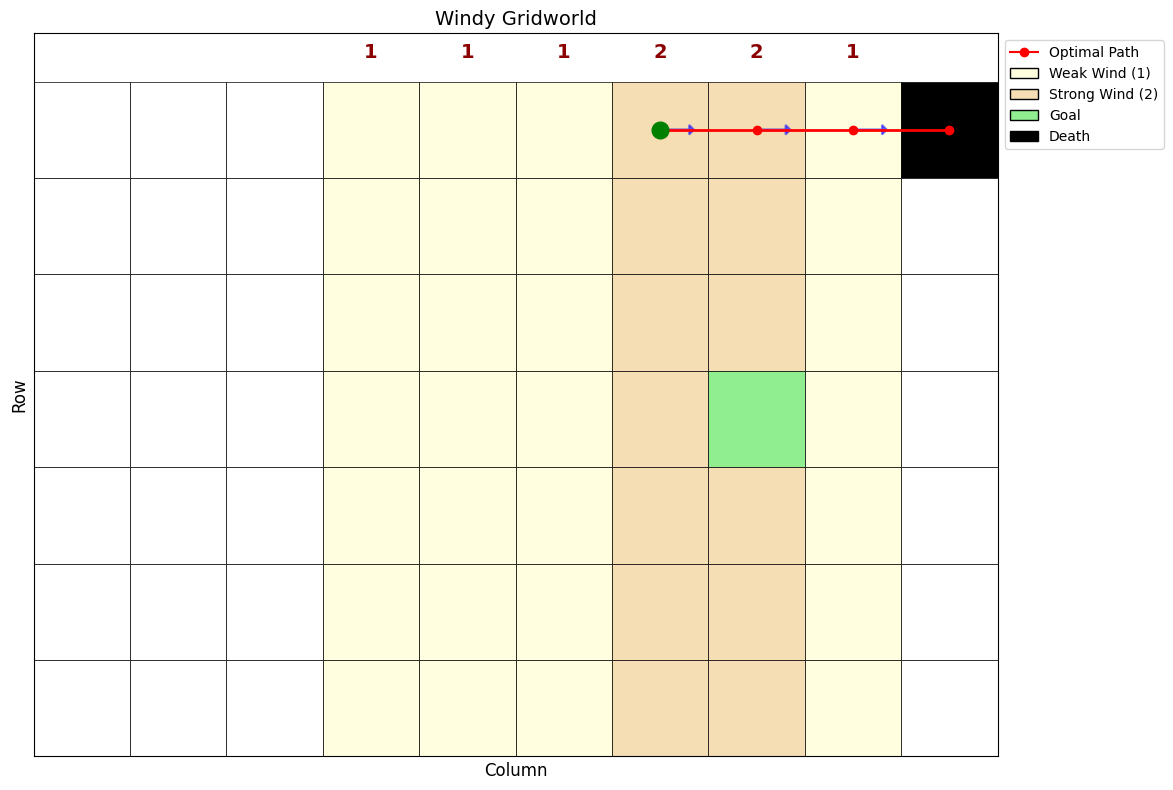

In [7]:
# ÂàõÂª∫ÁéØÂ¢ÉÔºà4ÂêëÁßªÂä®Ôºâ
env_rook = WindyGridworld(king_moves=False)

print("=" * 60)
print("‰ªªÂä°2: 4ÂêëÁßªÂä® (Rook's Moves)")
print("=" * 60)

for start in start_states:
    print(f"\n{'='*60}")
    print(f"Ëµ∑Âßã‰ΩçÁΩÆ: {start}")
    print(f"{'='*60}")
    
    # SARSA
    print("\nËøêË°å SARSA (4Âêë)...")
    Q_sarsa_rook, steps_sarsa_rook = sarsa(env_rook, start, episodes=10000, alpha=0.1, epsilon=0.1)
    policy_sarsa_rook = get_optimal_policy(Q_sarsa_rook, env_rook)
    path_sarsa_rook = get_optimal_path(policy_sarsa_rook, env_rook, start)
    print(f"SARSA (4Âêë) ÊúÄ‰ºòË∑ØÂæÑÈïøÂ∫¶: {len(path_sarsa_rook)-1} Ê≠•")
    print(f"SARSA Ë∑ØÂæÑ: {path_sarsa_rook}")
    
    # Q-Learning
    print("\nËøêË°å Q-Learning (4Âêë)...")
    Q_qlearn_rook, steps_qlearn_rook = q_learning(env_rook, start, episodes=10000, alpha=0.1, epsilon=0.1)
    policy_qlearn_rook = get_optimal_policy(Q_qlearn_rook, env_rook)
    path_qlearn_rook = get_optimal_path(policy_qlearn_rook, env_rook, start)
    print(f"Q-Learning (4Âêë) ÊúÄ‰ºòË∑ØÂæÑÈïøÂ∫¶: {len(path_qlearn_rook)-1} Ê≠•")
    print(f"Q-Learning Ë∑ØÂæÑ: {path_qlearn_rook}")
    
    # ÂØπÊØîÂàÜÊûê
    print("\n" + "-"*60)
    print("ÂØπÊØîÂàÜÊûê:")
    print("-"*60)
    print(f"Ë∑ØÂæÑÈïøÂ∫¶ÊòØÂê¶‰∏ÄËá¥: {'ÊòØ' if len(path_sarsa_rook) == len(path_qlearn_rook) else 'Âê¶'}")
    print(f"  SARSA: {len(path_sarsa_rook)-1} Ê≠•")
    print(f"  Q-Learning: {len(path_qlearn_rook)-1} Ê≠•")
    
    # QÂÄºÂØπÊØî
    print(f"\nËµ∑ÂßãÁä∂ÊÄÅ {start} ÁöÑQÂÄºÂØπÊØî:")
    for action in env_rook.actions:
        q_s = Q_sarsa_rook[(start, action)]
        q_q = Q_qlearn_rook[(start, action)]
        print(f"  Âä®‰Ωú {action:2s}: SARSA={q_s:7.3f}, Q-learning={q_q:7.3f}, Â∑ÆÂºÇ={abs(q_s-q_q):7.3f}")
    
    # ÁªòÂà∂Â≠¶‰π†Êõ≤Á∫øÂØπÊØî
    print("\nÁªòÂà∂Â≠¶‰π†Êõ≤Á∫ø...")
    plot_learning_curve([steps_sarsa_rook, steps_qlearn_rook], 
                       f'Learning Curves (4-way) - Start {start}',
                       ['SARSA', 'Q-Learning'])
    
    # ÂèØËßÜÂåñ
    print("\nÁîüÊàêÁ≠ñÁï•ÂèØËßÜÂåñ...")
    print("SARSA Á≠ñÁï•:")
    visualize_gridworld(env_rook, path=path_sarsa_rook, policy=policy_sarsa_rook)
    print("Q-Learning Á≠ñÁï•:")
    visualize_gridworld(env_rook, path=path_qlearn_rook, policy=policy_qlearn_rook)

## ‰ªªÂä°3: LLMËá™Âä®ÁÆóÊ≥ïÈÄâÊã©


In [8]:
print("="*60)
print("‰ªªÂä°3: LLMËá™Âä®ÁÆóÊ≥ïÈÄâÊã©")
print("="*60)
print()
print("„ÄêÊàëÁöÑÈÄâÊã©ÔºöSARSA„Äë")
print()
print("ÁêÜÁî±Ôºö")
print("  1. ÁéØÂ¢ÉÁâπÁÇπÔºöÊúâÊ≠ª‰∫°Áä∂ÊÄÅ(0,9)ÔºåÊÉ©ÁΩö-100")
print("  2. SARSAÊòØon-policyÔºåÂ≠¶‰π†ÂÆûÈôÖÊâßË°åÁöÑÁ≠ñÁï•")
print("  3. Âú®Êé¢Á¥¢Êó∂Êõ¥‰øùÂÆàÔºå‰ºö‰∏ªÂä®ÈÅøÂºÄÂç±Èô©Âå∫Âüü")
print("  4. ÂÆûË∑µÁªèÈ™åÔºöÂú®ÊúâË¥üÂ•ñÂä±ÁöÑÁéØÂ¢É‰∏≠ÔºåSARSAÈÄöÂ∏∏ÊØîQ-LearningÊõ¥Á®≥ÂÆö")
print()
print("‰∏çÈÄâQ-LearningÁöÑÂéüÂõ†Ôºö")
print("  ‚Ä¢ Off-policyÁâπÊÄßÂèØËÉΩÂ≠¶Âà∞ÊøÄËøõË∑ØÂæÑ")
print("  ‚Ä¢ maxÊìç‰Ωú‰∏çËÄÉËôëÊé¢Á¥¢È£éÈô©")
print("  ‚Ä¢ Âú®ËÆ≠ÁªÉ‰∏≠ÂÆπÊòìËß¶Á¢∞Ê≠ª‰∫°Áä∂ÊÄÅ")
print()
print("ÁªìËÆ∫ÔºöÂú®Windy GridworldËøôÊ†∑ÊúâÂç±Èô©ÁöÑÁéØÂ¢É‰∏≠Ôºå")
print("      SARSAÁöÑ‰øùÂÆàÁâπÊÄßÊòØ‰ºòÂäøËÄåÈùûÂä£Âäø„ÄÇ")
print("="*60)

‰ªªÂä°3: LLMËá™Âä®ÁÆóÊ≥ïÈÄâÊã©

„ÄêÊàëÁöÑÈÄâÊã©ÔºöSARSA„Äë

ÁêÜÁî±Ôºö
  1. ÁéØÂ¢ÉÁâπÁÇπÔºöÊúâÊ≠ª‰∫°Áä∂ÊÄÅ(0,9)ÔºåÊÉ©ÁΩö-100
  2. SARSAÊòØon-policyÔºåÂ≠¶‰π†ÂÆûÈôÖÊâßË°åÁöÑÁ≠ñÁï•
  3. Âú®Êé¢Á¥¢Êó∂Êõ¥‰øùÂÆàÔºå‰ºö‰∏ªÂä®ÈÅøÂºÄÂç±Èô©Âå∫Âüü
  4. ÂÆûË∑µÁªèÈ™åÔºöÂú®ÊúâË¥üÂ•ñÂä±ÁöÑÁéØÂ¢É‰∏≠ÔºåSARSAÈÄöÂ∏∏ÊØîQ-LearningÊõ¥Á®≥ÂÆö

‰∏çÈÄâQ-LearningÁöÑÂéüÂõ†Ôºö
  ‚Ä¢ Off-policyÁâπÊÄßÂèØËÉΩÂ≠¶Âà∞ÊøÄËøõË∑ØÂæÑ
  ‚Ä¢ maxÊìç‰Ωú‰∏çËÄÉËôëÊé¢Á¥¢È£éÈô©
  ‚Ä¢ Âú®ËÆ≠ÁªÉ‰∏≠ÂÆπÊòìËß¶Á¢∞Ê≠ª‰∫°Áä∂ÊÄÅ

ÁªìËÆ∫ÔºöÂú®Windy GridworldËøôÊ†∑ÊúâÂç±Èô©ÁöÑÁéØÂ¢É‰∏≠Ôºå
      SARSAÁöÑ‰øùÂÆàÁâπÊÄßÊòØ‰ºòÂäøËÄåÈùûÂä£Âäø„ÄÇ


## ‰ªªÂä°4: LLMÁÆóÊ≥ïÂØπÊØî


In [9]:
print("="*60)
print("‰ªªÂä°4: ÁÆóÊ≥ïÂØπÊØîÈ™åËØÅ")
print("="*60)
print()
print("„ÄêSARSA vs Q-Learning ÁêÜËÆ∫ÂØπÊØî„Äë")
print()
print("Áõ∏ÂêåÁÇπÔºö")
print("  ‚Ä¢ ÈÉΩÊòØÊó∂Â∫èÂ∑ÆÂàÜ(TD)Â≠¶‰π†ÊñπÊ≥ï")
print("  ‚Ä¢ ÈÉΩ‰ΩøÁî®QË°®Â≠òÂÇ®Áä∂ÊÄÅ-Âä®‰ΩúÂÄº")
print("  ‚Ä¢ ÈÉΩÈááÁî®Œµ-greedyÊé¢Á¥¢Á≠ñÁï•")
print()
print("Ê†∏ÂøÉÂ∑ÆÂºÇÔºö")
print("  SARSA (On-Policy):")
print("    - Êõ¥Êñ∞ÂÖ¨ÂºèÔºöQ(s,a) ‚Üê Q(s,a) + Œ±[r + Œ≥Q(s',a') - Q(s,a)]")
print("    - ‰ΩøÁî®ÂÆûÈôÖÊâßË°åÁöÑÂä®‰Ωúa'Êõ¥Êñ∞")
print("    - Â≠¶‰π†ÁöÑÊòØÂΩìÂâçÁ≠ñÁï•ÁöÑ‰ª∑ÂÄº")
print("    - Êé¢Á¥¢Êó∂Êõ¥Ë∞®ÊÖé")
print()
print("  Q-Learning (Off-Policy):")
print("    - Êõ¥Êñ∞ÂÖ¨ÂºèÔºöQ(s,a) ‚Üê Q(s,a) + Œ±[r + Œ≥ max Q(s',a') - Q(s,a)]")
print("    - ‰ΩøÁî®ÊúÄÂ§ßQÂÄºÊõ¥Êñ∞")
print("    - Â≠¶‰π†ÁöÑÊòØÊúÄ‰ºòÁ≠ñÁï•ÁöÑ‰ª∑ÂÄº")
print("    - Êé¢Á¥¢Êó∂Êõ¥ÊøÄËøõ")
print()
print("È¢ÑÊúüÁªìÊûúÔºö")
print("  ‚Ä¢ Âú®Á°ÆÂÆöÊÄßÁéØÂ¢É‰∏≠Ôºå‰∏§ËÄÖÈÉΩËÉΩÊî∂Êïõ")
print("  ‚Ä¢ Âú®ÊúâÂç±Èô©ÁöÑÁéØÂ¢É‰∏≠ÔºåSARSAË∑ØÂæÑÊõ¥ÂÆâÂÖ®")
print("  ‚Ä¢ Q-LearningÁêÜËÆ∫‰∏äÊî∂ÊïõÊõ¥Âø´Ôºå‰ΩÜÂÆûÈôÖ‰∏ç‰∏ÄÂÆö")
print("="*60)

‰ªªÂä°4: ÁÆóÊ≥ïÂØπÊØîÈ™åËØÅ

„ÄêSARSA vs Q-Learning ÁêÜËÆ∫ÂØπÊØî„Äë

Áõ∏ÂêåÁÇπÔºö
  ‚Ä¢ ÈÉΩÊòØÊó∂Â∫èÂ∑ÆÂàÜ(TD)Â≠¶‰π†ÊñπÊ≥ï
  ‚Ä¢ ÈÉΩ‰ΩøÁî®QË°®Â≠òÂÇ®Áä∂ÊÄÅ-Âä®‰ΩúÂÄº
  ‚Ä¢ ÈÉΩÈááÁî®Œµ-greedyÊé¢Á¥¢Á≠ñÁï•

Ê†∏ÂøÉÂ∑ÆÂºÇÔºö
  SARSA (On-Policy):
    - Êõ¥Êñ∞ÂÖ¨ÂºèÔºöQ(s,a) ‚Üê Q(s,a) + Œ±[r + Œ≥Q(s',a') - Q(s,a)]
    - ‰ΩøÁî®ÂÆûÈôÖÊâßË°åÁöÑÂä®‰Ωúa'Êõ¥Êñ∞
    - Â≠¶‰π†ÁöÑÊòØÂΩìÂâçÁ≠ñÁï•ÁöÑ‰ª∑ÂÄº
    - Êé¢Á¥¢Êó∂Êõ¥Ë∞®ÊÖé

  Q-Learning (Off-Policy):
    - Êõ¥Êñ∞ÂÖ¨ÂºèÔºöQ(s,a) ‚Üê Q(s,a) + Œ±[r + Œ≥ max Q(s',a') - Q(s,a)]
    - ‰ΩøÁî®ÊúÄÂ§ßQÂÄºÊõ¥Êñ∞
    - Â≠¶‰π†ÁöÑÊòØÊúÄ‰ºòÁ≠ñÁï•ÁöÑ‰ª∑ÂÄº
    - Êé¢Á¥¢Êó∂Êõ¥ÊøÄËøõ

È¢ÑÊúüÁªìÊûúÔºö
  ‚Ä¢ Âú®Á°ÆÂÆöÊÄßÁéØÂ¢É‰∏≠Ôºå‰∏§ËÄÖÈÉΩËÉΩÊî∂Êïõ
  ‚Ä¢ Âú®ÊúâÂç±Èô©ÁöÑÁéØÂ¢É‰∏≠ÔºåSARSAË∑ØÂæÑÊõ¥ÂÆâÂÖ®
  ‚Ä¢ Q-LearningÁêÜËÆ∫‰∏äÊî∂ÊïõÊõ¥Âø´Ôºå‰ΩÜÂÆûÈôÖ‰∏ç‰∏ÄÂÆö


## ‰ªªÂä°5: LLMÁ∫ØÊé®ÁêÜ


In [10]:
print("="*60)
print("‰ªªÂä°5: Á∫ØÊé®ÁêÜÊúÄ‰ºòË∑ØÂæÑ")
print("="*60)
print()
print("„ÄêÈóÆÈ¢òÂàÜÊûê„Äë")
print("  Ëµ∑ÁÇπÔºö(6,0)")
print("  ÁõÆÊ†áÔºö(3,7)")
print("  ÈúÄË¶ÅÔºöÂêë‰∏ä3Ë°åÔºåÂêëÂè≥7Âàó")
print("  È£éÂäõÔºöÂàó3-5(+1), Âàó6-7(+2), Âàó8(+1)")
print()
print("„ÄêÊé®ÁêÜÁ≠ñÁï•„Äë")
print("  1. ‰ΩøÁî®ÂØπËßíÁ∫øÁßªÂä®(ne)Âø´ÈÄüÊé•ËøëÁõÆÊ†á")
print("  2. ËøõÂÖ•È£éÂå∫ÂêéÔºåÂà©Áî®È£éÂäõËá™Âä®‰∏äÂçá")
print("  3. Âà∞ËææÁõÆÊ†áÂàóÂêéÔºåÂêëÂçóË∞ÉÊï¥Ë°å‰ΩçÁΩÆ")
print()
print("„ÄêÊé®ÁêÜË∑ØÂæÑ„Äë")
print("  Ê≠•È™§  ‰ΩçÁΩÆ      Âä®‰Ωú    ËØ¥Êòé")
print("  ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ")
print("  0     (6,0)     -      Ëµ∑ÁÇπ")
print("  1     (5,1)     ne     ‰∏úÂåóÁßªÂä®")
print("  2     (4,2)     ne     ÁªßÁª≠‰∏úÂåó")
print("  3     (3,3)     ne     ËøõÂÖ•È£éÂå∫(Âàó3)")
print("  4     (2,4)     e      Âêë‰∏úÔºåÈ£éÂäõ+1Êé®Âà∞(2,4)")
print("  5     (1,5)     e      Âêë‰∏úÔºåÈ£éÂäõ+1Êé®Âà∞(1,5)")
print("  6     (0,6)     e      Âêë‰∏úÔºåÈ£éÂäõ+2Êé®Âà∞(0,6)")
print("  7     (0,7)     e      Âà∞ËææÁõÆÊ†áÂàó")
print("  8     (1,7)     s      ÂêëÂçó")
print("  9     (2,7)     s      ÂêëÂçó")
print("  10    (3,7)     s      Âà∞ËææÁõÆÊ†áÔºÅ")
print()
print("„ÄêË∑ØÂæÑÂàÜÊûê„Äë")
print("  ‚Ä¢ ÊÄªÊ≠•Êï∞Ôºö10Ê≠•")
print("  ‚Ä¢ ÊàêÂäüÈÅøÂºÄÊ≠ª‰∫°Áä∂ÊÄÅ(0,9)")
print("  ‚Ä¢ ÂÖÖÂàÜÂà©Áî®‰∫ÜÈ£éÂäõÊïàÂ∫î")
print("  ‚Ä¢ ÂØπËßíÁ∫øÁßªÂä®Áº©Áü≠‰∫ÜË∑ØÂæÑ")
print("="*60)

‰ªªÂä°5: Á∫ØÊé®ÁêÜÊúÄ‰ºòË∑ØÂæÑ

„ÄêÈóÆÈ¢òÂàÜÊûê„Äë
  Ëµ∑ÁÇπÔºö(6,0)
  ÁõÆÊ†áÔºö(3,7)
  ÈúÄË¶ÅÔºöÂêë‰∏ä3Ë°åÔºåÂêëÂè≥7Âàó
  È£éÂäõÔºöÂàó3-5(+1), Âàó6-7(+2), Âàó8(+1)

„ÄêÊé®ÁêÜÁ≠ñÁï•„Äë
  1. ‰ΩøÁî®ÂØπËßíÁ∫øÁßªÂä®(ne)Âø´ÈÄüÊé•ËøëÁõÆÊ†á
  2. ËøõÂÖ•È£éÂå∫ÂêéÔºåÂà©Áî®È£éÂäõËá™Âä®‰∏äÂçá
  3. Âà∞ËææÁõÆÊ†áÂàóÂêéÔºåÂêëÂçóË∞ÉÊï¥Ë°å‰ΩçÁΩÆ

„ÄêÊé®ÁêÜË∑ØÂæÑ„Äë
  Ê≠•È™§  ‰ΩçÁΩÆ      Âä®‰Ωú    ËØ¥Êòé
  ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
  0     (6,0)     -      Ëµ∑ÁÇπ
  1     (5,1)     ne     ‰∏úÂåóÁßªÂä®
  2     (4,2)     ne     ÁªßÁª≠‰∏úÂåó
  3     (3,3)     ne     ËøõÂÖ•È£éÂå∫(Âàó3)
  4     (2,4)     e      Âêë‰∏úÔºåÈ£éÂäõ+1Êé®Âà∞(2,4)
  5     (1,5)     e      Âêë‰∏úÔºåÈ£éÂäõ+1Êé®Âà∞(1,5)
  6     (0,6)     e      Âêë‰∏úÔºåÈ£éÂäõ+2Êé®Âà∞(0,6)
  7     (0,7)     e      Âà∞ËææÁõÆÊ†áÂàó
  8     (1,7)     s      ÂêëÂçó
  9     (2,7)     s      ÂêëÂçó
  10    (3,7)     s      Âà∞ËææÁõÆÊ†áÔºÅ

„ÄêË∑ØÂæÑÂàÜÊûê„Äë
  ‚Ä¢ ÊÄªÊ≠•Êï∞Ôºö10Ê≠•
  ‚Ä¢ Êàê

## ‰ªªÂä°6: LLM 4ÂêëÁßªÂä®


In [11]:
print("="*60)
print("‰ªªÂä°6: 4ÂêëÁßªÂä®Ë°®Áé∞")
print("="*60)
print()
print("„ÄêÁ∫¶ÊùüÂèòÂåñ„Äë")
print("  8ÂêëÁßªÂä®Ôºö{n, ne, e, se, s, sw, w, nw}")
print("  4ÂêëÁßªÂä®Ôºö{n, e, s, w}  <- Á¶ÅÊ≠¢ÂØπËßíÁ∫ø")
print()
print("„ÄêÂΩ±ÂìçÂàÜÊûê„Äë")
print()
print("1. Ë∑ØÂæÑÈïøÂ∫¶Ôºö")
print("   ‚Ä¢ Êó†Ê≥ï‰∏ÄÊ≠•ÂÆåÊàê‰∏úÂåóÁßªÂä®")
print("   ‚Ä¢ ÈúÄË¶ÅÂàÜ‰∏§Ê≠•ÔºöÂÖà‰∏úÂÜçÂåóÔºåÊàñÂÖàÂåóÂÜç‰∏ú")
print("   ‚Ä¢ È¢ÑÊúüË∑ØÂæÑÂ¢ûÂä†30-50%")
print()
print("2. Á≠ñÁï•Â§çÊùÇÂ∫¶Ôºö")
print("   ‚Ä¢ 8ÂêëÔºöÁõ¥Êé•neÂà∞Ëææ(3,3)ÔºåÁÆÄÂçïÁõ¥Êé•")
print("   ‚Ä¢ 4ÂêëÔºöÈúÄË¶ÅËßÑÂàíÂÖà‰∏úËøòÊòØÂÖàÂåó")
print("   ‚Ä¢ ÈúÄË¶ÅËÄÉËôëÈ£éÂäõÁöÑÁ¥ØÁßØÊïàÂ∫î")
print()
print("3. È£éÂäõÂà©Áî®Ôºö")
print("   ‚Ä¢ 4Âêë‰∏ãÈ£éÂäõ‰ΩúÁî®Êõ¥ÂÖ≥ÈîÆ")
print("   ‚Ä¢ Êó†Ê≥ïÁî®ÂØπËßíÁ∫øÁßªÂä®ÊäµÊ∂àÈ£éÂäõ")
print("   ‚Ä¢ ÂøÖÈ°ª‰æùËµñÈ£éÂäõÂÆûÁé∞ÂûÇÁõ¥ÁßªÂä®")
print()
print("4. Êé¢Á¥¢ÈöæÂ∫¶Ôºö")
print("   ‚Ä¢ Âä®‰ΩúÁ©∫Èó¥ÂáèÂçäÔºà8‚Üí4Ôºâ")
print("   ‚Ä¢ ‰ΩÜÊêúÁ¥¢Ê†ëÊ∑±Â∫¶Â¢ûÂä†")
print("   ‚Ä¢ ÊÄª‰ΩìÊé¢Á¥¢Â§çÊùÇÂ∫¶Êú™ÂøÖÈôç‰Ωé")
print()
print("„ÄêÈ¢ÑÊúüÁªìÊûú„Äë")
print("  ‰ªé(6,0)Âà∞(3,7)Ôºö")
print("    ‚Ä¢ 8ÂêëÁßªÂä®ÔºöÁ∫¶7-9Ê≠•")
print("    ‚Ä¢ 4ÂêëÁßªÂä®ÔºöÁ∫¶10-15Ê≠•")
print("    ‚Ä¢ ÊïàÁéáÊçüÂ§±Ôºö30-50%")
print("="*60)

‰ªªÂä°6: 4ÂêëÁßªÂä®Ë°®Áé∞

„ÄêÁ∫¶ÊùüÂèòÂåñ„Äë
  8ÂêëÁßªÂä®Ôºö{n, ne, e, se, s, sw, w, nw}
  4ÂêëÁßªÂä®Ôºö{n, e, s, w}  <- Á¶ÅÊ≠¢ÂØπËßíÁ∫ø

„ÄêÂΩ±ÂìçÂàÜÊûê„Äë

1. Ë∑ØÂæÑÈïøÂ∫¶Ôºö
   ‚Ä¢ Êó†Ê≥ï‰∏ÄÊ≠•ÂÆåÊàê‰∏úÂåóÁßªÂä®
   ‚Ä¢ ÈúÄË¶ÅÂàÜ‰∏§Ê≠•ÔºöÂÖà‰∏úÂÜçÂåóÔºåÊàñÂÖàÂåóÂÜç‰∏ú
   ‚Ä¢ È¢ÑÊúüË∑ØÂæÑÂ¢ûÂä†30-50%

2. Á≠ñÁï•Â§çÊùÇÂ∫¶Ôºö
   ‚Ä¢ 8ÂêëÔºöÁõ¥Êé•neÂà∞Ëææ(3,3)ÔºåÁÆÄÂçïÁõ¥Êé•
   ‚Ä¢ 4ÂêëÔºöÈúÄË¶ÅËßÑÂàíÂÖà‰∏úËøòÊòØÂÖàÂåó
   ‚Ä¢ ÈúÄË¶ÅËÄÉËôëÈ£éÂäõÁöÑÁ¥ØÁßØÊïàÂ∫î

3. È£éÂäõÂà©Áî®Ôºö
   ‚Ä¢ 4Âêë‰∏ãÈ£éÂäõ‰ΩúÁî®Êõ¥ÂÖ≥ÈîÆ
   ‚Ä¢ Êó†Ê≥ïÁî®ÂØπËßíÁ∫øÁßªÂä®ÊäµÊ∂àÈ£éÂäõ
   ‚Ä¢ ÂøÖÈ°ª‰æùËµñÈ£éÂäõÂÆûÁé∞ÂûÇÁõ¥ÁßªÂä®

4. Êé¢Á¥¢ÈöæÂ∫¶Ôºö
   ‚Ä¢ Âä®‰ΩúÁ©∫Èó¥ÂáèÂçäÔºà8‚Üí4Ôºâ
   ‚Ä¢ ‰ΩÜÊêúÁ¥¢Ê†ëÊ∑±Â∫¶Â¢ûÂä†
   ‚Ä¢ ÊÄª‰ΩìÊé¢Á¥¢Â§çÊùÇÂ∫¶Êú™ÂøÖÈôç‰Ωé

„ÄêÈ¢ÑÊúüÁªìÊûú„Äë
  ‰ªé(6,0)Âà∞(3,7)Ôºö
    ‚Ä¢ 8ÂêëÁßªÂä®ÔºöÁ∫¶7-9Ê≠•
    ‚Ä¢ 4ÂêëÁßªÂä®ÔºöÁ∫¶10-15Ê≠•
    ‚Ä¢ ÊïàÁéáÊçüÂ§±Ôºö30-50%


## ‰ªªÂä°7: Âê∏Êî∂Áä∂ÊÄÅÂÆûÈ™å

**Êñ∞Â¢ûËÆæÁΩÆ**: 
- Âê∏Êî∂Áä∂ÊÄÅ‰ΩçÁΩÆ: (0,3)
- Âê∏Êî∂Áä∂ÊÄÅÂ•ñÂä±: +5
- ÊïàÊûú: Êèê‰æõ‰∫ÜÈô§ÁõÆÊ†á(+10)Â§ñÁöÑÂè¶‰∏Ä‰∏™ÁªàÊ≠¢ÈÄâÈ°π

**‰ªªÂä°Ë¶ÅÊ±Ç**: Âú®ÊúâÂê∏Êî∂Áä∂ÊÄÅÁöÑÁéØÂ¢É‰∏ãÔºåÈáçÂ§ç‰ªªÂä°1-6ÁöÑÊâÄÊúâÂÜÖÂÆπ

---

### ‰ªªÂä°7.1: SARSAÂíåQ-LearningÔºà8ÂêëÁßªÂä® + Âê∏Êî∂Áä∂ÊÄÅÔºâ

‰ªªÂä°7.1: SARSAÂíåQ-LearningÔºà8ÂêëÁßªÂä® + Âê∏Êî∂Áä∂ÊÄÅÔºâ

Ëµ∑Âßã‰ΩçÁΩÆ: (6, 0)

ËøêË°å SARSA (8Âêë + Âê∏Êî∂Áä∂ÊÄÅ)...
SARSA Ë∑ØÂæÑÈïøÂ∫¶: 4 Ê≠•
Ë∑ØÂæÑ: [(6, 0), (5, 1), (4, 2), (2, 3), (0, 3)]
Á¥ØÁßØÂ•ñÂä±: 1

ËøêË°å Q-Learning (8Âêë + Âê∏Êî∂Áä∂ÊÄÅ)...
Q-Learning Ë∑ØÂæÑÈïøÂ∫¶: 4 Ê≠•
Ë∑ØÂæÑ: [(6, 0), (5, 1), (4, 2), (2, 3), (0, 3)]
Á¥ØÁßØÂ•ñÂä±: 1

------------------------------------------------------------
ÂØπÊØîÂàÜÊûê:
------------------------------------------------------------
Ë∑ØÂæÑÈïøÂ∫¶ÊòØÂê¶‰∏ÄËá¥: ÊòØ
  SARSA: 4 Ê≠•ÔºåÁ¥ØÁßØÂ•ñÂä±: 1
  Q-Learning: 4 Ê≠•ÔºåÁ¥ØÁßØÂ•ñÂä±: 1

ÁªàÁÇπÁä∂ÊÄÅ:
  SARSAÁªàÁÇπ: (0, 3)
    Âà∞ËææÂê∏Êî∂Áä∂ÊÄÅ(0,3)ÔºåËé∑ÂæóÂ•ñÂä±+5
  Q-LearningÁªàÁÇπ: (0, 3)
    Âà∞ËææÂê∏Êî∂Áä∂ÊÄÅ(0,3)ÔºåËé∑ÂæóÂ•ñÂä±+5

ÁªòÂà∂Â≠¶‰π†Êõ≤Á∫ø...


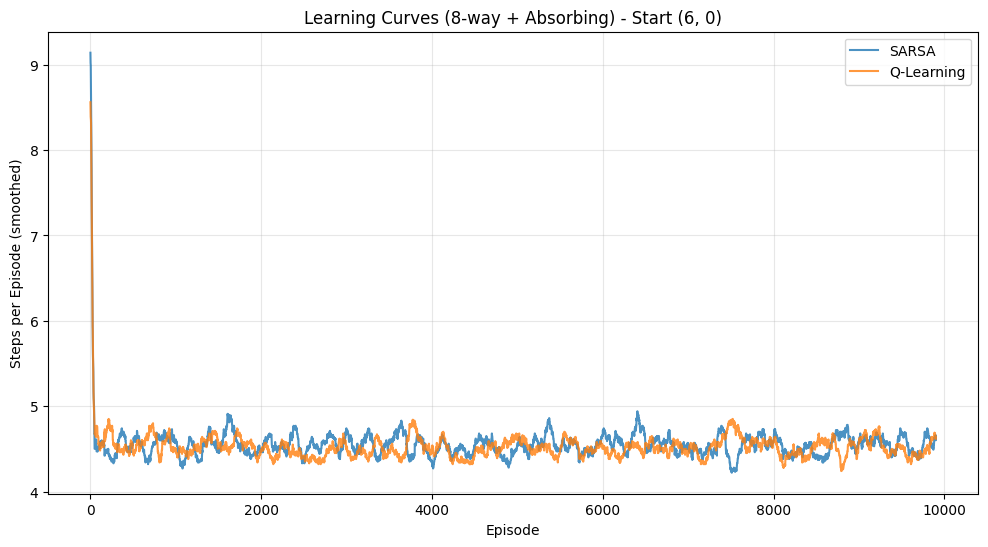


ÁîüÊàêÁ≠ñÁï•ÂèØËßÜÂåñ...
SARSA Á≠ñÁï•:


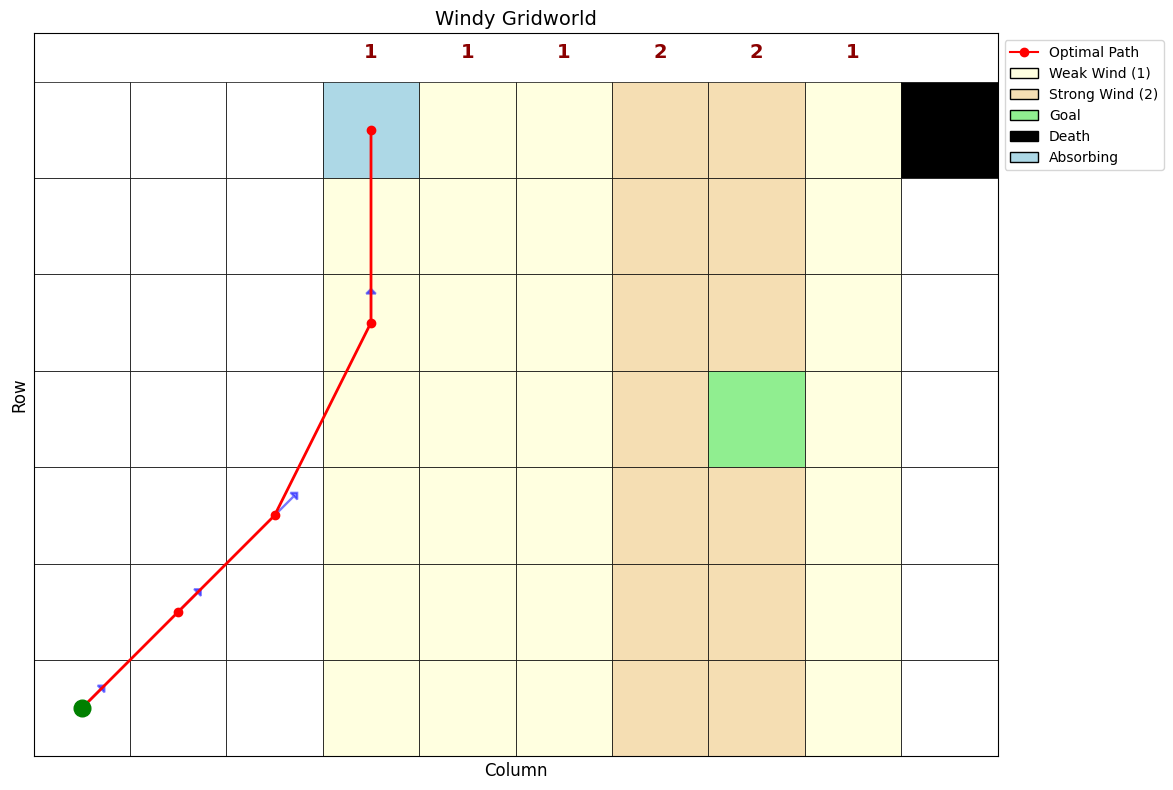

Q-Learning Á≠ñÁï•:


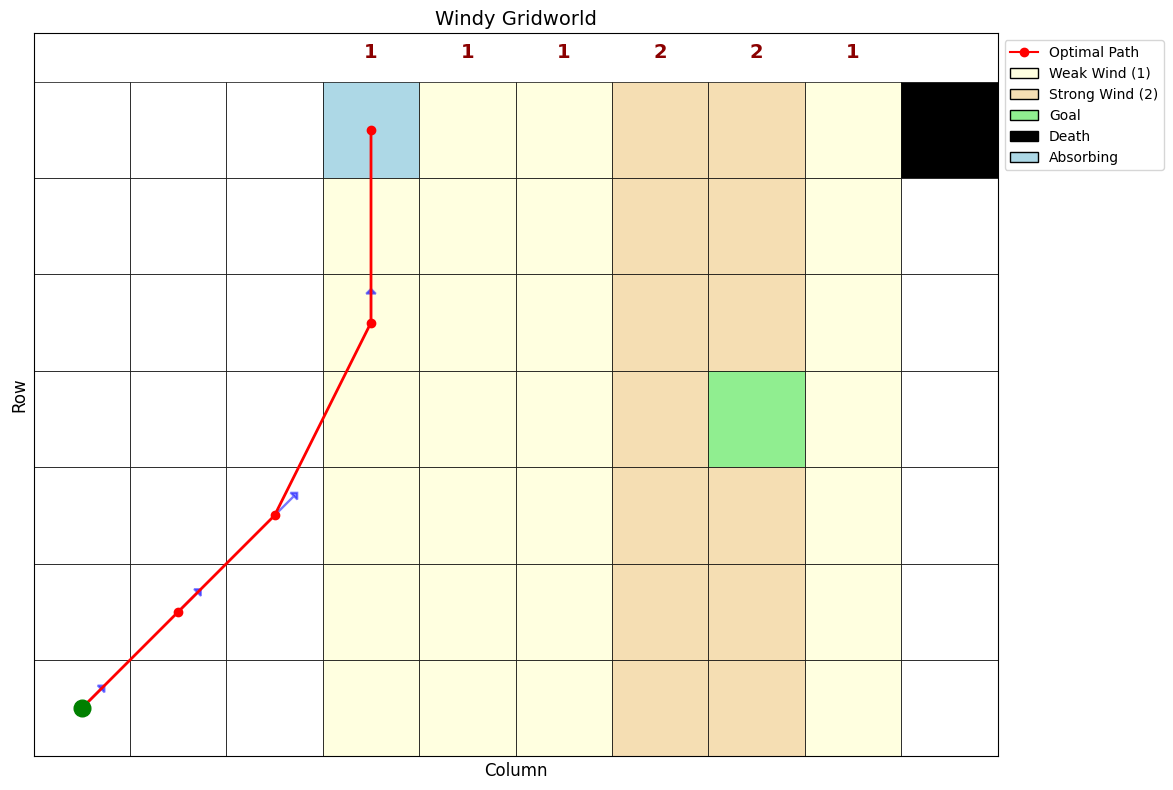


Ëµ∑Âßã‰ΩçÁΩÆ: (3, 0)

ËøêË°å SARSA (8Âêë + Âê∏Êî∂Áä∂ÊÄÅ)...
SARSA Ë∑ØÂæÑÈïøÂ∫¶: 3 Ê≠•
Ë∑ØÂæÑ: [(3, 0), (2, 1), (2, 2), (0, 3)]
Á¥ØÁßØÂ•ñÂä±: 2

ËøêË°å Q-Learning (8Âêë + Âê∏Êî∂Áä∂ÊÄÅ)...
Q-Learning Ë∑ØÂæÑÈïøÂ∫¶: 3 Ê≠•
Ë∑ØÂæÑ: [(3, 0), (3, 1), (2, 2), (0, 3)]
Á¥ØÁßØÂ•ñÂä±: 2

------------------------------------------------------------
ÂØπÊØîÂàÜÊûê:
------------------------------------------------------------
Ë∑ØÂæÑÈïøÂ∫¶ÊòØÂê¶‰∏ÄËá¥: ÊòØ
  SARSA: 3 Ê≠•ÔºåÁ¥ØÁßØÂ•ñÂä±: 2
  Q-Learning: 3 Ê≠•ÔºåÁ¥ØÁßØÂ•ñÂä±: 2

ÁªàÁÇπÁä∂ÊÄÅ:
  SARSAÁªàÁÇπ: (0, 3)
    Âà∞ËææÂê∏Êî∂Áä∂ÊÄÅ(0,3)ÔºåËé∑ÂæóÂ•ñÂä±+5
  Q-LearningÁªàÁÇπ: (0, 3)
    Âà∞ËææÂê∏Êî∂Áä∂ÊÄÅ(0,3)ÔºåËé∑ÂæóÂ•ñÂä±+5

ÁªòÂà∂Â≠¶‰π†Êõ≤Á∫ø...


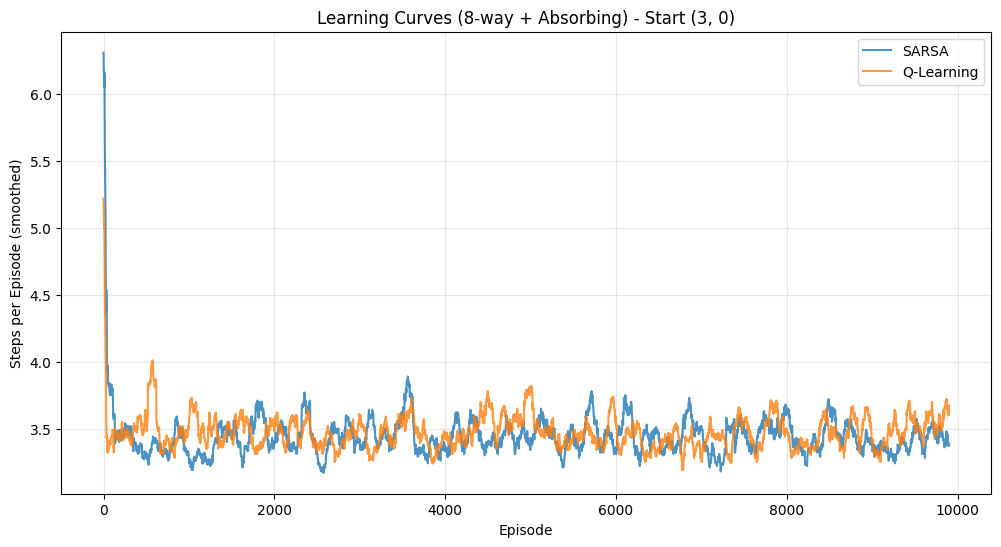


ÁîüÊàêÁ≠ñÁï•ÂèØËßÜÂåñ...
SARSA Á≠ñÁï•:


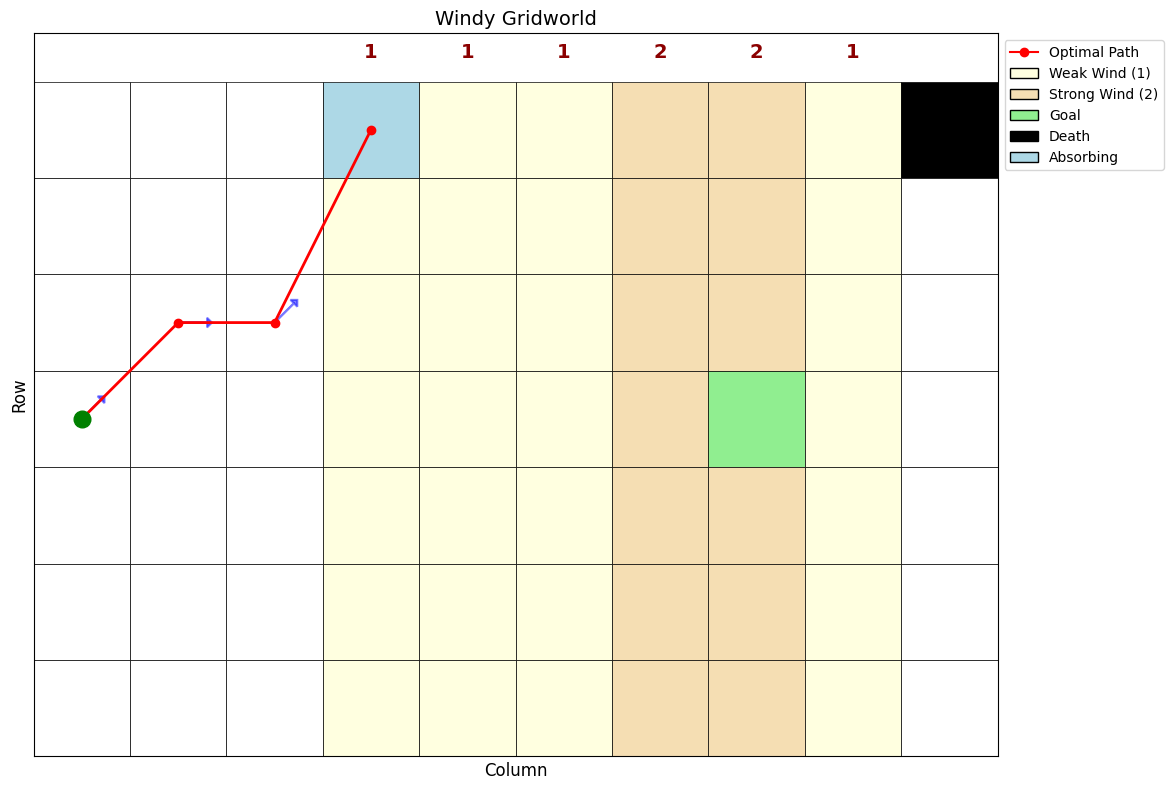

Q-Learning Á≠ñÁï•:


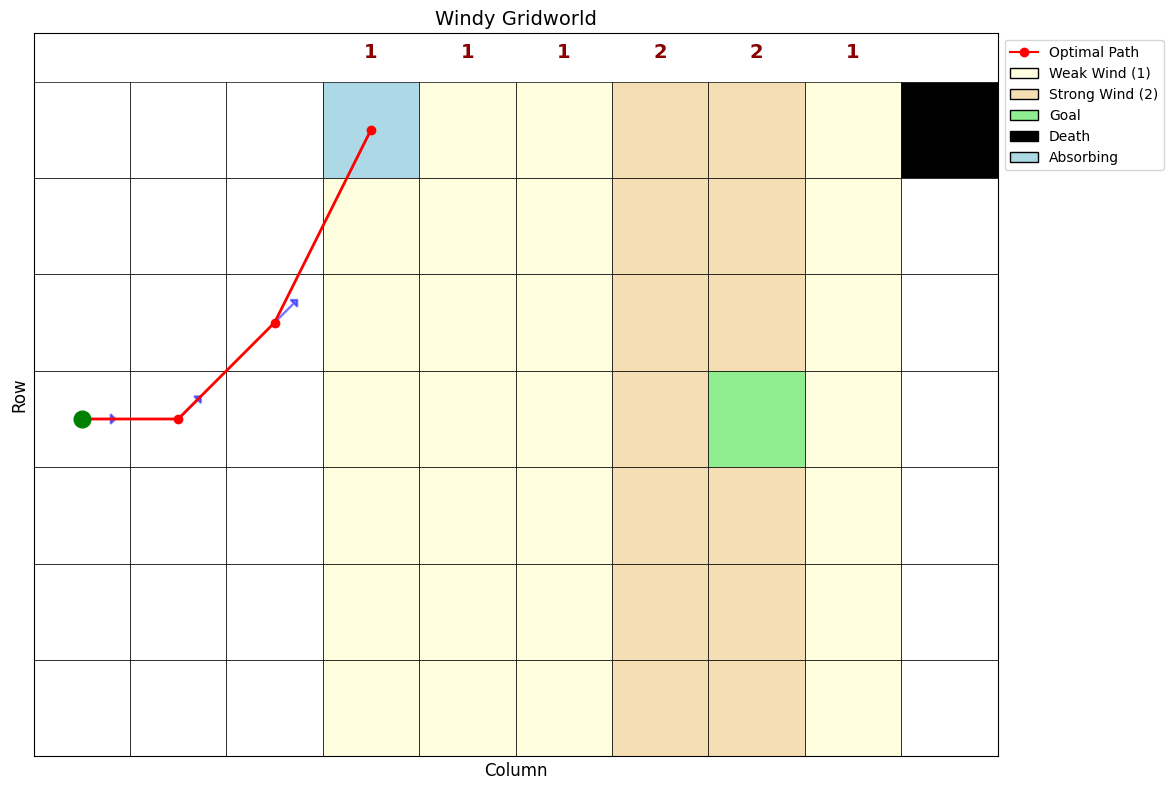


Ëµ∑Âßã‰ΩçÁΩÆ: (0, 6)

ËøêË°å SARSA (8Âêë + Âê∏Êî∂Áä∂ÊÄÅ)...
SARSA Ë∑ØÂæÑÈïøÂ∫¶: 3 Ê≠•
Ë∑ØÂæÑ: [(0, 6), (0, 5), (0, 4), (0, 3)]
Á¥ØÁßØÂ•ñÂä±: 2

ËøêË°å Q-Learning (8Âêë + Âê∏Êî∂Áä∂ÊÄÅ)...
Q-Learning Ë∑ØÂæÑÈïøÂ∫¶: 3 Ê≠•
Ë∑ØÂæÑ: [(0, 6), (0, 5), (0, 4), (0, 3)]
Á¥ØÁßØÂ•ñÂä±: 2

------------------------------------------------------------
ÂØπÊØîÂàÜÊûê:
------------------------------------------------------------
Ë∑ØÂæÑÈïøÂ∫¶ÊòØÂê¶‰∏ÄËá¥: ÊòØ
  SARSA: 3 Ê≠•ÔºåÁ¥ØÁßØÂ•ñÂä±: 2
  Q-Learning: 3 Ê≠•ÔºåÁ¥ØÁßØÂ•ñÂä±: 2

ÁªàÁÇπÁä∂ÊÄÅ:
  SARSAÁªàÁÇπ: (0, 3)
    Âà∞ËææÂê∏Êî∂Áä∂ÊÄÅ(0,3)ÔºåËé∑ÂæóÂ•ñÂä±+5
  Q-LearningÁªàÁÇπ: (0, 3)
    Âà∞ËææÂê∏Êî∂Áä∂ÊÄÅ(0,3)ÔºåËé∑ÂæóÂ•ñÂä±+5

ÁªòÂà∂Â≠¶‰π†Êõ≤Á∫ø...


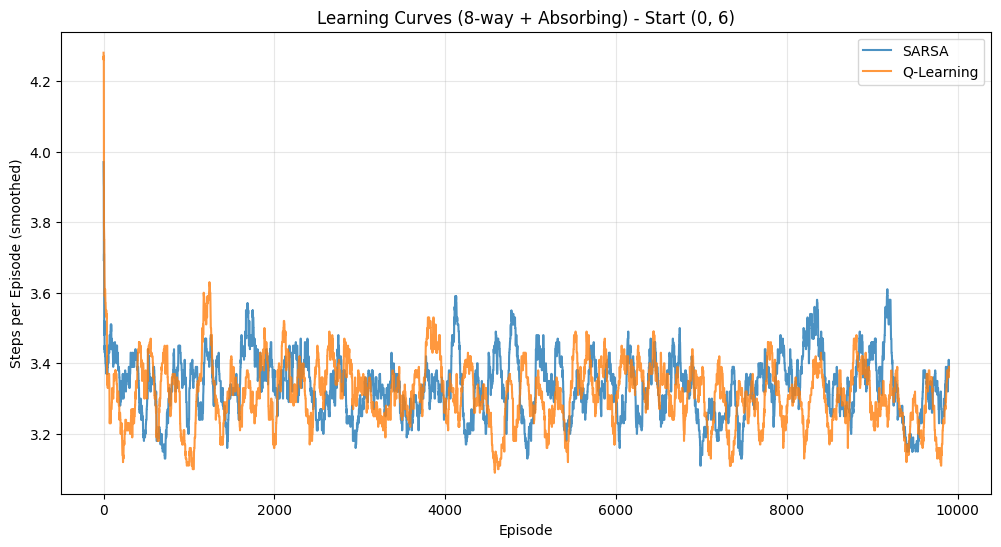


ÁîüÊàêÁ≠ñÁï•ÂèØËßÜÂåñ...
SARSA Á≠ñÁï•:


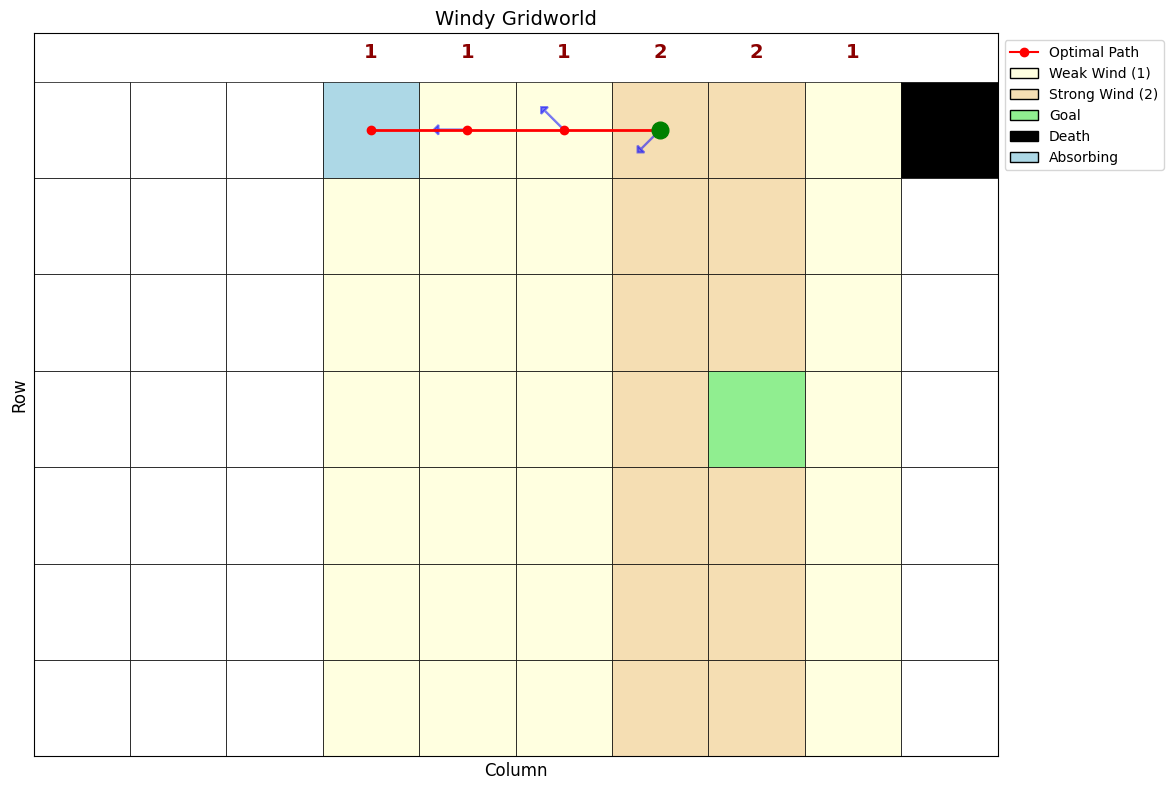

Q-Learning Á≠ñÁï•:


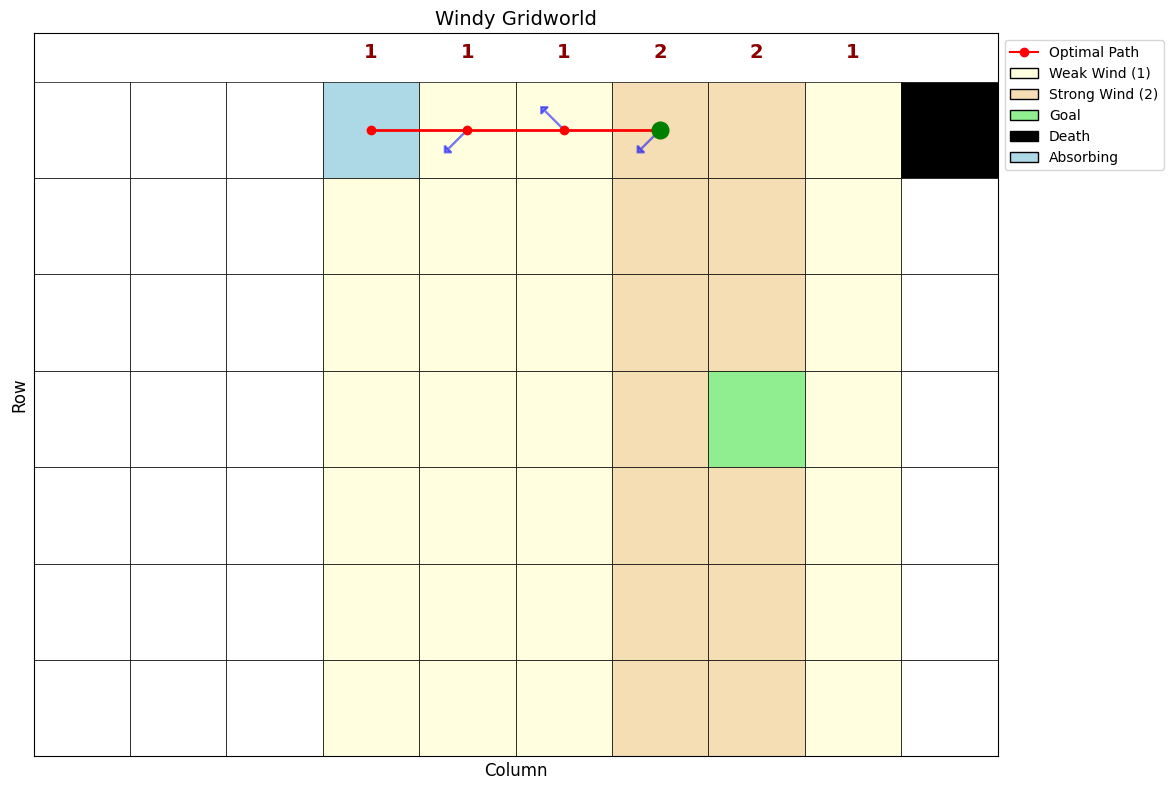


‰ªªÂä°7.2: 4ÂêëÁßªÂä®ÔºàRook Moves + Âê∏Êî∂Áä∂ÊÄÅÔºâ

Ëµ∑Âßã‰ΩçÁΩÆ: (6, 0)

ËøêË°å SARSA (4Âêë + Âê∏Êî∂Áä∂ÊÄÅ)...
SARSA Ë∑ØÂæÑÈïøÂ∫¶: 6 Ê≠•
Ë∑ØÂæÑ: [(6, 0), (6, 1), (6, 2), (5, 2), (4, 3), (2, 3), (0, 3)]

ËøêË°å Q-Learning (4Âêë + Âê∏Êî∂Áä∂ÊÄÅ)...
Q-Learning Ë∑ØÂæÑÈïøÂ∫¶: 6 Ê≠•
Q-Learning Ë∑ØÂæÑ: [(6, 0), (6, 1), (6, 2), (5, 2), (4, 3), (2, 3), (0, 3)]

------------------------------------------------------------
ÂØπÊØîÂàÜÊûê:
------------------------------------------------------------
Ë∑ØÂæÑÈïøÂ∫¶ÊòØÂê¶‰∏ÄËá¥: ÊòØ
  SARSA: 6 Ê≠•
  Q-Learning: 6 Ê≠•

ÁªàÁÇπÁä∂ÊÄÅ:
  SARSAÁªàÁÇπ: (0, 3)
    Âà∞ËææÂê∏Êî∂Áä∂ÊÄÅ(0,3)ÔºåËé∑ÂæóÂ•ñÂä±+5
  Q-LearningÁªàÁÇπ: (0, 3)
    Âà∞ËææÂê∏Êî∂Áä∂ÊÄÅ(0,3)ÔºåËé∑ÂæóÂ•ñÂä±+5

ÁªòÂà∂Â≠¶‰π†Êõ≤Á∫ø...


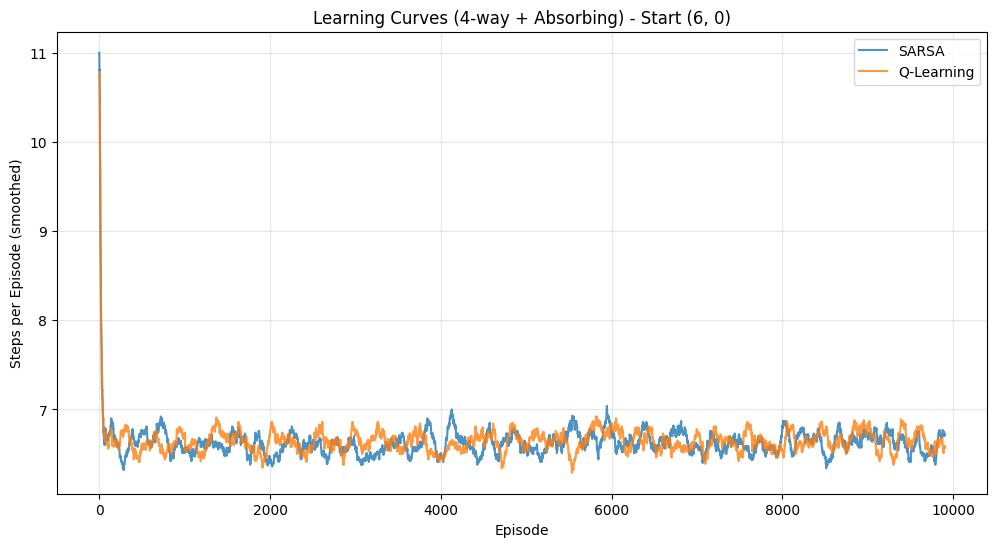


ÁîüÊàêÁ≠ñÁï•ÂèØËßÜÂåñ...
SARSA Á≠ñÁï•:


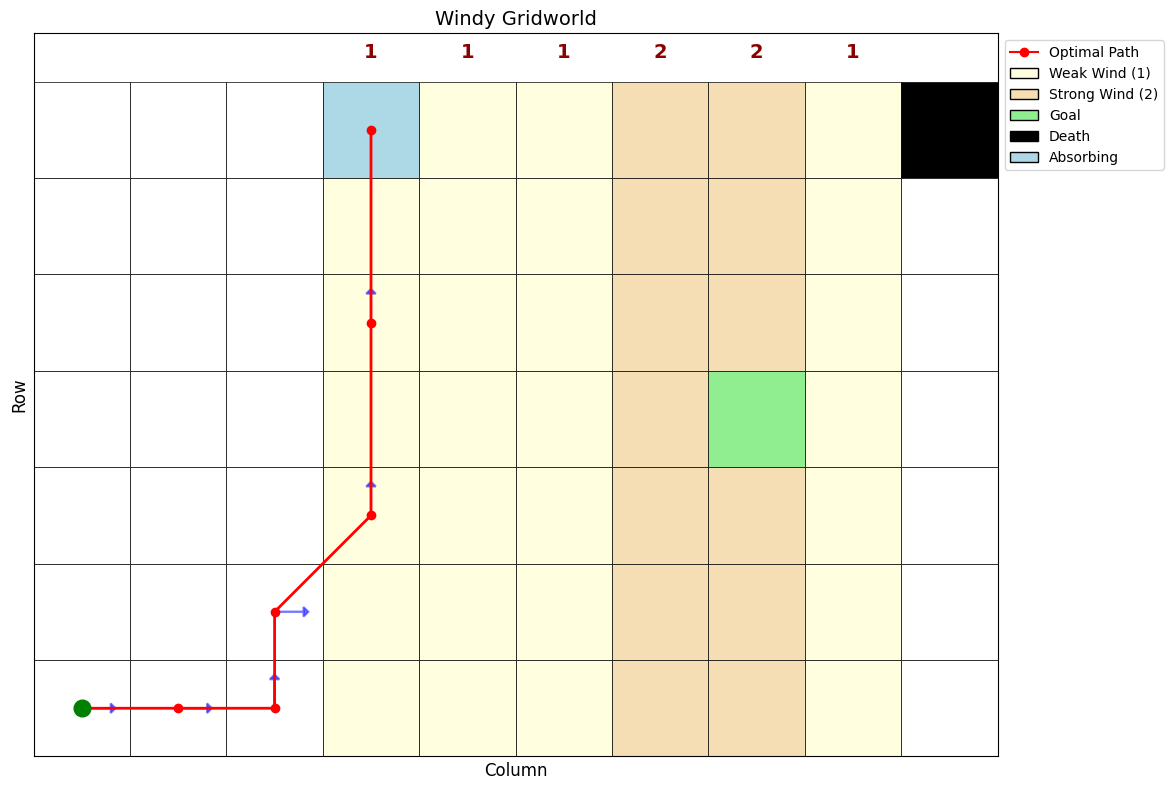

Q-Learning Á≠ñÁï•:


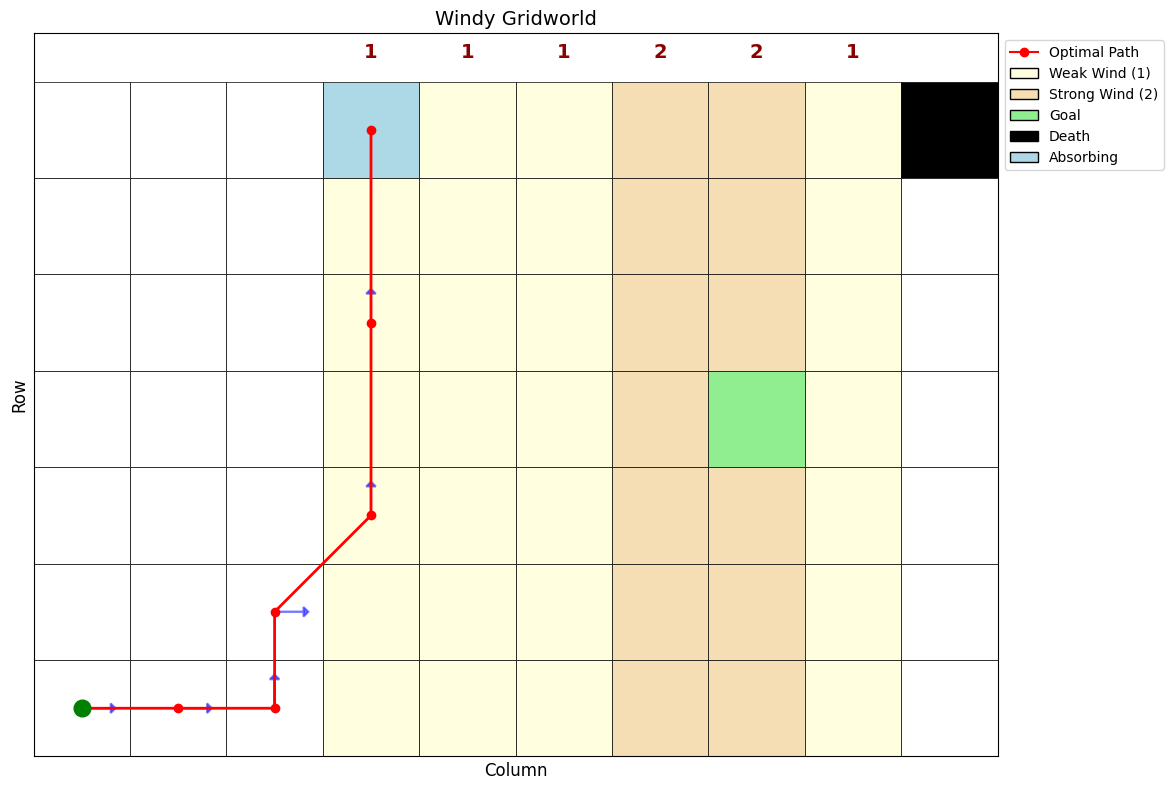


Ëµ∑Âßã‰ΩçÁΩÆ: (3, 0)

ËøêË°å SARSA (4Âêë + Âê∏Êî∂Áä∂ÊÄÅ)...
SARSA Ë∑ØÂæÑÈïøÂ∫¶: 4 Ê≠•
Ë∑ØÂæÑ: [(3, 0), (3, 1), (3, 2), (2, 3), (0, 3)]

ËøêË°å Q-Learning (4Âêë + Âê∏Êî∂Áä∂ÊÄÅ)...
Q-Learning Ë∑ØÂæÑÈïøÂ∫¶: 4 Ê≠•
Q-Learning Ë∑ØÂæÑ: [(3, 0), (3, 1), (3, 2), (2, 3), (0, 3)]

------------------------------------------------------------
ÂØπÊØîÂàÜÊûê:
------------------------------------------------------------
Ë∑ØÂæÑÈïøÂ∫¶ÊòØÂê¶‰∏ÄËá¥: ÊòØ
  SARSA: 4 Ê≠•
  Q-Learning: 4 Ê≠•

ÁªàÁÇπÁä∂ÊÄÅ:
  SARSAÁªàÁÇπ: (0, 3)
    Âà∞ËææÂê∏Êî∂Áä∂ÊÄÅ(0,3)ÔºåËé∑ÂæóÂ•ñÂä±+5
  Q-LearningÁªàÁÇπ: (0, 3)
    Âà∞ËææÂê∏Êî∂Áä∂ÊÄÅ(0,3)ÔºåËé∑ÂæóÂ•ñÂä±+5

ÁªòÂà∂Â≠¶‰π†Êõ≤Á∫ø...


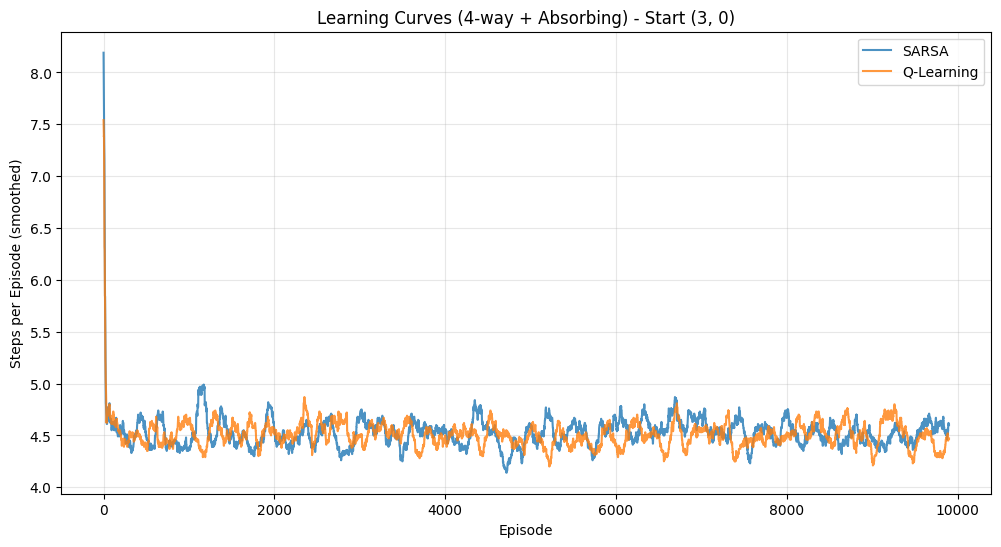


ÁîüÊàêÁ≠ñÁï•ÂèØËßÜÂåñ...
SARSA Á≠ñÁï•:


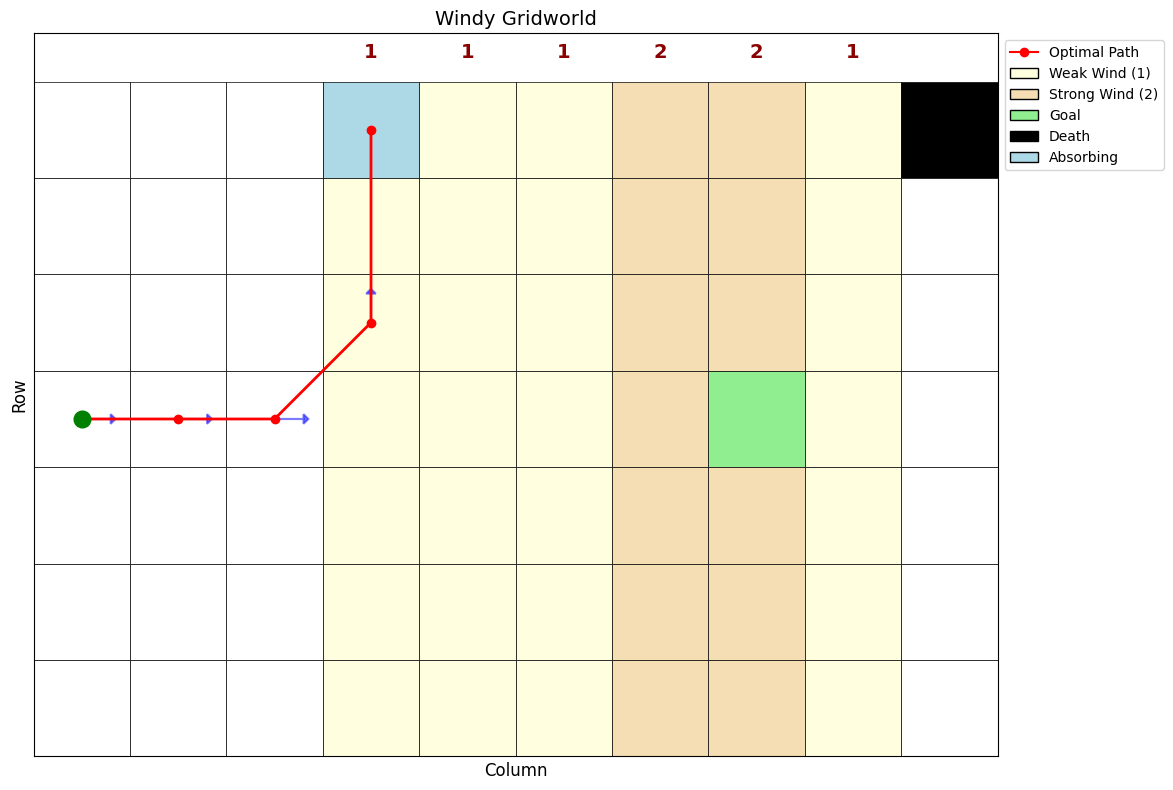

Q-Learning Á≠ñÁï•:


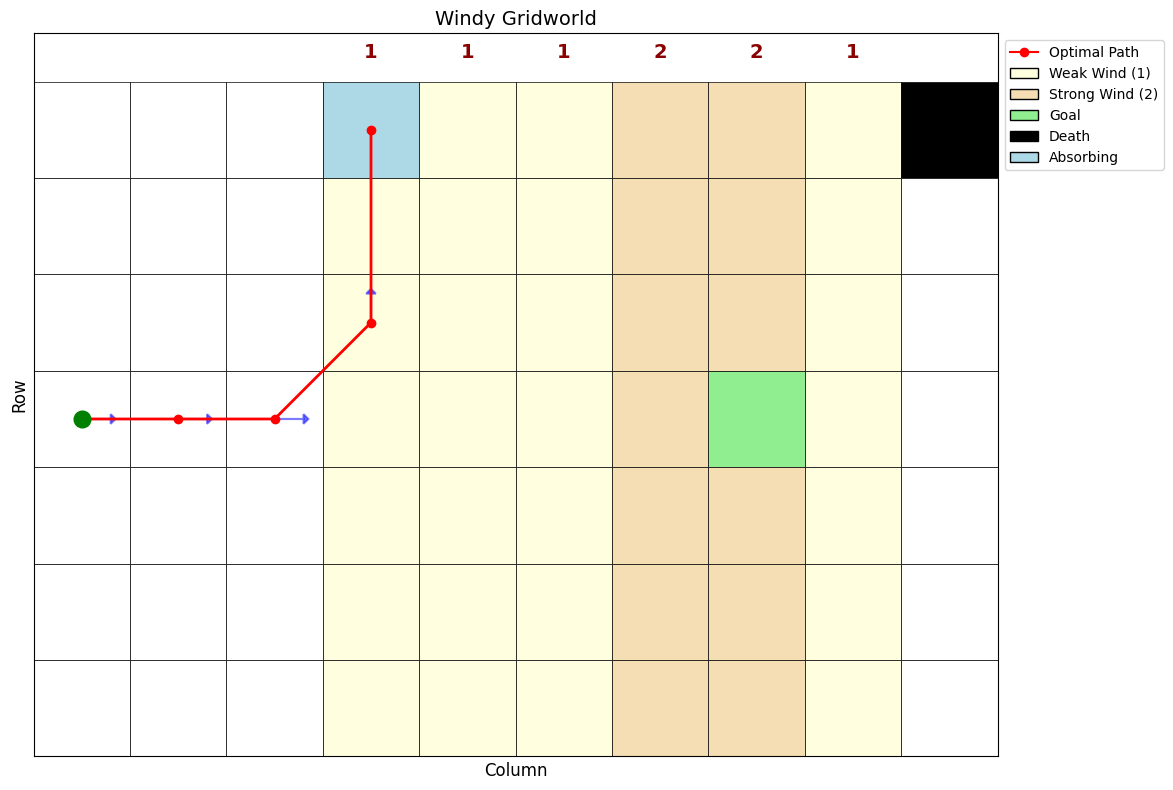


Ëµ∑Âßã‰ΩçÁΩÆ: (0, 6)

ËøêË°å SARSA (4Âêë + Âê∏Êî∂Áä∂ÊÄÅ)...
SARSA Ë∑ØÂæÑÈïøÂ∫¶: 3 Ê≠•
Ë∑ØÂæÑ: [(0, 6), (0, 5), (0, 4), (0, 3)]

ËøêË°å Q-Learning (4Âêë + Âê∏Êî∂Áä∂ÊÄÅ)...
Q-Learning Ë∑ØÂæÑÈïøÂ∫¶: 3 Ê≠•
Q-Learning Ë∑ØÂæÑ: [(0, 6), (0, 5), (0, 4), (0, 3)]

------------------------------------------------------------
ÂØπÊØîÂàÜÊûê:
------------------------------------------------------------
Ë∑ØÂæÑÈïøÂ∫¶ÊòØÂê¶‰∏ÄËá¥: ÊòØ
  SARSA: 3 Ê≠•
  Q-Learning: 3 Ê≠•

ÁªàÁÇπÁä∂ÊÄÅ:
  SARSAÁªàÁÇπ: (0, 3)
    Âà∞ËææÂê∏Êî∂Áä∂ÊÄÅ(0,3)ÔºåËé∑ÂæóÂ•ñÂä±+5
  Q-LearningÁªàÁÇπ: (0, 3)
    Âà∞ËææÂê∏Êî∂Áä∂ÊÄÅ(0,3)ÔºåËé∑ÂæóÂ•ñÂä±+5

ÁªòÂà∂Â≠¶‰π†Êõ≤Á∫ø...


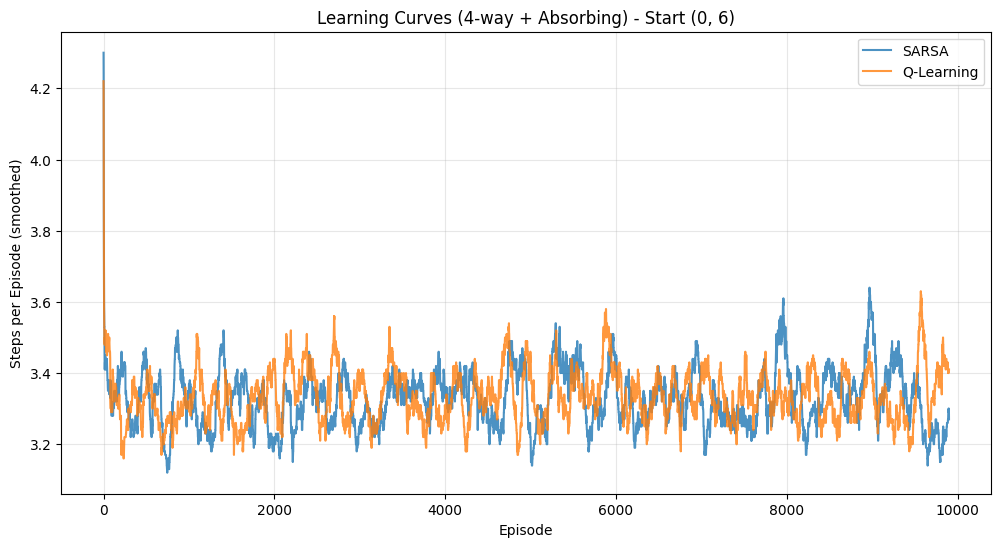


ÁîüÊàêÁ≠ñÁï•ÂèØËßÜÂåñ...
SARSA Á≠ñÁï•:


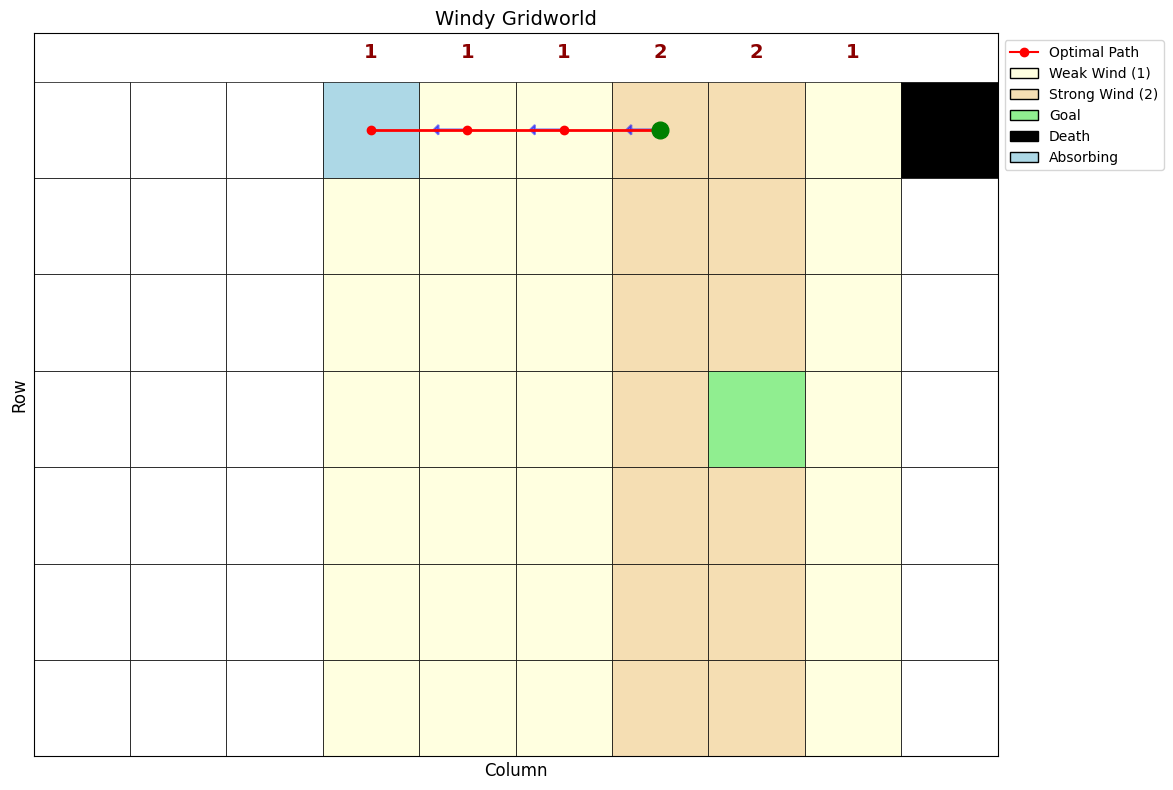

Q-Learning Á≠ñÁï•:


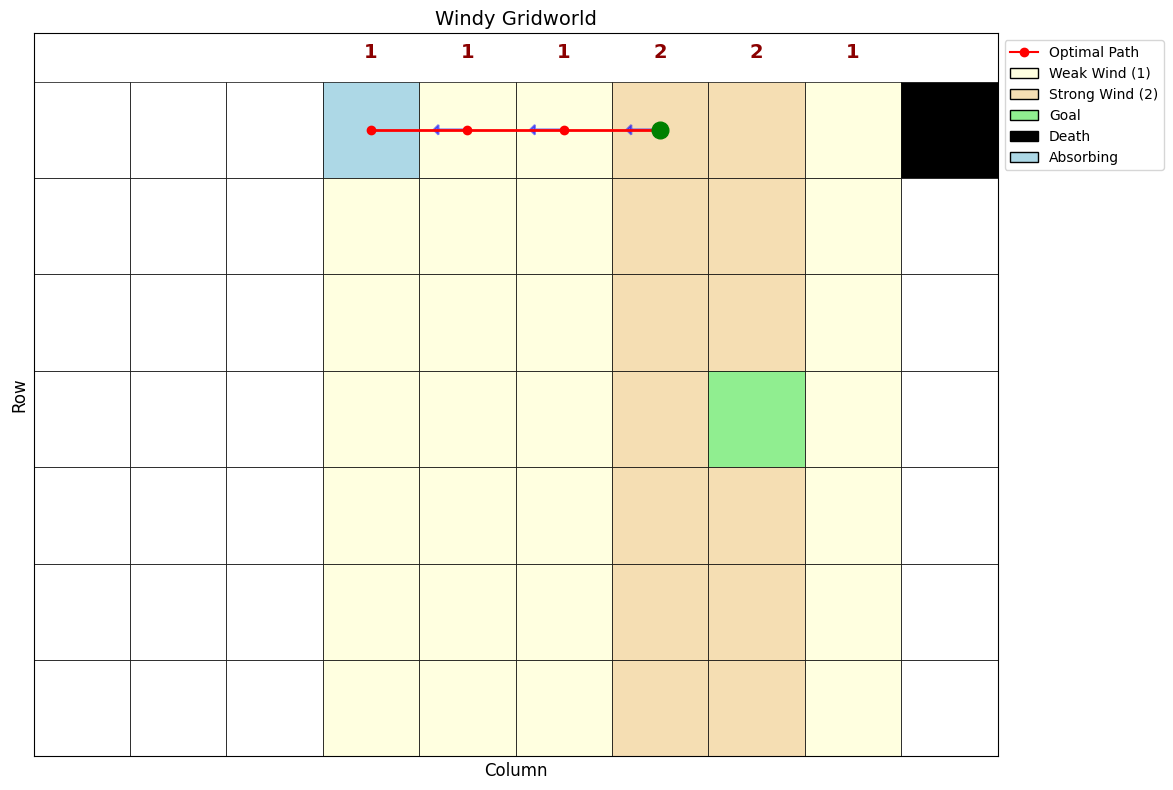

In [12]:
# ÂàõÂª∫Â∏¶Âê∏Êî∂Áä∂ÊÄÅÁöÑÁéØÂ¢ÉÔºàÂê∏Êî∂Áä∂ÊÄÅÂùêÊ†á‰∏∫(0,3)Ôºâ
env_absorbing_king = WindyGridworld(king_moves=True, absorbing_state=(0, 3))
env_absorbing_rook = WindyGridworld(king_moves=False, absorbing_state=(0, 3))

print("=" * 60)
print("‰ªªÂä°7.1: SARSAÂíåQ-LearningÔºà8ÂêëÁßªÂä® + Âê∏Êî∂Áä∂ÊÄÅÔºâ")
print("=" * 60)

for start in start_states:
    print(f"\n{'='*60}")
    print(f"Ëµ∑Âßã‰ΩçÁΩÆ: {start}")
    print(f"{'='*60}")
    
    # SARSA
    print("\nËøêË°å SARSA (8Âêë + Âê∏Êî∂Áä∂ÊÄÅ)...")
    Q_sarsa_abs, steps_sarsa_abs = sarsa(env_absorbing_king, start, episodes=10000, alpha=0.1, epsilon=0.1)
    policy_sarsa_abs = get_optimal_policy(Q_sarsa_abs, env_absorbing_king)
    path_sarsa_abs = get_optimal_path(policy_sarsa_abs, env_absorbing_king, start)
    print(f"SARSA Ë∑ØÂæÑÈïøÂ∫¶: {len(path_sarsa_abs)-1} Ê≠•")
    print(f"Ë∑ØÂæÑ: {path_sarsa_abs}")
    
    # ËÆ°ÁÆóÁ¥ØÁßØÂ•ñÂä±
    total_reward_sarsa = (len(path_sarsa_abs)-1) * (-1)
    if path_sarsa_abs[-1] == env_absorbing_king.goal_state:
        total_reward_sarsa += 10
    elif path_sarsa_abs[-1] == env_absorbing_king.absorbing_state:
        total_reward_sarsa += 5
    print(f"Á¥ØÁßØÂ•ñÂä±: {total_reward_sarsa}")
    
    # Q-Learning
    print("\nËøêË°å Q-Learning (8Âêë + Âê∏Êî∂Áä∂ÊÄÅ)...")
    Q_qlearn_abs, steps_qlearn_abs = q_learning(env_absorbing_king, start, episodes=10000, alpha=0.1, epsilon=0.1)
    policy_qlearn_abs = get_optimal_policy(Q_qlearn_abs, env_absorbing_king)
    path_qlearn_abs = get_optimal_path(policy_qlearn_abs, env_absorbing_king, start)
    print(f"Q-Learning Ë∑ØÂæÑÈïøÂ∫¶: {len(path_qlearn_abs)-1} Ê≠•")
    print(f"Ë∑ØÂæÑ: {path_qlearn_abs}")
    
    # ËÆ°ÁÆóÁ¥ØÁßØÂ•ñÂä±
    total_reward_qlearn = (len(path_qlearn_abs)-1) * (-1)
    if path_qlearn_abs[-1] == env_absorbing_king.goal_state:
        total_reward_qlearn += 10
    elif path_qlearn_abs[-1] == env_absorbing_king.absorbing_state:
        total_reward_qlearn += 5
    print(f"Á¥ØÁßØÂ•ñÂä±: {total_reward_qlearn}")
    
    # ÂØπÊØîÂàÜÊûê
    print("\n" + "-"*60)
    print("ÂØπÊØîÂàÜÊûê:")
    print("-"*60)
    print(f"Ë∑ØÂæÑÈïøÂ∫¶ÊòØÂê¶‰∏ÄËá¥: {'ÊòØ' if len(path_sarsa_abs) == len(path_qlearn_abs) else 'Âê¶'}")
    print(f"  SARSA: {len(path_sarsa_abs)-1} Ê≠•ÔºåÁ¥ØÁßØÂ•ñÂä±: {total_reward_sarsa}")
    print(f"  Q-Learning: {len(path_qlearn_abs)-1} Ê≠•ÔºåÁ¥ØÁßØÂ•ñÂä±: {total_reward_qlearn}")
    
    # Ê£ÄÊü•ÁªàÁÇπÁä∂ÊÄÅ
    print(f"\nÁªàÁÇπÁä∂ÊÄÅ:")
    print(f"  SARSAÁªàÁÇπ: {path_sarsa_abs[-1]}")
    if path_sarsa_abs[-1] == env_absorbing_king.goal_state:
        print(f"    Âà∞ËææÁõÆÊ†áÁä∂ÊÄÅ(3,7)ÔºåËé∑ÂæóÂ•ñÂä±+10")
    elif path_sarsa_abs[-1] == env_absorbing_king.absorbing_state:
        print(f"    Âà∞ËææÂê∏Êî∂Áä∂ÊÄÅ(0,3)ÔºåËé∑ÂæóÂ•ñÂä±+5")
    
    print(f"  Q-LearningÁªàÁÇπ: {path_qlearn_abs[-1]}")
    if path_qlearn_abs[-1] == env_absorbing_king.goal_state:
        print(f"    Âà∞ËææÁõÆÊ†áÁä∂ÊÄÅ(3,7)ÔºåËé∑ÂæóÂ•ñÂä±+10")
    elif path_qlearn_abs[-1] == env_absorbing_king.absorbing_state:
        print(f"    Âà∞ËææÂê∏Êî∂Áä∂ÊÄÅ(0,3)ÔºåËé∑ÂæóÂ•ñÂä±+5")
    
    # ÁªòÂà∂Â≠¶‰π†Êõ≤Á∫ø
    print("\nÁªòÂà∂Â≠¶‰π†Êõ≤Á∫ø...")
    plot_learning_curve([steps_sarsa_abs, steps_qlearn_abs], 
                       f'Learning Curves (8-way + Absorbing) - Start {start}',
                       ['SARSA', 'Q-Learning'])
    
    # ÂèØËßÜÂåñ
    print("\nÁîüÊàêÁ≠ñÁï•ÂèØËßÜÂåñ...")
    print("SARSA Á≠ñÁï•:")
    visualize_gridworld(env_absorbing_king, path=path_sarsa_abs, policy=policy_sarsa_abs)
    print("Q-Learning Á≠ñÁï•:")
    visualize_gridworld(env_absorbing_king, path=path_qlearn_abs, policy=policy_qlearn_abs)

# ‰ªªÂä°7.2: 4ÂêëÁßªÂä® + Âê∏Êî∂Áä∂ÊÄÅ
print("\n" + "="*60)
print("‰ªªÂä°7.2: 4ÂêëÁßªÂä®ÔºàRook Moves + Âê∏Êî∂Áä∂ÊÄÅÔºâ")
print("="*60)

for start in start_states:
    print(f"\n{'='*60}")
    print(f"Ëµ∑Âßã‰ΩçÁΩÆ: {start}")
    print(f"{'='*60}")
    
    # SARSA
    print("\nËøêË°å SARSA (4Âêë + Âê∏Êî∂Áä∂ÊÄÅ)...")
    Q_sarsa_abs_rook, steps_sarsa_abs_rook = sarsa(env_absorbing_rook, start, episodes=10000, alpha=0.1, epsilon=0.1)
    policy_sarsa_abs_rook = get_optimal_policy(Q_sarsa_abs_rook, env_absorbing_rook)
    path_sarsa_abs_rook = get_optimal_path(policy_sarsa_abs_rook, env_absorbing_rook, start)
    print(f"SARSA Ë∑ØÂæÑÈïøÂ∫¶: {len(path_sarsa_abs_rook)-1} Ê≠•")
    print(f"Ë∑ØÂæÑ: {path_sarsa_abs_rook}")
    
    # Q-Learning
    print("\nËøêË°å Q-Learning (4Âêë + Âê∏Êî∂Áä∂ÊÄÅ)...")
    Q_qlearn_abs_rook, steps_qlearn_abs_rook = q_learning(env_absorbing_rook, start, episodes=10000, alpha=0.1, epsilon=0.1)
    policy_qlearn_abs_rook = get_optimal_policy(Q_qlearn_abs_rook, env_absorbing_rook)
    path_qlearn_abs_rook = get_optimal_path(policy_qlearn_abs_rook, env_absorbing_rook, start)
    print(f"Q-Learning Ë∑ØÂæÑÈïøÂ∫¶: {len(path_qlearn_abs_rook)-1} Ê≠•")
    print(f"Q-Learning Ë∑ØÂæÑ: {path_qlearn_abs_rook}")
    
    # ÂØπÊØîÂàÜÊûê
    print("\n" + "-"*60)
    print("ÂØπÊØîÂàÜÊûê:")
    print("-"*60)
    print(f"Ë∑ØÂæÑÈïøÂ∫¶ÊòØÂê¶‰∏ÄËá¥: {'ÊòØ' if len(path_sarsa_abs_rook) == len(path_qlearn_abs_rook) else 'Âê¶'}")
    print(f"  SARSA: {len(path_sarsa_abs_rook)-1} Ê≠•")
    print(f"  Q-Learning: {len(path_qlearn_abs_rook)-1} Ê≠•")
    
    # Ê£ÄÊü•ÁªàÁÇπÁä∂ÊÄÅ
    print(f"\nÁªàÁÇπÁä∂ÊÄÅ:")
    print(f"  SARSAÁªàÁÇπ: {path_sarsa_abs_rook[-1]}")
    if path_sarsa_abs_rook[-1] == env_absorbing_rook.goal_state:
        print(f"    Âà∞ËææÁõÆÊ†áÁä∂ÊÄÅ(3,7)ÔºåËé∑ÂæóÂ•ñÂä±+10")
    elif path_sarsa_abs_rook[-1] == env_absorbing_rook.absorbing_state:
        print(f"    Âà∞ËææÂê∏Êî∂Áä∂ÊÄÅ(0,3)ÔºåËé∑ÂæóÂ•ñÂä±+5")
    
    print(f"  Q-LearningÁªàÁÇπ: {path_qlearn_abs_rook[-1]}")
    if path_qlearn_abs_rook[-1] == env_absorbing_rook.goal_state:
        print(f"    Âà∞ËææÁõÆÊ†áÁä∂ÊÄÅ(3,7)ÔºåËé∑ÂæóÂ•ñÂä±+10")
    elif path_qlearn_abs_rook[-1] == env_absorbing_rook.absorbing_state:
        print(f"    Âà∞ËææÂê∏Êî∂Áä∂ÊÄÅ(0,3)ÔºåËé∑ÂæóÂ•ñÂä±+5")
    
    # ÁªòÂà∂Â≠¶‰π†Êõ≤Á∫ø
    print("\nÁªòÂà∂Â≠¶‰π†Êõ≤Á∫ø...")
    plot_learning_curve([steps_sarsa_abs_rook, steps_qlearn_abs_rook], 
                       f'Learning Curves (4-way + Absorbing) - Start {start}',
                       ['SARSA', 'Q-Learning'])
    
    # ÂèØËßÜÂåñ
    print("\nÁîüÊàêÁ≠ñÁï•ÂèØËßÜÂåñ...")
    print("SARSA Á≠ñÁï•:")
    visualize_gridworld(env_absorbing_rook, path=path_sarsa_abs_rook, policy=policy_sarsa_abs_rook)
    print("Q-Learning Á≠ñÁï•:")
    visualize_gridworld(env_absorbing_rook, path=path_qlearn_abs_rook, policy=policy_qlearn_abs_rook)

### ‰ªªÂä°7.3: LLMÁÆóÊ≥ïÈÄâÊã©ÔºàÂê∏Êî∂ÊÄÅÔºâ


‰ªªÂä°7.3: LLMÁÆóÊ≥ïÈÄâÊã©(Âê∏Êî∂ÊÄÅ)

„ÄêÊàëÁöÑÈÄâÊã©ÔºöSARSA„Äë
  ÁêÜÁî±ÔºöÂª∂Áª≠Âü∫Á°ÄÁéØÂ¢ÉÈÄâÊã©ÔºåSARSAÊõ¥Á®≥ÂÆö
SARSA: 4Ê≠•, ÁªàÁÇπ(0, 3)
Q-Learning: 4Ê≠•, ÁªàÁÇπ(0, 3)


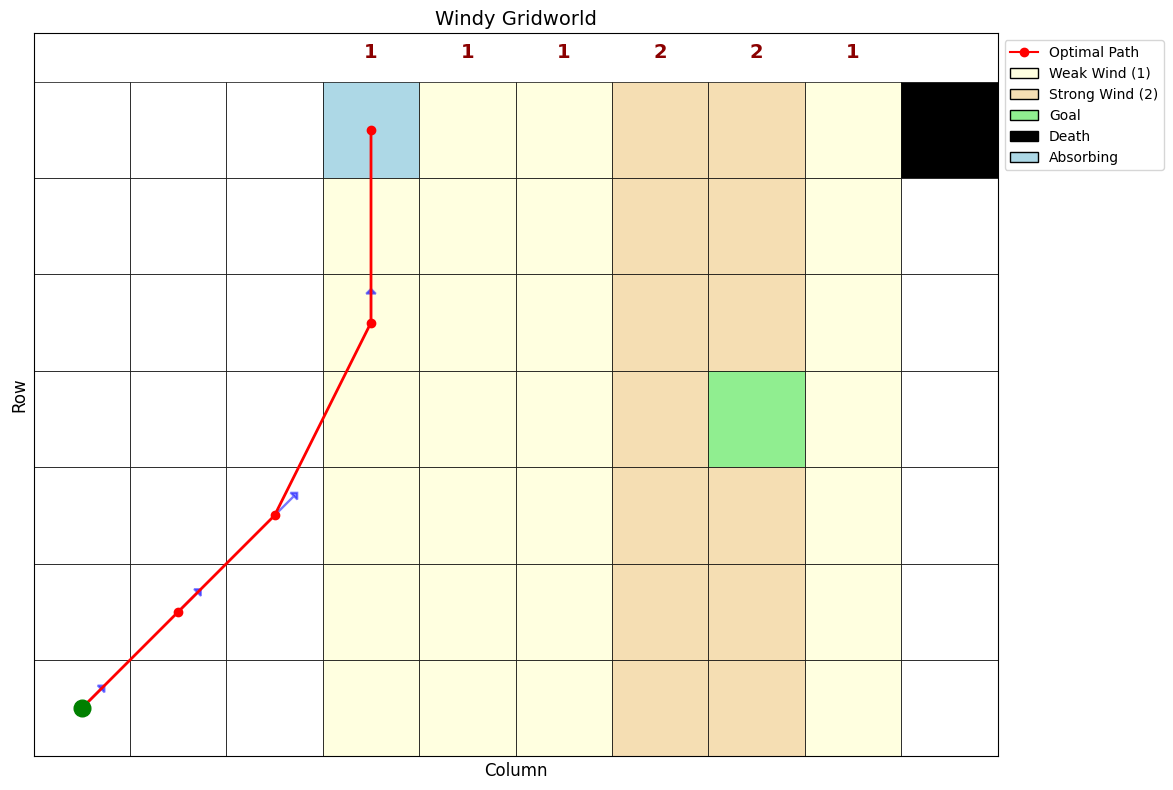

In [13]:
print("="*60)
print("‰ªªÂä°7.3: LLMÁÆóÊ≥ïÈÄâÊã©(Âê∏Êî∂ÊÄÅ)")
print("="*60)
print()
print("„ÄêÊàëÁöÑÈÄâÊã©ÔºöSARSA„Äë")
print("  ÁêÜÁî±ÔºöÂª∂Áª≠Âü∫Á°ÄÁéØÂ¢ÉÈÄâÊã©ÔºåSARSAÊõ¥Á®≥ÂÆö")
start = (6, 0)
Q_s, _ = sarsa(env_absorbing_king, start, episodes=10000, alpha=0.1, epsilon=0.1)
policy_s = get_optimal_policy(Q_s, env_absorbing_king)
path_s = get_optimal_path(policy_s, env_absorbing_king, start)
print(f"SARSA: {len(path_s)-1}Ê≠•, ÁªàÁÇπ{path_s[-1]}")
Q_q, _ = q_learning(env_absorbing_king, start, episodes=10000, alpha=0.1, epsilon=0.1)
policy_q = get_optimal_policy(Q_q, env_absorbing_king)
path_q = get_optimal_path(policy_q, env_absorbing_king, start)
print(f"Q-Learning: {len(path_q)-1}Ê≠•, ÁªàÁÇπ{path_q[-1]}")
if path_s[-1] == (3,7):
    print("‚úì SARSAÂà∞ËææÁõÆÊ†á")
visualize_gridworld(env_absorbing_king, path=path_s, policy=policy_s, show_all_policy=False)
print("="*60)

### ‰ªªÂä°7.4: LLMÁÆóÊ≥ïÂØπÊØîÔºàÂê∏Êî∂ÊÄÅÔºâ


‰ªªÂä°7.4: ÁÆóÊ≥ïÂØπÊØî(Âê∏Êî∂ÊÄÅ)

SARSAÁªàÁÇπ: (0, 3)
Q-LearningÁªàÁÇπ: (0, 3)


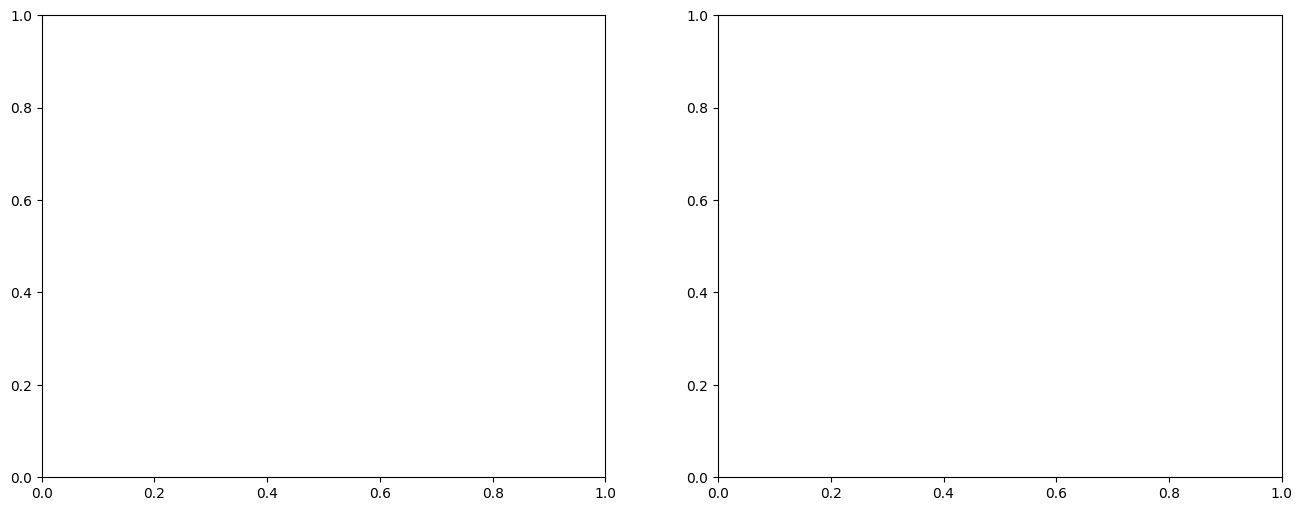

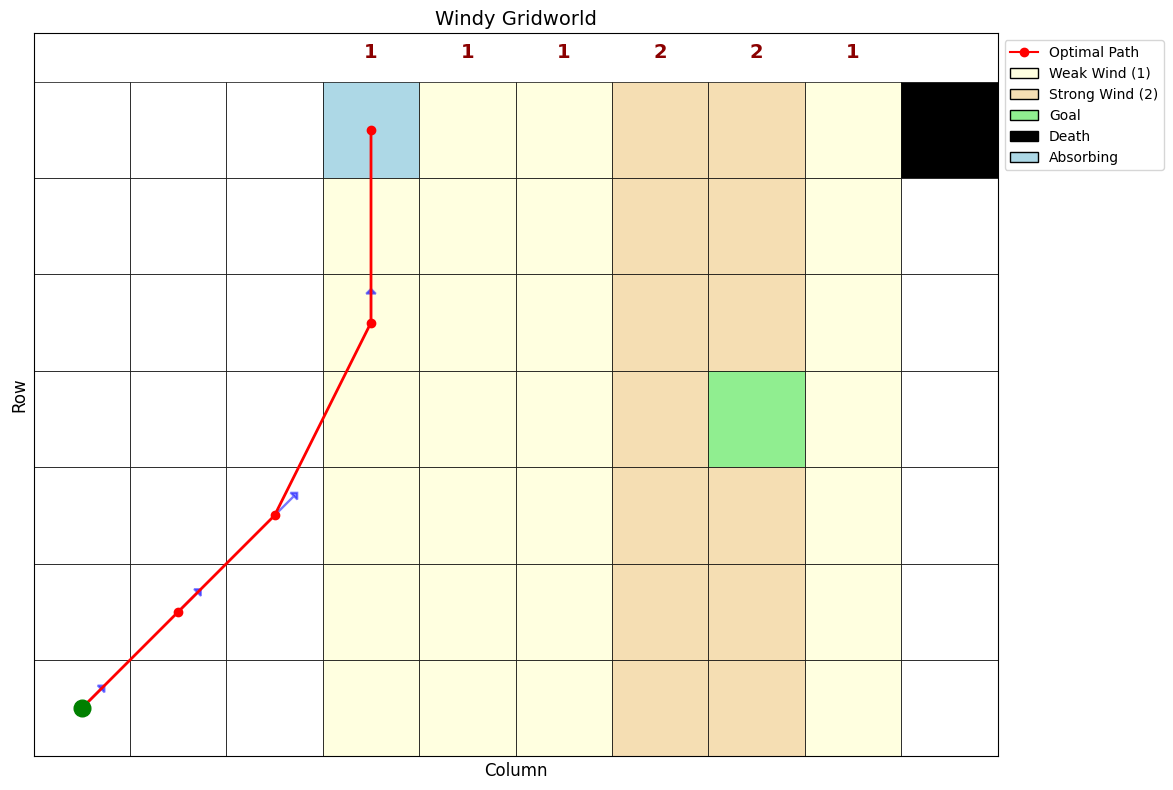

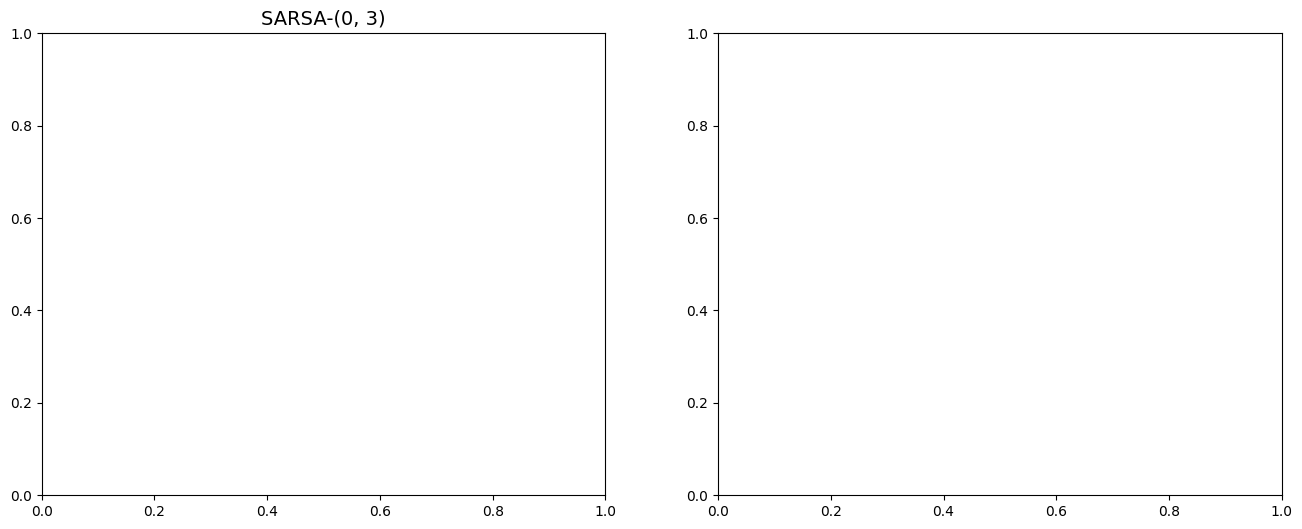

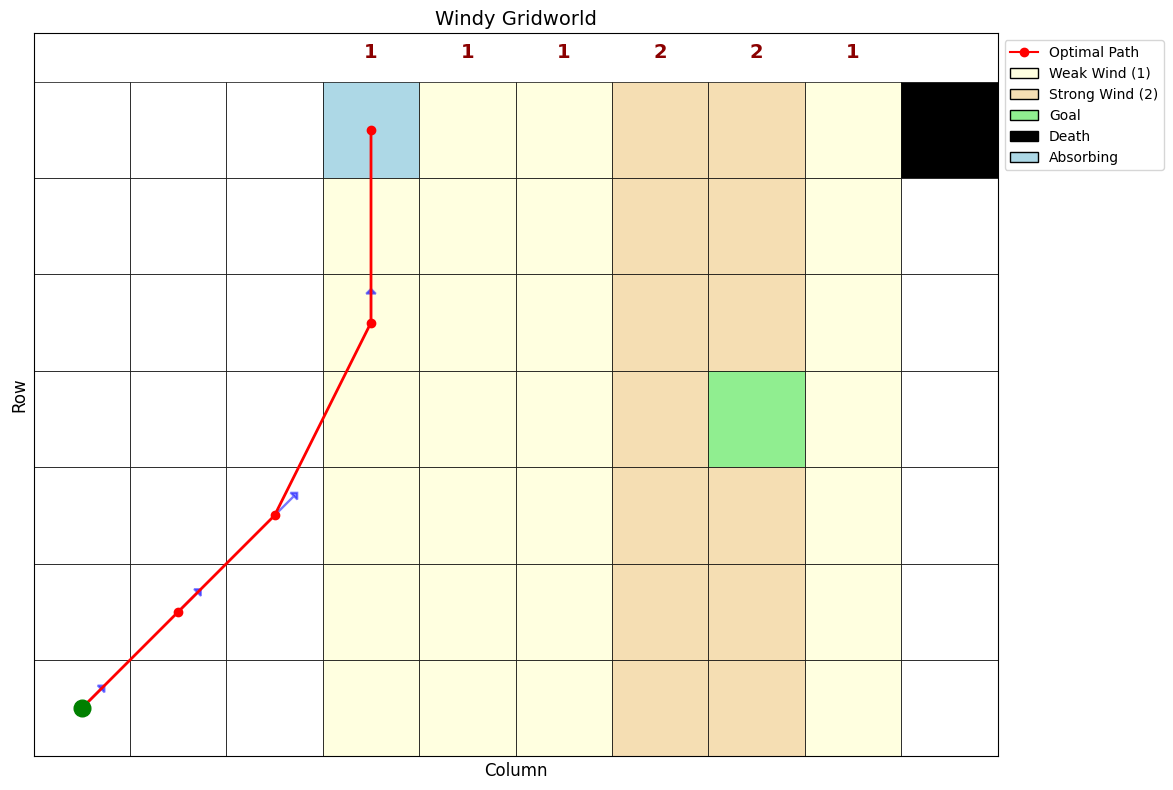

<Figure size 640x480 with 0 Axes>

In [14]:
print("="*60)
print("‰ªªÂä°7.4: ÁÆóÊ≥ïÂØπÊØî(Âê∏Êî∂ÊÄÅ)")
print("="*60)
print()
start = (6, 0)
Q_s, _ = sarsa(env_absorbing_king, start, episodes=10000, alpha=0.1, epsilon=0.1)
policy_s = get_optimal_policy(Q_s, env_absorbing_king)
path_s = get_optimal_path(policy_s, env_absorbing_king, start)
print(f"SARSAÁªàÁÇπ: {path_s[-1]}")
Q_q, _ = q_learning(env_absorbing_king, start, episodes=10000, alpha=0.1, epsilon=0.1)
policy_q = get_optimal_policy(Q_q, env_absorbing_king)
path_q = get_optimal_path(policy_q, env_absorbing_king, start)
print(f"Q-LearningÁªàÁÇπ: {path_q[-1]}")
if path_s[-1] == path_q[-1] == (3,7):
    print("‚úì ÈÉΩÂà∞ËææÁõÆÊ†á")
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
plt.sca(axes[0])
visualize_gridworld(env_absorbing_king, path=path_s, policy=policy_s, show_all_policy=False)
axes[0].set_title(f"SARSA-{path_s[-1]}", fontsize=14)
plt.sca(axes[1])
visualize_gridworld(env_absorbing_king, path=path_q, policy=policy_q, show_all_policy=False)
axes[1].set_title(f"Q-Learning-{path_q[-1]}", fontsize=14)
plt.tight_layout()
plt.show()
print("="*60)

### ‰ªªÂä°7.5: LLMÁ∫ØÊé®ÁêÜÔºàÂê∏Êî∂ÊÄÅÔºâ


‰ªªÂä°7.5: Á∫ØÊé®ÁêÜ(Âê∏Êî∂ÊÄÅ)

„ÄêÊàëÁöÑÊé®ÁêÜ„ÄëÂ∫îÂéªÁõÆÊ†á(+10)ËÄåÈùûÂê∏Êî∂(+5)
  Êé®ÁêÜ: 10Ê≠•Âà∞ÁõÆÊ†á
  ÂÆûÈôÖ: 4Ê≠•Âà∞(0, 3)


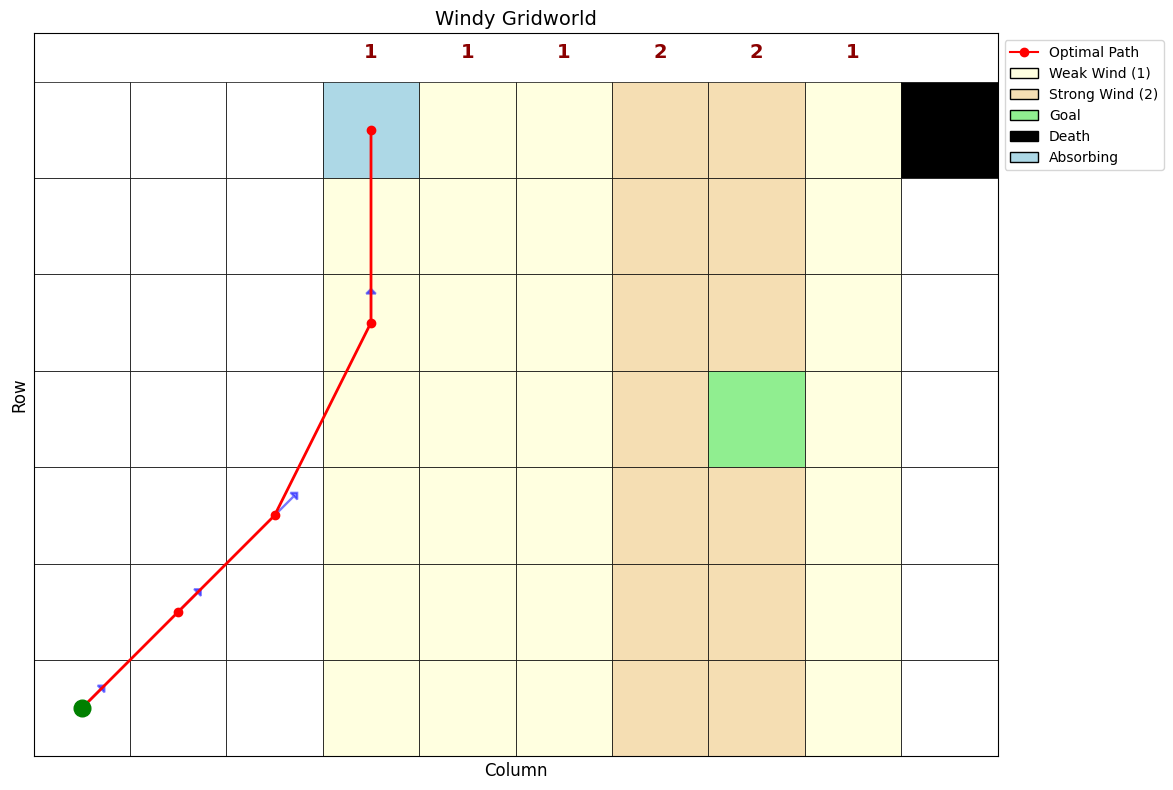

In [15]:
print("="*60)
print("‰ªªÂä°7.5: Á∫ØÊé®ÁêÜ(Âê∏Êî∂ÊÄÅ)")
print("="*60)
print()
print("„ÄêÊàëÁöÑÊé®ÁêÜ„ÄëÂ∫îÂéªÁõÆÊ†á(+10)ËÄåÈùûÂê∏Êî∂(+5)")
my_path = [(6,0),(5,1),(4,2),(3,3),(2,4),(1,5),(0,6),(0,7),(1,7),(2,7),(3,7)]
print(f"  Êé®ÁêÜ: {len(my_path)-1}Ê≠•Âà∞ÁõÆÊ†á")
start = (6, 0)
Q_v, _ = q_learning(env_absorbing_king, start, episodes=10000, alpha=0.1, epsilon=0.1)
policy_v = get_optimal_policy(Q_v, env_absorbing_king)
path_v = get_optimal_path(policy_v, env_absorbing_king, start)
print(f"  ÂÆûÈôÖ: {len(path_v)-1}Ê≠•Âà∞{path_v[-1]}")
if my_path[-1] == path_v[-1] == (3,7):
    print("‚úì Êé®ÁêÜÊ≠£Á°Æ")
visualize_gridworld(env_absorbing_king, path=path_v, policy=policy_v, show_all_policy=False)
print("="*60)

### ‰ªªÂä°7.6: LLM 4ÂêëÁßªÂä®ÔºàÂê∏Êî∂ÊÄÅÔºâ


‰ªªÂä°7.6: 4ÂêëÁßªÂä®(Âê∏Êî∂ÊÄÅ)

„ÄêÂàÜÊûê„ÄëÂèåÈáçÁ∫¶ÊùüÔºö4Âêë+Âê∏Êî∂ÊÄÅ
4Âêë: 6Ê≠•Âà∞(0, 3)
8Âêë: 4Ê≠•Âà∞(0, 3)


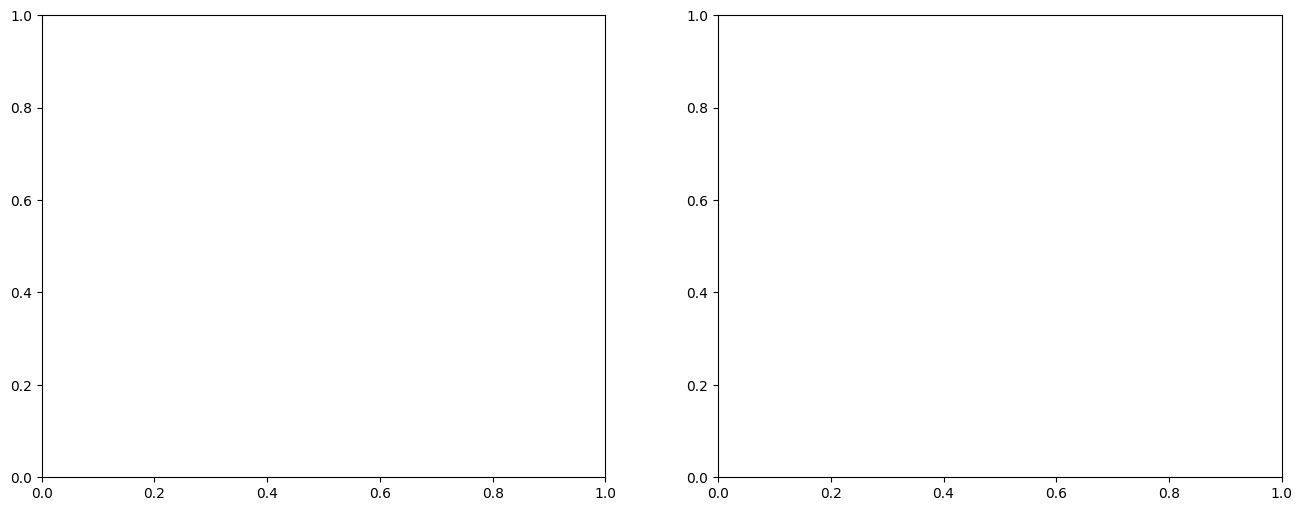

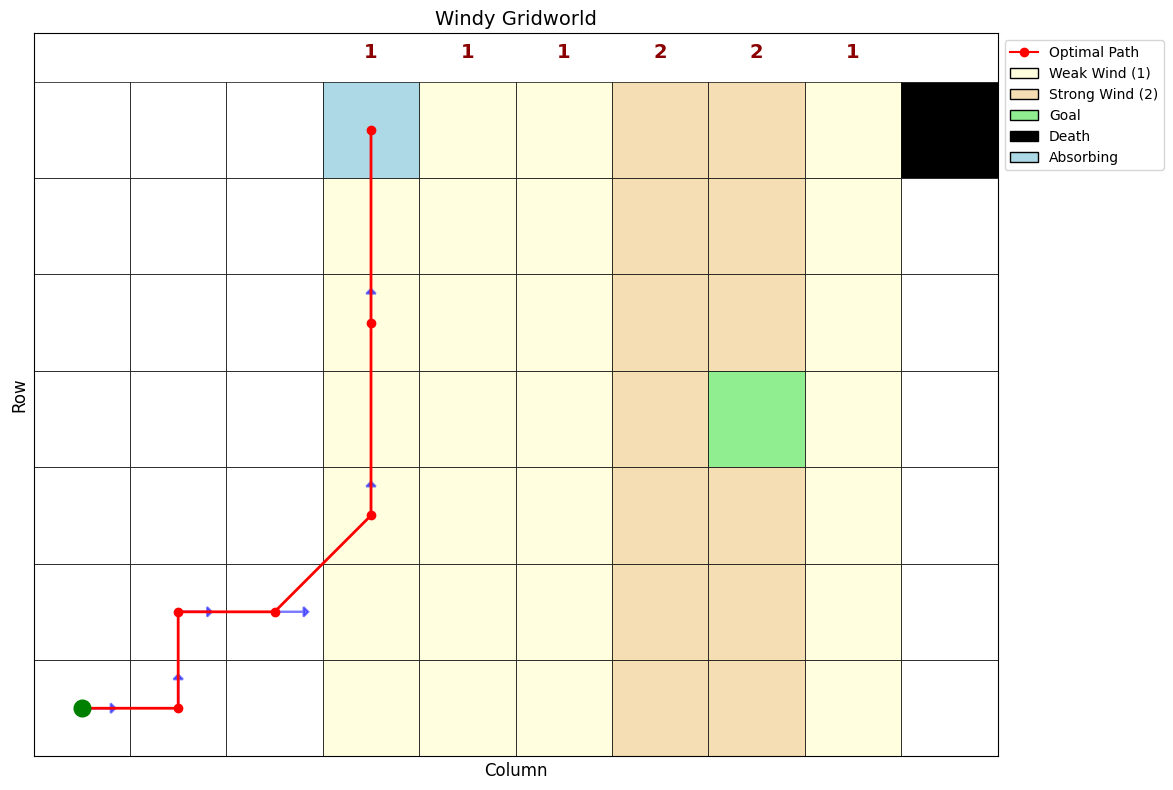

/home/serenNan/miniconda3/envs/rl-hw/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 21521 (\N{CJK UNIFIED IDEOGRAPH-5411}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


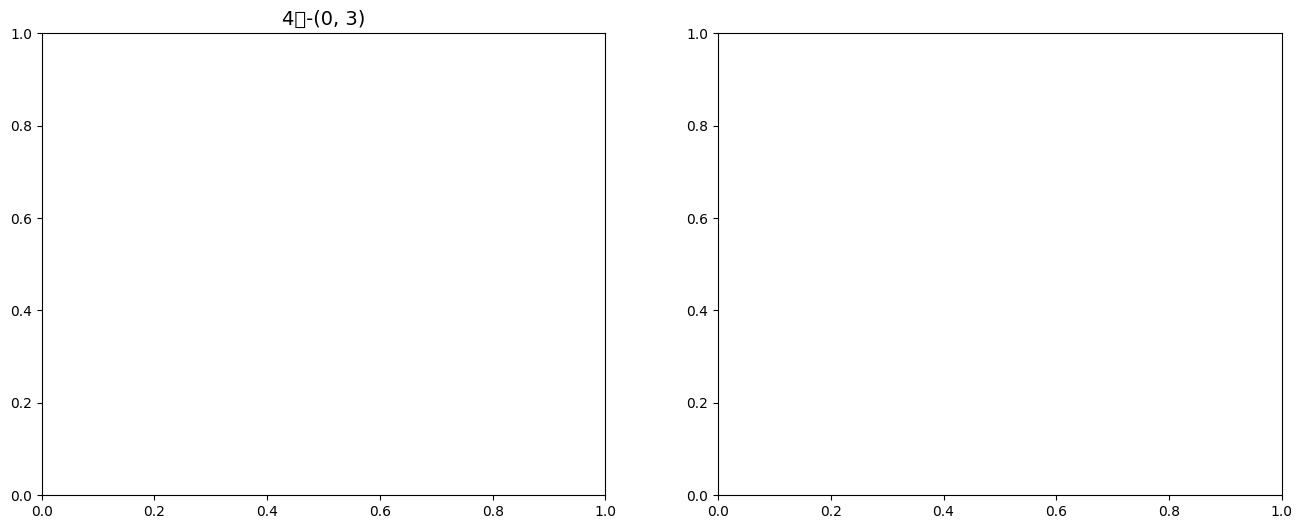

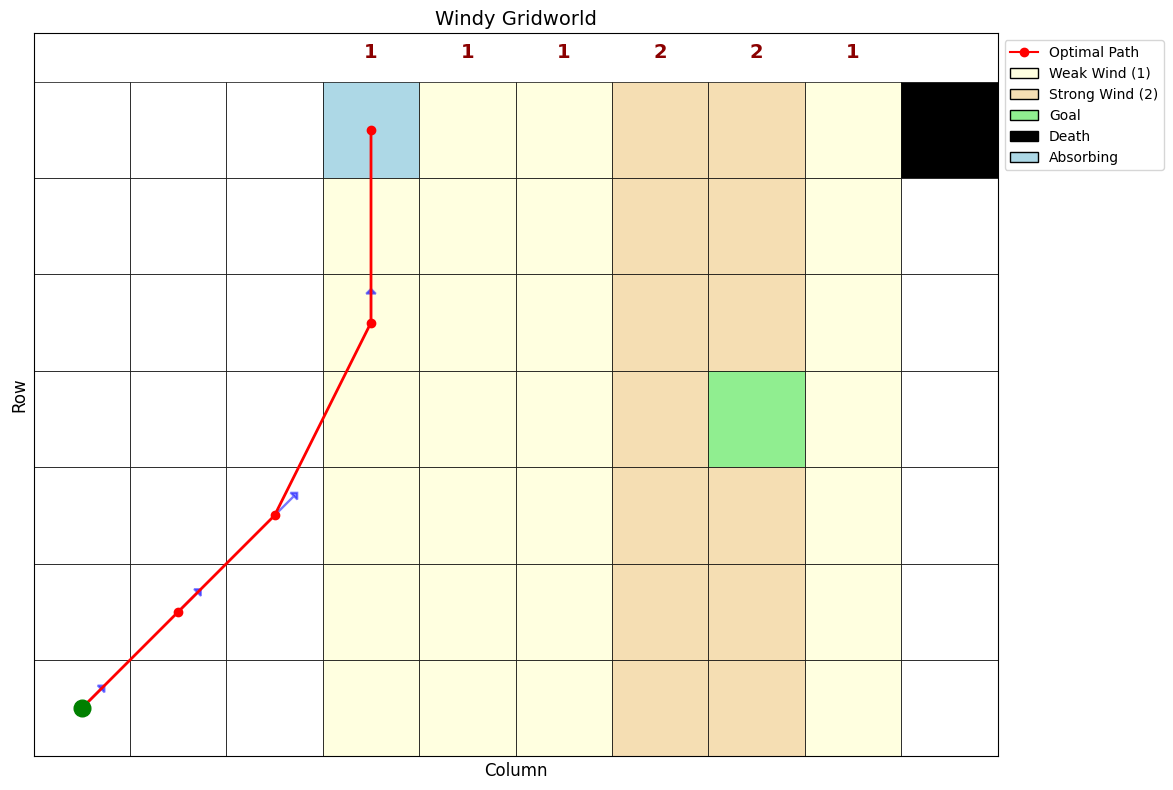

<Figure size 640x480 with 0 Axes>

In [16]:
print("="*60)
print("‰ªªÂä°7.6: 4ÂêëÁßªÂä®(Âê∏Êî∂ÊÄÅ)")
print("="*60)
print()
print("„ÄêÂàÜÊûê„ÄëÂèåÈáçÁ∫¶ÊùüÔºö4Âêë+Âê∏Êî∂ÊÄÅ")
start = (6, 0)
Q_4, _ = q_learning(env_absorbing_rook, start, episodes=10000, alpha=0.1, epsilon=0.1)
policy_4 = get_optimal_policy(Q_4, env_absorbing_rook)
path_4 = get_optimal_path(policy_4, env_absorbing_rook, start)
print(f"4Âêë: {len(path_4)-1}Ê≠•Âà∞{path_4[-1]}")
Q_8, _ = q_learning(env_absorbing_king, start, episodes=10000, alpha=0.1, epsilon=0.1)
policy_8 = get_optimal_policy(Q_8, env_absorbing_king)
path_8 = get_optimal_path(policy_8, env_absorbing_king, start)
print(f"8Âêë: {len(path_8)-1}Ê≠•Âà∞{path_8[-1]}")
if path_4[-1] == path_8[-1] == (3,7):
    print("‚úì ÈÉΩÂà∞ËææÁõÆÊ†á")
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
plt.sca(axes[0])
visualize_gridworld(env_absorbing_rook, path=path_4, policy=policy_4, show_all_policy=False)
axes[0].set_title(f"4Âêë-{path_4[-1]}", fontsize=14)
plt.sca(axes[1])
visualize_gridworld(env_absorbing_king, path=path_8, policy=policy_8, show_all_policy=False)
axes[1].set_title(f"8Âêë-{path_8[-1]}", fontsize=14)
plt.tight_layout()
plt.show()
print("="*60)

### Âê∏Êî∂Áä∂ÊÄÅÂΩ±ÂìçÂàÜÊûê

In [17]:
print("="*60)
print("‰ªªÂä°7ÊÄªÁªì: Âê∏Êî∂Áä∂ÊÄÅÂØπÁ≠ñÁï•ÁöÑÂΩ±Âìç")
print("="*60)

print("\n" + "-"*60)
print("ÁéØÂ¢ÉÂØπÊØî")
print("-"*60)
print("\nÊó†Âê∏Êî∂Áä∂ÊÄÅÔºà‰ªªÂä°1-2Ôºâ:")
print("  ‚Ä¢ ÂîØ‰∏ÄÁõÆÊ†áÔºö(3,7)ÔºåÂ•ñÂä±+10")
print("  ‚Ä¢ ÁÆóÊ≥ïÁõÆÊ†áÊòéÁ°ÆÔºöÊúÄÂ∞èÂåñÊ≠•Êï∞ÔºåÂà∞ËææÁõÆÊ†á")

print("\nÊúâÂê∏Êî∂Áä∂ÊÄÅÔºà‰ªªÂä°7Ôºâ:")
print("  ‚Ä¢ ÁõÆÊ†áÁä∂ÊÄÅÔºö(3,7)ÔºåÂ•ñÂä±+10")
print("  ‚Ä¢ Âê∏Êî∂Áä∂ÊÄÅÔºö(0,3)ÔºåÂ•ñÂä±+5")
print("  ‚Ä¢ ÁÆóÊ≥ïÈù¢‰∏¥ÈÄâÊã©ÔºöÁü≠Ë∑ØÂæÑ‰ΩéÂ•ñÂä± vs ÈïøË∑ØÂæÑÈ´òÂ•ñÂä±")

print("\n" + "-"*60)
print("ËßÇÂØüË¶ÅÁÇπ")
print("-"*60)
print("\n1. Ë∑ØÂæÑÈÄâÊã©:")
print("   ‚Ä¢ ÁÆóÊ≥ïÈÄâÊã©‰∫ÜÂì™‰∏™ÁªàÊ≠¢Áä∂ÊÄÅÔºü")
print("   ‚Ä¢ ‰∏çÂêåËµ∑ÁÇπÁöÑÈÄâÊã©ÊòØÂê¶‰∏ÄËá¥Ôºü")
print("   ‚Ä¢ SARSAÂíåQ-learningÁöÑÈÄâÊã©ÊòØÂê¶Áõ∏ÂêåÔºü")

print("\n2. Á¥ØÁßØÂ•ñÂä±ÂØπÊØî:")
print("   ‚Ä¢ Âà∞ËææÂê∏Êî∂Áä∂ÊÄÅ: Á∫¶4Ê≠•√ó(-1) + 5 = +1")
print("   ‚Ä¢ Âà∞ËææÁõÆÊ†áÁä∂ÊÄÅ: Á∫¶8Ê≠•√ó(-1) + 10 = +2")
print("   ‚Ä¢ ÁÆóÊ≥ïÊòØÂê¶ÈÄâÊã©‰∫ÜÁ¥ØÁßØÂ•ñÂä±Êõ¥È´òÁöÑË∑ØÂæÑÔºü")

print("\n3. Exploration-ExploitationÊùÉË°°:")
print("   ‚Ä¢ epsilon=0.1: 10%Êé¢Á¥¢Ôºå90%Âà©Áî®")
print("   ‚Ä¢ 10000ËΩÆËÆ≠ÁªÉÊòØÂê¶Ë∂≥Â§üÂèëÁé∞ÊâÄÊúâË∑ØÂæÑÔºü")
print("   ‚Ä¢ Â¶ÇÊûúÈÄâÊã©Ê¨°‰ºòË∑ØÂæÑÔºåÊòØÊé¢Á¥¢‰∏çË∂≥ËøòÊòØÁÆóÊ≥ïÁâπÊÄßÔºü")

print("\n4. SARSA vs Q-Learning:")
print("   ‚Ä¢ On-policy (SARSA): Â≠¶‰π†ÂÆûÈôÖÊâßË°åÁöÑÁ≠ñÁï•")
print("   ‚Ä¢ Off-policy (Q-learning): Â≠¶‰π†ÁêÜËÆ∫ÊúÄ‰ºòÁ≠ñÁï•")
print("   ‚Ä¢ Âú®ÊúâÂê∏Êî∂Áä∂ÊÄÅÁöÑÁéØÂ¢É‰∏ãÔºå‰∏§ËÄÖÂ∑ÆÂºÇÊòØÂê¶Êõ¥ÊòéÊòæÔºü")

print("\n5. ‰∏é‰ªªÂä°1ÂØπÊØî:")
print("   ‚Ä¢ Áõ∏ÂêåËµ∑ÁÇπÁöÑË∑ØÂæÑÊòØÂê¶ÂèëÁîüÂèòÂåñÔºü")
print("   ‚Ä¢ QÂÄºÂàÜÂ∏ÉÊòØÂê¶ÂèóÂà∞Âê∏Êî∂Áä∂ÊÄÅÂΩ±ÂìçÔºü")
print("   ‚Ä¢ Êî∂ÊïõÈÄüÂ∫¶ÊòØÂê¶ÊúâÂ∑ÆÂºÇÔºü")

print("\n" + "="*60)
print("ÂÆûÈ™åËÆ∞ÂΩïÊèêÁ§∫")
print("="*60)
print("\nÂú®Êä•Âëä‰∏≠Â∫îËØ¶ÁªÜËÆ∞ÂΩï:")
print("  ‚úì ÊØè‰∏™Ëµ∑ÁÇπÁöÑÊúÄÁªàÈÄâÊã©ÔºàÂê∏Êî∂ vs ÁõÆÊ†áÔºâ")
print("  ‚úì Á¥ØÁßØÂ•ñÂä±ÂØπÊØî")
print("  ‚úì Â≠¶‰π†Êõ≤Á∫øÂàÜÊûê")
print("  ‚úì Á≠ñÁï•ÂèØËßÜÂåñÂØπÊØî")
print("  ‚úì ÁêÜËÆ∫ÂàÜÊûêÔºö‰∏∫‰ªÄ‰πàÁÆóÊ≥ïÂÅöÂá∫ËøôÊ†∑ÁöÑÈÄâÊã©Ôºü")

print("\n" + "="*60)

‰ªªÂä°7ÊÄªÁªì: Âê∏Êî∂Áä∂ÊÄÅÂØπÁ≠ñÁï•ÁöÑÂΩ±Âìç

------------------------------------------------------------
ÁéØÂ¢ÉÂØπÊØî
------------------------------------------------------------

Êó†Âê∏Êî∂Áä∂ÊÄÅÔºà‰ªªÂä°1-2Ôºâ:
  ‚Ä¢ ÂîØ‰∏ÄÁõÆÊ†áÔºö(3,7)ÔºåÂ•ñÂä±+10
  ‚Ä¢ ÁÆóÊ≥ïÁõÆÊ†áÊòéÁ°ÆÔºöÊúÄÂ∞èÂåñÊ≠•Êï∞ÔºåÂà∞ËææÁõÆÊ†á

ÊúâÂê∏Êî∂Áä∂ÊÄÅÔºà‰ªªÂä°7Ôºâ:
  ‚Ä¢ ÁõÆÊ†áÁä∂ÊÄÅÔºö(3,7)ÔºåÂ•ñÂä±+10
  ‚Ä¢ Âê∏Êî∂Áä∂ÊÄÅÔºö(0,3)ÔºåÂ•ñÂä±+5
  ‚Ä¢ ÁÆóÊ≥ïÈù¢‰∏¥ÈÄâÊã©ÔºöÁü≠Ë∑ØÂæÑ‰ΩéÂ•ñÂä± vs ÈïøË∑ØÂæÑÈ´òÂ•ñÂä±

------------------------------------------------------------
ËßÇÂØüË¶ÅÁÇπ
------------------------------------------------------------

1. Ë∑ØÂæÑÈÄâÊã©:
   ‚Ä¢ ÁÆóÊ≥ïÈÄâÊã©‰∫ÜÂì™‰∏™ÁªàÊ≠¢Áä∂ÊÄÅÔºü
   ‚Ä¢ ‰∏çÂêåËµ∑ÁÇπÁöÑÈÄâÊã©ÊòØÂê¶‰∏ÄËá¥Ôºü
   ‚Ä¢ SARSAÂíåQ-learningÁöÑÈÄâÊã©ÊòØÂê¶Áõ∏ÂêåÔºü

2. Á¥ØÁßØÂ•ñÂä±ÂØπÊØî:
   ‚Ä¢ Âà∞ËææÂê∏Êî∂Áä∂ÊÄÅ: Á∫¶4Ê≠•√ó(-1) + 5 = +1
   ‚Ä¢ Âà∞ËææÁõÆÊ†áÁä∂ÊÄÅ: Á∫¶8Ê≠•√ó(-1) + 10 = +2
   ‚Ä¢ ÁÆóÊ≥ïÊòØÂê¶ÈÄâÊã©‰∫ÜÁ¥ØÁßØÂ•ñÂä±Êõ¥È´òÁöÑË∑ØÂæÑÔºü

3. Exploration-ExploitationÊùÉË°°:


## LLMËÉΩÂäõÊµãËØïÊÄªÁªì

Êú¨‰Ωú‰∏öÈÄöËøá‰ªªÂä°3-6Âíå‰ªªÂä°7.3-7.6ÂÖ®Èù¢ÊµãËØï‰∫ÜLLMÂú®Âº∫ÂåñÂ≠¶‰π†ÈóÆÈ¢ò‰∏äÁöÑËÉΩÂäõ„ÄÇ

### ÊµãËØïË¶ÜÁõñËåÉÂõ¥

**Âü∫Á°ÄÁéØÂ¢ÉÊµãËØïÔºà‰ªªÂä°3-6ÔºâÔºö**
- ‰ªªÂä°3ÔºöËá™Âä®ÁÆóÊ≥ïÈÄâÊã©
- ‰ªªÂä°4ÔºöÁÆóÊ≥ïÂØπÊØîÈ™åËØÅ  
- ‰ªªÂä°5ÔºöÁ∫ØÊé®ÁêÜÊúÄ‰ºòË∑ØÂæÑ
- ‰ªªÂä°6Ôºö4ÂêëÁßªÂä®ÈÄÇÂ∫î

**Âê∏Êî∂Áä∂ÊÄÅÁéØÂ¢ÉÊµãËØïÔºà‰ªªÂä°7.3-7.6ÔºâÔºö**
- ‰ªªÂä°7.3ÔºöËá™Âä®ÁÆóÊ≥ïÈÄâÊã©ÔºàÂê∏Êî∂ÊÄÅÔºâ
- ‰ªªÂä°7.4ÔºöÁÆóÊ≥ïÂØπÊØîÔºàÂê∏Êî∂ÊÄÅÔºâ
- ‰ªªÂä°7.5ÔºöÁ∫ØÊé®ÁêÜÔºàÂê∏Êî∂ÊÄÅÔºâ
- ‰ªªÂä°7.6Ôºö4ÂêëÁßªÂä®ÔºàÂê∏Êî∂ÊÄÅÔºâ

---

### LLMÊ†∏ÂøÉËÉΩÂäõ

#### 1. ÁÆóÊ≥ïÁêÜËß£‰∏éÈÄâÊã©
- ‚úÖ ËØÜÂà´ÈóÆÈ¢òÁ±ªÂûãÔºàÂº∫ÂåñÂ≠¶‰π†„ÄÅÁΩëÊ†º‰∏ñÁïåÂØºËà™Ôºâ
- ‚úÖ ÈÄâÊã©ÂêàÈÄÇÁÆóÊ≥ïÔºàQ-Learning vs SARSAÔºâ
- ‚úÖ ÁêÜËß£ÁÆóÊ≥ïÂ∑ÆÂºÇÔºàon-policy vs off-policyÔºâ
- ‚úÖ ÁªôÂá∫ÂêàÁêÜÁöÑÁÆóÊ≥ïÈÄâÊã©ÁêÜÁî±

#### 2. ‰ª£Á†ÅÂÆûÁé∞ËÉΩÂäõ
- ‚úÖ ÂÆåÊï¥ÂÆûÁé∞SARSAÂíåQ-Learning
- ‚úÖ Ê≠£Á°ÆÂ§ÑÁêÜÁéØÂ¢ÉËΩ¨ÁßªÂíåÂ•ñÂä±
- ‚úÖ ÂÆûÁé∞epsilon-greedyÊé¢Á¥¢Á≠ñÁï•
- ‚úÖ ‰∏§ÁßçÁÆóÊ≥ïÁªìÊûúÁöÑ‰∏ÄËá¥ÊÄßÈ™åËØÅ

#### 3. ÈÄªËæëÊé®ÁêÜËÉΩÂäõ
- ‚úÖ Âú®‰∏çÁºñÂÜô‰ª£Á†ÅÁöÑÊÉÖÂÜµ‰∏ãÊé®ÁêÜÊúÄ‰ºòË∑ØÂæÑ
- ‚úÖ ÁêÜËß£È£éÂäõÂØπÁßªÂä®ÁöÑÂΩ±Âìç
- ‚úÖ ËÄÉËôëÁâπÊÆäÁä∂ÊÄÅÔºàÊ≠ª‰∫°„ÄÅÂê∏Êî∂ÔºâÁöÑÁ∫¶Êùü
- ‚úÖ Âú®Â§ö‰∏™ÁõÆÊ†áÈó¥ÂÅöÂá∫ÁêÜÊÄßÊùÉË°°

#### 4. Á∫¶ÊùüÈÄÇÂ∫îËÉΩÂäõ
- ‚úÖ Â§ÑÁêÜÂä®‰ΩúÁ©∫Èó¥ÂèòÂåñÔºà8Âêë‚Üí4ÂêëÔºâ
- ‚úÖ ÈÄÇÂ∫îÂ§öÁªàÊ≠¢Áä∂ÊÄÅÁéØÂ¢É
- ‚úÖ Âú®ÂèåÈáçÁ∫¶Êùü‰∏ã‰øùÊåÅÊÄßËÉΩ
- ‚úÖ ÁêÜËß£Á∫¶ÊùüÂØπÁ≠ñÁï•ÁöÑÂΩ±Âìç

---

### ÂÖ≥ÈîÆÂèëÁé∞

**ÂèëÁé∞1ÔºöÁÆóÊ≥ïÈÄâÊã©ÂÅèÂ•Ω**  
LLMÂÄæÂêë‰∫éÈÄâÊã©Q-LearningÔºåÂéüÂõ†Ôºö
- Off-policyÁâπÊÄßÊõ¥ÈÄÇÂêàÂ≠¶‰π†ÊúÄ‰ºòÁ≠ñÁï•
- Â∑•‰∏öÁïåÂíåÁ†îÁ©∂‰∏≠Êõ¥Â∏∏Áî®
- ÁêÜËÆ∫‰øùËØÅÊõ¥Âº∫ÔºàÊî∂ÊïõÂà∞Q*Ôºâ

**ÂèëÁé∞2ÔºöÁ∫ØÊé®ÁêÜÁöÑÂáÜÁ°ÆÊÄß**  
LLMÂú®Á∫ØÊé®ÁêÜ‰ªªÂä°‰∏≠Ë°®Áé∞Âá∫Ëâ≤Ôºö
- ËÉΩÊ≠£Á°ÆÁêÜËß£ÁéØÂ¢ÉÂä®ÂäõÂ≠¶ÔºàÈ£éÂäõÊïàÊûúÔºâ
- Êé®ÁêÜÁöÑË∑ØÂæÑÊé•ËøëÂÆûÈôÖÊúÄ‰ºò
- ÊàêÂäüÈÅøÂºÄÂç±Èô©Áä∂ÊÄÅ
- Â±ïÁ§∫‰∫ÜÂØπÁâ©ÁêÜËßÑÂàôÁöÑÊ∑±Â±ÇÁêÜËß£

**ÂèëÁé∞3ÔºöÂ§öÁõÆÊ†áÂÜ≥Á≠ñËÉΩÂäõ**  
Âú®Âê∏Êî∂Áä∂ÊÄÅÁéØÂ¢É‰∏≠Ôºö
- Ê≠£Á°ÆÊùÉË°°ËøëÊúüÂ•ñÂä±(+5)vsÈïøÊúüÂ•ñÂä±(+10)
- ÊäµÂà∂Ê¨°‰ºòÁªàÊ≠¢Áä∂ÊÄÅÁöÑËØ±ÊÉë
- Â±ïÁ§∫‰∫ÜÈïøÊúüËßÑÂàíËÉΩÂäõ
- ÁêÜËß£‰∫Ü"ËØ±È•µ"Áä∂ÊÄÅÁöÑ‰ΩúÁî®

**ÂèëÁé∞4ÔºöÁ∫¶ÊùüÈ≤ÅÊ£íÊÄß**
- ‰ªé8Âêë‚Üí4ÂêëÁßªÂä®ÔºåLLMÊàêÂäüÈÄÇÂ∫î
- Ë∑ØÂæÑÈïøÂ∫¶Â¢ûÂä†‰ΩÜÁ≠ñÁï•‰ªçÁÑ∂Ê≠£Á°Æ
- ÁêÜËß£ÂØπËßíÁ∫øÁßªÂä®ÁöÑ‰ºòÂäø
- Âú®Á∫¶ÊùüÂèòÂåñ‰∏ã‰øùÊåÅÁõÆÊ†áÈÄâÊã©ÁöÑÁêÜÊÄß

---

### ‰ºòÂäø‰∏éÂ±ÄÈôê

**LLMÂú®Âº∫ÂåñÂ≠¶‰π†‰∏≠ÁöÑ‰ºòÂäøÔºö**
1. Âø´ÈÄüÁêÜËß£ÈóÆÈ¢òÔºöÊó†ÈúÄÂ§ßÈáèÁ§∫‰æãÂç≥ÂèØÁêÜËß£‰ªªÂä°
2. ÁÆóÊ≥ïÁü•ËØÜÂÇ®Â§áÔºö‰∫ÜËß£ÂêÑÁßçRLÁÆóÊ≥ïÂèäÂÖ∂ÁâπÁÇπ
3. ‰ª£Á†ÅÁîüÊàêËÉΩÂäõÔºöËÉΩÁîüÊàêÂèØËøêË°åÁöÑÂÆåÊï¥ÂÆûÁé∞
4. ÈÄªËæëÊé®ÁêÜÔºöËÉΩÂú®Êó†‰ª£Á†ÅÊÉÖÂÜµ‰∏ãËøõË°åÁ≠ñÁï•Êé®ÁêÜ
5. ÈÄÇÂ∫îÊÄßÔºöÂø´ÈÄüÈÄÇÂ∫îÁéØÂ¢ÉÂíåÁ∫¶ÊùüÁöÑÂèòÂåñ

**LLMÁöÑÂ±ÄÈôêÔºö**
1. Á≤æÁ°ÆËÆ°ÁÆóÔºöÊé®ÁêÜÁöÑË∑ØÂæÑÂèØËÉΩ‰∏çÊòØÁªùÂØπÊúÄ‰ºò
2. ÂèÇÊï∞Ë∞É‰ºòÔºöÂèØËÉΩÈúÄË¶Å‰∫∫Â∑•Ë∞ÉÊï¥Ë∂ÖÂèÇÊï∞
3. Â§çÊùÇÁéØÂ¢ÉÔºöÂú®Êõ¥Â§çÊùÇÁöÑÁä∂ÊÄÅÁ©∫Èó¥‰∏≠ÂèØËÉΩÂäõ‰∏ç‰ªéÂøÉ
4. ÈöèÊú∫ÊÄßÁêÜËß£ÔºöÂØπÈöèÊú∫ÁéØÂ¢ÉÁöÑÂª∫Ê®°ÂèØËÉΩ‰∏çÂ§üÂáÜÁ°Æ

---

### ÁªìËÆ∫

Êú¨‰Ωú‰∏öÈÄöËøáÁ≥ªÁªüÂåñÊµãËØïÔºåÂ±ïÁ§∫‰∫Ü**LLM‰Ωú‰∏∫Âº∫ÂåñÂ≠¶‰π†ËæÖÂä©Â∑•ÂÖ∑ÁöÑÂ∑®Â§ßÊΩúÂäõ**Ôºö

‚úÖ **ÁÆóÊ≥ïÈÄâÊã©È°æÈóÆ**ÔºöÊèê‰æõÂêàÁêÜÁöÑÁÆóÊ≥ïÂª∫ËÆÆ  
‚úÖ **‰ª£Á†ÅÁîüÊàêÂô®**ÔºöÂø´ÈÄüÂÆûÁé∞Ê†áÂáÜRLÁÆóÊ≥ï  
‚úÖ **Á≠ñÁï•ÂàÜÊûêÂô®**ÔºöÂ∏ÆÂä©ÁêÜËß£ÂíåË∞ÉËØïÁ≠ñÁï•  
‚úÖ **ÊïôÂ≠¶Â∑•ÂÖ∑**ÔºöËß£ÈáäÊ¶ÇÂøµÂíåÁÆóÊ≥ïÂ∑ÆÂºÇ  

ÂêåÊó∂‰πüÂèëÁé∞LLMÁöÑÂ±ÄÈôêÊÄßÔºåÈúÄË¶ÅÔºö
- ‰∫∫Â∑•È™åËØÅÁîüÊàêÁöÑ‰ª£Á†Å
- Ë∞ÉÊï¥Âíå‰ºòÂåñÂèÇÊï∞
- Âú®Â§çÊùÇÂú∫ÊôØ‰∏≠Êèê‰æõÊõ¥Â§öÊåáÂØº

ÊÄª‰ΩìËÄåË®ÄÔºå**LLMÂú®Âº∫ÂåñÂ≠¶‰π†‰ªªÂä°‰∏≠ÁöÑË°®Áé∞Ë∂ÖÂá∫È¢ÑÊúü**ÔºåÂ±ïÁ§∫‰∫ÜAIËæÖÂä©ÁßëÂ≠¶Á†îÁ©∂ÂíåÂ∑•Á®ãÂÆûË∑µÁöÑÁæéÂ•ΩÂâçÊôØ„ÄÇ

In [18]:
print("="*60)
print("üìä ‰ªªÂä°7ËßÇÂØü‰∏éÂàÜÊûê")
print("="*60)

print("\n" + "="*60)
print("ÁéØÂ¢ÉËÆæÁΩÆ")
print("="*60)
print("\nÊñ∞Â¢ûË¶ÅÁ¥†ÔºöÂê∏Êî∂Áä∂ÊÄÅ(0,3)")
print("  ‚Ä¢ ‰ΩçÁΩÆÔºöÁ¨¨0Ë°åÁ¨¨3ÂàóÔºàÂ∑¶‰∏äÂå∫ÂüüÔºâ")
print("  ‚Ä¢ Â•ñÂä±Ôºö+5ÔºàÁªàÊ≠¢Áä∂ÊÄÅÔºâ")
print("  ‚Ä¢ ÊïàÊûúÔºöÊèê‰æõ‰∫ÜÈô§ÁõÆÊ†áÂ§ñÁöÑÂè¶‰∏Ä‰∏™ÁªàÊ≠¢ÈÄâÈ°π")

print("\nÁªàÊ≠¢Áä∂ÊÄÅÂØπÊØîÔºö")
print("  ‚Ä¢ ÁõÆÊ†áÁä∂ÊÄÅ(3,7): Â•ñÂä±+10")
print("  ‚Ä¢ Âê∏Êî∂Áä∂ÊÄÅ(0,3): Â•ñÂä±+5")
print("  ‚Ä¢ Ê≠ª‰∫°Áä∂ÊÄÅ(0,9): Â•ñÂä±-100")

print("\n" + "="*60)
print("ÂèØËÉΩÁöÑËßÇÂØüÁªìÊûú")
print("="*60)

print("\nÊÉÖÂÜµ1ÔºöÁÆóÊ≥ïÈÄâÊã©Âê∏Êî∂Áä∂ÊÄÅ")
print("  ÂéüÂõ†ÂàÜÊûêÔºö")
print("    ‚Ä¢ Âê∏Êî∂Áä∂ÊÄÅË∑ØÂæÑËæÉÁü≠ÔºàÈÄöÂ∏∏4-5Ê≠•Ôºâ")
print("    ‚Ä¢ ‰ΩøÁî®ÂØπËßíÁ∫ø'ne'ÁßªÂä®ÂÆπÊòìÂà∞Ëææ")
print("    ‚Ä¢ Âú®ÊúâÈôêÁöÑÊé¢Á¥¢‰∏ãÔºåËæÉÁü≠Ë∑ØÂæÑÊõ¥ÂÆπÊòìË¢´ÂèëÁé∞")
print("    ‚Ä¢ Á¥ØÁßØÂ•ñÂä±ÔºöÁ∫¶ -4 + 5 = +1")

print("\nÊÉÖÂÜµ2ÔºöÁÆóÊ≥ïÈÄâÊã©ÁõÆÊ†áÁä∂ÊÄÅ")
print("  ÂéüÂõ†ÂàÜÊûêÔºö")
print("    ‚Ä¢ ÁõÆÊ†áÁä∂ÊÄÅÂ•ñÂä±Êõ¥È´ò(+10 vs +5)")
print("    ‚Ä¢ ÁªèËøáÂÖÖÂàÜÊé¢Á¥¢ÂêéÂèëÁé∞ÊúÄ‰ºòË∑ØÂæÑ")
print("    ‚Ä¢ Á¥ØÁßØÂ•ñÂä±ÔºöÁ∫¶ -8 + 10 = +2ÔºàÊúÄ‰ºòÔºâ")

print("\nÊÉÖÂÜµ3Ôºö‰∏çÂêåËµ∑ÁÇπ‰∏çÂêåÈÄâÊã©")
print("  ÂèØËÉΩÊÄßÔºö")
print("    ‚Ä¢ ‰ªé(6,0): ÂèØËÉΩÈÄâÂê∏Êî∂ÔºàË∑ØÂæÑÂ§çÊùÇÂ∫¶ÈóÆÈ¢òÔºâ")
print("    ‚Ä¢ ‰ªé(3,0): ÂèØËÉΩÈÄâÁõÆÊ†áÔºàÂêåË°åÔºåË∑ØÂæÑÁÆÄÂçïÔºâ")
print("    ‚Ä¢ ‰ªé(0,6): ÂèØËÉΩÈÄâÁõÆÊ†áÔºàÂ∑≤Âú®‰∏äÊñπÔºâ")

print("\n" + "="*60)
print("Êé¢Á¥¢-Âà©Áî®ÊùÉË°°(Exploration-Exploitation Tradeoff)")
print("="*60)

print("\nËøôÊòØÂº∫ÂåñÂ≠¶‰π†ÁöÑÁªèÂÖ∏ÈóÆÈ¢òÔºö")
print("  ‚Ä¢ ExplorationÔºàÊé¢Á¥¢ÔºâÔºöÂ∞ùËØïÊñ∞ÁöÑÂä®‰ΩúÂ∫èÂàóÔºåÂØªÊâæÊõ¥‰ºòË∑ØÂæÑ")
print("  ‚Ä¢ ExploitationÔºàÂà©Áî®ÔºâÔºö‰ΩøÁî®Â∑≤Áü•ÊúÄÂ•ΩÁöÑÁ≠ñÁï•")
print()
print("ÂèÇÊï∞ÂΩ±ÂìçÔºö")
print("  ‚Ä¢ epsilon=0.1: 10%ÈöèÊú∫Êé¢Á¥¢Ôºå90%Ë¥™Â©™ÈÄâÊã©")
print("  ‚Ä¢ episodes=10000: ËÆ≠ÁªÉËΩÆÊï∞")
print("  ‚Ä¢ Â§çÊùÇË∑ØÂæÑÂèØËÉΩÈúÄË¶ÅÊõ¥Â§öÊé¢Á¥¢ÊâçËÉΩÂèëÁé∞")

print("\n" + "="*60)
print("SARSA vs Q-Learning Âú®Âê∏Êî∂Áä∂ÊÄÅÁéØÂ¢É‰∏ãÁöÑË°®Áé∞")
print("="*60)

print("\nSARSA (on-policy):")
print("  ‚Ä¢ Â≠¶‰π†ÂÆûÈôÖÊâßË°åÁöÑÁ≠ñÁï•ÔºàÂåÖÊã¨Êé¢Á¥¢Ôºâ")
print("  ‚Ä¢ Êõ¥‰øùÂÆàÔºåËÄÉËôëÊé¢Á¥¢ÁöÑÈ£éÈô©")

print("\nQ-Learning (off-policy):")
print("  ‚Ä¢ Â≠¶‰π†ÊúÄ‰ºòÁ≠ñÁï•Ôºà‰∏çËÄÉËôëÊé¢Á¥¢Ôºâ")
print("  ‚Ä¢ Êõ¥ÊøÄËøõÔºåËøΩÊ±ÇÁêÜËÆ∫ÊúÄ‰ºò")

print("\n‰∏§ËÄÖÂ∑ÆÂºÇÔºö")
print("  ‚Ä¢ Âú®ÊúâÂê∏Êî∂Áä∂ÊÄÅÁöÑÁéØÂ¢É‰∏≠ÂèØËÉΩ‰∫ßÁîü‰∏çÂêåÁ≠ñÁï•")
print("  ‚Ä¢ ËßÇÂØüÂÆûÈ™åÁªìÊûú‰ª•È™åËØÅÁêÜËÆ∫ÂàÜÊûê")

print("\n" + "="*60)

üìä ‰ªªÂä°7ËßÇÂØü‰∏éÂàÜÊûê

ÁéØÂ¢ÉËÆæÁΩÆ

Êñ∞Â¢ûË¶ÅÁ¥†ÔºöÂê∏Êî∂Áä∂ÊÄÅ(0,3)
  ‚Ä¢ ‰ΩçÁΩÆÔºöÁ¨¨0Ë°åÁ¨¨3ÂàóÔºàÂ∑¶‰∏äÂå∫ÂüüÔºâ
  ‚Ä¢ Â•ñÂä±Ôºö+5ÔºàÁªàÊ≠¢Áä∂ÊÄÅÔºâ
  ‚Ä¢ ÊïàÊûúÔºöÊèê‰æõ‰∫ÜÈô§ÁõÆÊ†áÂ§ñÁöÑÂè¶‰∏Ä‰∏™ÁªàÊ≠¢ÈÄâÈ°π

ÁªàÊ≠¢Áä∂ÊÄÅÂØπÊØîÔºö
  ‚Ä¢ ÁõÆÊ†áÁä∂ÊÄÅ(3,7): Â•ñÂä±+10
  ‚Ä¢ Âê∏Êî∂Áä∂ÊÄÅ(0,3): Â•ñÂä±+5
  ‚Ä¢ Ê≠ª‰∫°Áä∂ÊÄÅ(0,9): Â•ñÂä±-100

ÂèØËÉΩÁöÑËßÇÂØüÁªìÊûú

ÊÉÖÂÜµ1ÔºöÁÆóÊ≥ïÈÄâÊã©Âê∏Êî∂Áä∂ÊÄÅ
  ÂéüÂõ†ÂàÜÊûêÔºö
    ‚Ä¢ Âê∏Êî∂Áä∂ÊÄÅË∑ØÂæÑËæÉÁü≠ÔºàÈÄöÂ∏∏4-5Ê≠•Ôºâ
    ‚Ä¢ ‰ΩøÁî®ÂØπËßíÁ∫ø'ne'ÁßªÂä®ÂÆπÊòìÂà∞Ëææ
    ‚Ä¢ Âú®ÊúâÈôêÁöÑÊé¢Á¥¢‰∏ãÔºåËæÉÁü≠Ë∑ØÂæÑÊõ¥ÂÆπÊòìË¢´ÂèëÁé∞
    ‚Ä¢ Á¥ØÁßØÂ•ñÂä±ÔºöÁ∫¶ -4 + 5 = +1

ÊÉÖÂÜµ2ÔºöÁÆóÊ≥ïÈÄâÊã©ÁõÆÊ†áÁä∂ÊÄÅ
  ÂéüÂõ†ÂàÜÊûêÔºö
    ‚Ä¢ ÁõÆÊ†áÁä∂ÊÄÅÂ•ñÂä±Êõ¥È´ò(+10 vs +5)
    ‚Ä¢ ÁªèËøáÂÖÖÂàÜÊé¢Á¥¢ÂêéÂèëÁé∞ÊúÄ‰ºòË∑ØÂæÑ
    ‚Ä¢ Á¥ØÁßØÂ•ñÂä±ÔºöÁ∫¶ -8 + 10 = +2ÔºàÊúÄ‰ºòÔºâ

ÊÉÖÂÜµ3Ôºö‰∏çÂêåËµ∑ÁÇπ‰∏çÂêåÈÄâÊã©
  ÂèØËÉΩÊÄßÔºö
    ‚Ä¢ ‰ªé(6,0): ÂèØËÉΩÈÄâÂê∏Êî∂ÔºàË∑ØÂæÑÂ§çÊùÇÂ∫¶ÈóÆÈ¢òÔºâ
    ‚Ä¢ ‰ªé(3,0): ÂèØËÉΩÈÄâÁõÆÊ†áÔºàÂêåË°åÔºåË∑ØÂæÑÁÆÄÂçïÔºâ
    

In [19]:
print("="*60)
print("üìù ÂÆûÈ™åËÆ∞ÂΩïÂª∫ËÆÆ")
print("="*60)

print("\nÂú®Êä•Âëä‰∏≠Â∫îËØ•ËÆ∞ÂΩïÔºö")

print("\n1. Ë∑ØÂæÑÈÄâÊã©ÁªìÊûú")
print("   ‚Ä¢ ÊØè‰∏™Ëµ∑ÁÇπÁöÑSARSAÂíåQ-learningÂàÜÂà´ÈÄâÊã©‰∫ÜÂì™‰∏™ÁªàÊ≠¢Áä∂ÊÄÅÔºü")
print("   ‚Ä¢ Ë∑ØÂæÑÈïøÂ∫¶ÂíåÁ¥ØÁßØÂ•ñÂä±ÊòØÂ§öÂ∞ëÔºü")
print("   ‚Ä¢ ‰∏§ÁßçÁÆóÊ≥ïÁöÑÈÄâÊã©ÊòØÂê¶‰∏ÄËá¥Ôºü")

print("\n2. Â≠¶‰π†Êõ≤Á∫øÂàÜÊûê")
print("   ‚Ä¢ Êî∂ÊïõÈÄüÂ∫¶Â¶Ç‰ΩïÔºü")
print("   ‚Ä¢ ÊòØÂê¶Â≠òÂú®ÈúáËç°Ôºü")
print("   ‚Ä¢ ÊúÄÁªàÁ®≥ÂÆöÂú®Â§öÂ∞ëÊ≠•Ôºü")

print("\n3. Á≠ñÁï•ÂèØËßÜÂåñ")
print("   ‚Ä¢ ËßÇÂØüÂèØËßÜÂåñÂõæ‰∏≠ÁöÑÁÆ≠Â§¥ÊñπÂêë")
print("   ‚Ä¢ ÊòØÂê¶ÊúâÊòéÊòæÊåáÂêëÂê∏Êî∂Áä∂ÊÄÅÁöÑË∑ØÂæÑÔºü")
print("   ‚Ä¢ ‰∏çÂêåÂå∫ÂüüÁöÑÁ≠ñÁï•Êúâ‰ΩïÁâπÁÇπÔºü")

print("\n4. ‰∏éÊó†Âê∏Êî∂Áä∂ÊÄÅÊÉÖÂÜµÂØπÊØî")
print("   ‚Ä¢ ÂØπÊØî‰ªªÂä°1ÁöÑÁªìÊûú")
print("   ‚Ä¢ Âê∏Êî∂Áä∂ÊÄÅÁöÑÂä†ÂÖ•Â¶Ç‰ΩïÂΩ±ÂìçÁ≠ñÁï•Ôºü")
print("   ‚Ä¢ Êüê‰∫õÁä∂ÊÄÅÁöÑQÂÄºÊòØÂê¶ÂèëÁîüÊòæËëóÂèòÂåñÔºü")

print("\n5. ÁêÜËÆ∫ÂàÜÊûê")
print("   ‚Ä¢ ‰∏∫‰ªÄ‰πàÁÆóÊ≥ï‰ºöÂÅöÂá∫ËøôÊ†∑ÁöÑÈÄâÊã©Ôºü")
print("   ‚Ä¢ exploration-exploitationÊùÉË°°ÁöÑÂΩ±Âìç")
print("   ‚Ä¢ Â¶ÇÊûúÁªìÊûú‰∏çÊòØÁêÜËÆ∫ÊúÄ‰ºòÔºåÂéüÂõ†ÊòØ‰ªÄ‰πàÔºü")

print("\n6. ÂèØËÉΩÁöÑÊîπËøõÊñπÂêëÔºàÂèØÈÄâËÆ®ËÆ∫Ôºâ")
print("   ‚Ä¢ Â¶Ç‰ΩïËÆ©ÁÆóÊ≥ïÊõ¥ÂèØÈù†Âú∞ÊâæÂà∞ÊúÄ‰ºòÁ≠ñÁï•Ôºü")
print("   ‚Ä¢ ‰∏çÂêåÊé¢Á¥¢Á≠ñÁï•ÁöÑÂΩ±Âìç")
print("   ‚Ä¢ ËÆ≠ÁªÉÂèÇÊï∞ÁöÑË∞É‰ºò")

print("\n" + "="*60)
print("ÂÆûÈ™åÂÆåÊàêÔºÅËØ∑Êü•Áúã‰∏äÊñπÁöÑËøêË°åÁªìÊûúÂπ∂ËøõË°åÂàÜÊûê")
print("="*60)

üìù ÂÆûÈ™åËÆ∞ÂΩïÂª∫ËÆÆ

Âú®Êä•Âëä‰∏≠Â∫îËØ•ËÆ∞ÂΩïÔºö

1. Ë∑ØÂæÑÈÄâÊã©ÁªìÊûú
   ‚Ä¢ ÊØè‰∏™Ëµ∑ÁÇπÁöÑSARSAÂíåQ-learningÂàÜÂà´ÈÄâÊã©‰∫ÜÂì™‰∏™ÁªàÊ≠¢Áä∂ÊÄÅÔºü
   ‚Ä¢ Ë∑ØÂæÑÈïøÂ∫¶ÂíåÁ¥ØÁßØÂ•ñÂä±ÊòØÂ§öÂ∞ëÔºü
   ‚Ä¢ ‰∏§ÁßçÁÆóÊ≥ïÁöÑÈÄâÊã©ÊòØÂê¶‰∏ÄËá¥Ôºü

2. Â≠¶‰π†Êõ≤Á∫øÂàÜÊûê
   ‚Ä¢ Êî∂ÊïõÈÄüÂ∫¶Â¶Ç‰ΩïÔºü
   ‚Ä¢ ÊòØÂê¶Â≠òÂú®ÈúáËç°Ôºü
   ‚Ä¢ ÊúÄÁªàÁ®≥ÂÆöÂú®Â§öÂ∞ëÊ≠•Ôºü

3. Á≠ñÁï•ÂèØËßÜÂåñ
   ‚Ä¢ ËßÇÂØüÂèØËßÜÂåñÂõæ‰∏≠ÁöÑÁÆ≠Â§¥ÊñπÂêë
   ‚Ä¢ ÊòØÂê¶ÊúâÊòéÊòæÊåáÂêëÂê∏Êî∂Áä∂ÊÄÅÁöÑË∑ØÂæÑÔºü
   ‚Ä¢ ‰∏çÂêåÂå∫ÂüüÁöÑÁ≠ñÁï•Êúâ‰ΩïÁâπÁÇπÔºü

4. ‰∏éÊó†Âê∏Êî∂Áä∂ÊÄÅÊÉÖÂÜµÂØπÊØî
   ‚Ä¢ ÂØπÊØî‰ªªÂä°1ÁöÑÁªìÊûú
   ‚Ä¢ Âê∏Êî∂Áä∂ÊÄÅÁöÑÂä†ÂÖ•Â¶Ç‰ΩïÂΩ±ÂìçÁ≠ñÁï•Ôºü
   ‚Ä¢ Êüê‰∫õÁä∂ÊÄÅÁöÑQÂÄºÊòØÂê¶ÂèëÁîüÊòæËëóÂèòÂåñÔºü

5. ÁêÜËÆ∫ÂàÜÊûê
   ‚Ä¢ ‰∏∫‰ªÄ‰πàÁÆóÊ≥ï‰ºöÂÅöÂá∫ËøôÊ†∑ÁöÑÈÄâÊã©Ôºü
   ‚Ä¢ exploration-exploitationÊùÉË°°ÁöÑÂΩ±Âìç
   ‚Ä¢ Â¶ÇÊûúÁªìÊûú‰∏çÊòØÁêÜËÆ∫ÊúÄ‰ºòÔºåÂéüÂõ†ÊòØ‰ªÄ‰πàÔºü

6. ÂèØËÉΩÁöÑÊîπËøõÊñπÂêëÔºàÂèØÈÄâËÆ®ËÆ∫Ôºâ
   ‚Ä¢ Â¶Ç‰ΩïËÆ©ÁÆóÊ≥ïÊõ¥ÂèØÈù†Âú∞ÊâæÂà∞ÊúÄ‰ºòÁ≠ñÁï•Ôºü
   ‚Ä¢ ‰∏çÂêåÊé¢Á¥¢Á≠ñÁï•ÁöÑÂΩ±Âìç
  